## Exploration general of the data

This notebook is used to explore the data and to get a general idea of the data. The first experience is to find if some mouse have a unexpected sleep pattern.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt

import os
import pickle

import sys
sys.path.append('../Library')
import dataProcessing as dp
import breedManip as bm

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_filter.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,Unnamed: 0,rawState,state,EEGv,EMGv,epoch,day,spectral_flatness,spectral_centroid,spectral_entropy,...,EMGv_max100,EEGv_log,EMGv_log,bias,EEGv^2,EEGv^3,EMGv^2,EMGv^3,mouse,breed
0,99,n,n,7.116438e-09,2.315795e-10,99,0,0.054175,9.400168,-5.994889,...,9.061036e-08,-18.760859,-22.186098,1,5.064369e-17,3.604026e-25,5.362906e-20,1.241939e-29,09003,bxd_090
1,100,n,n,6.789003e-09,1.883032e-10,100,0,0.075867,9.576805,-5.910677,...,9.061036e-08,-18.807962,-22.392967,1,4.609056e-17,3.129089e-25,3.545811e-20,6.676878e-30,09003,bxd_090
2,101,n,n,5.345885e-09,1.965400e-10,101,0,0.082830,10.181243,-5.931538,...,9.061036e-08,-19.046939,-22.350155,1,2.857849e-17,1.527773e-25,3.862797e-20,7.591942e-30,09003,bxd_090
3,102,n,n,8.861552e-09,1.982735e-10,102,0,0.052586,7.561301,-5.506340,...,2.177210e-09,-18.541544,-22.341374,1,7.852710e-17,6.958720e-25,3.931238e-20,7.794603e-30,09003,bxd_090
4,103,n,n,6.617297e-09,2.121310e-10,103,0,0.068133,8.691670,-5.728127,...,2.177210e-09,-18.833579,-22.273817,1,4.378862e-17,2.897624e-25,4.499956e-20,9.545802e-30,09003,bxd_090


In [6]:
print("Number of mice: ", len(df['mouse'].unique()))
print("Number of breeds: ", len(df['breed'].unique()))
print("Different states: ", df['rawState'].unique())
print("Number of total observations: ", len(df))

Number of mice:  253
Number of breeds:  42
Different states:  ['n' 'w' 'r' '2' '1' '3' '9' '4' '5' '6']
Number of total observations:  21397875


### Study of the ratio of sleep vs wake

For each mouse, we'll compute the ratio of wake stage during the third day. Then we'll plot the distribution of this ratio in order to analyse if some mice had trouble sleeping during the third day.

In [4]:
def get_sleep_ratio(df, mouse, state):
    """
    Returns the ratio of the epochs spent in the state "state" over the total time of the recording.
    """
    df1 = df[df['mouse']==mouse] 
    return len(df1[df1['state']==state])/len(df1)

In [5]:
df_day2 = df[df['day']==2]

In [6]:
# for each mouse, get the percentage of time spent in each state
states = pd.DataFrame()
for mouse in df_day2['mouse'].unique():
    # compute the percentage of time spent in each state
    w_ratio = get_sleep_ratio(df_day2, mouse, 'w')
    n_ratio = get_sleep_ratio(df_day2, mouse, 'n')
    r_ratio = get_sleep_ratio(df_day2, mouse, 'r')
    # add the mouse name and its pourcentage percentage_sleep to the dataframe
    states = states.append(pd.DataFrame({'mouse':mouse, 'w_ratio':w_ratio, 'n_ratio':n_ratio, 'r_ratio':r_ratio}, index=[0]), ignore_index=True) # type: ignore

In [7]:
states.head()

,mouse,w_ratio,n_ratio,r_ratio
0,09003,0.595128,0.353823,0.045816
1,043S5,0.634270,0.309562,0.056168
2,06403,0.645403,0.312863,0.041734
3,06110,0.568540,0.380822,0.050638
4,10301,0.599638,0.359135,0.041226


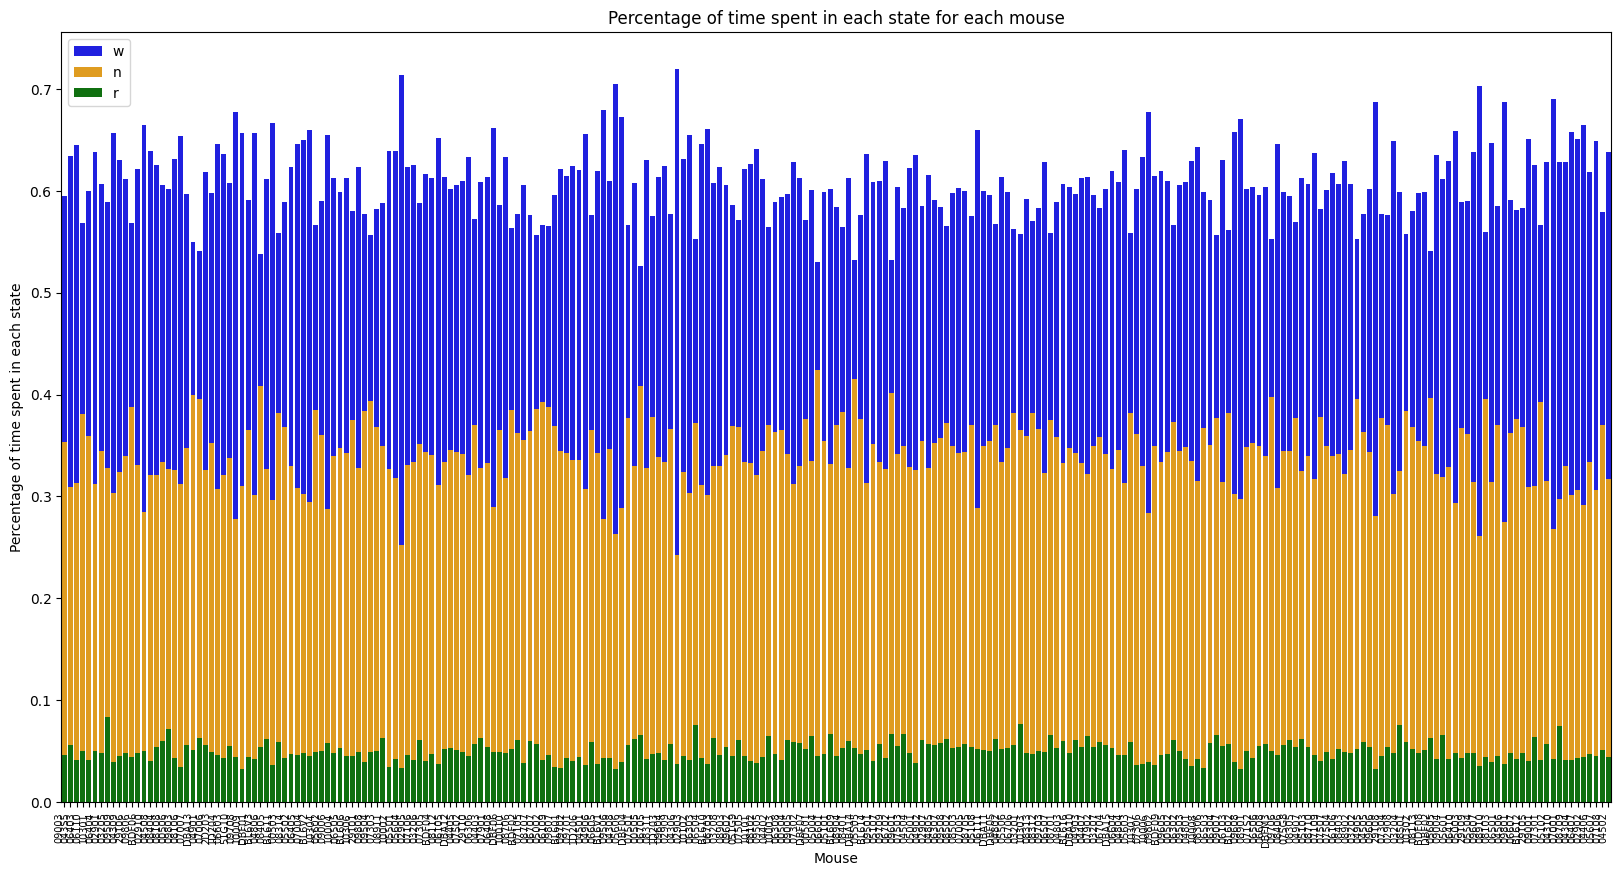

In [8]:
# plot percentage of each state for each mouse
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='mouse', y='w_ratio', data=states, color='blue', label='w', ax=ax)
sns.barplot(x='mouse', y='n_ratio', data=states, color='orange', label='n', ax=ax)
sns.barplot(x='mouse', y='r_ratio', data=states, color='green', label='r', ax=ax)
ax.set_title('Percentage of time spent in each state for each mouse')
ax.tick_params(axis='x', which='major', labelsize=7)
# make axis x labels vertical and make them fit
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_xlabel('Mouse')
ax.set_ylabel('Percentage of time spent in each state')
ax.legend()

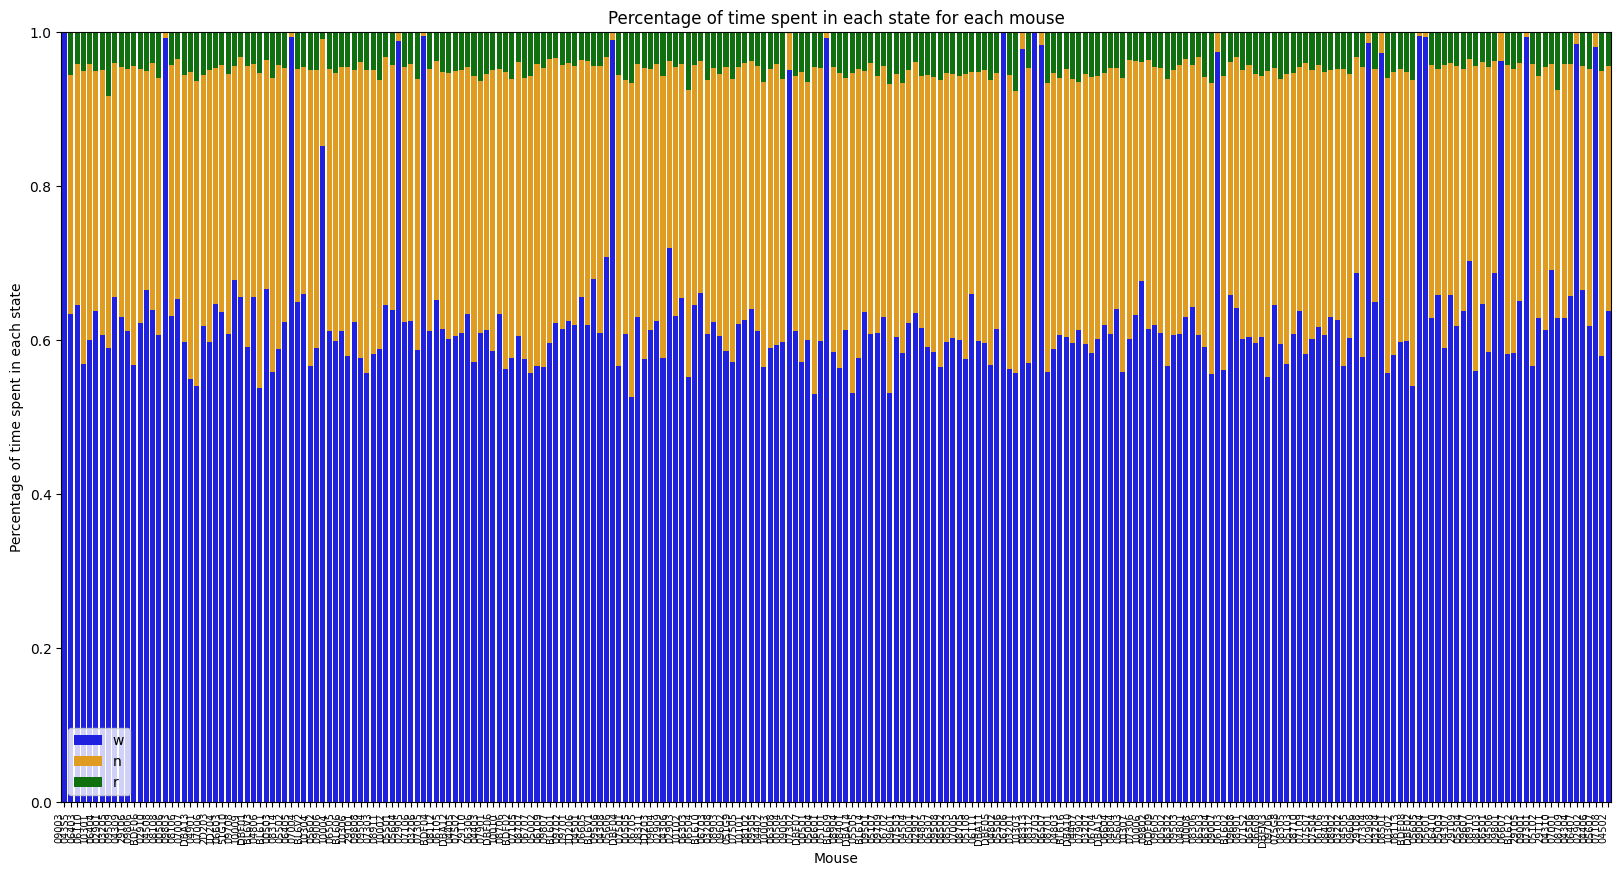

In [11]:
# plot the same thing but with a stacked barplot
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='mouse', y='w_ratio', data=states, color='blue', label='w', ax=ax)
sns.barplot(x='mouse', y='n_ratio', data=states, color='orange', label='n', ax=ax, bottom=states['w_ratio'])
sns.barplot(x='mouse', y='r_ratio', data=states, color='green', label='r', ax=ax, bottom=states['w_ratio']+states['n_ratio'])
ax.set_title('Percentage of time spent in each state for each mouse')
ax.tick_params(axis='x', which='major', labelsize=7)
# make axis x labels vertical and make them fit
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_xlabel('Mouse')
ax.set_ylabel('Percentage of time spent in each state')
ax.legend()

In [14]:
# compute the average of w_ratio in  df states for all mice together
w_ratio_mean = states['w_ratio'].mean()
n_ratio_mean = states['n_ratio'].mean()
r_ratio_mean = states['r_ratio'].mean()
print('w_ratio_mean = ', w_ratio_mean)
print('n_ratio_mean = ', n_ratio_mean)
print('r_ratio_mean = ', r_ratio_mean)

w_ratio_mean =  0.6412647175888835
n_ratio_mean =  0.313931865139748
r_ratio_mean =  0.0448034172713684


wake : 0.65
NREM : 0.30
REM : 0.05

### Mice sleep ratio during the other days

Display the ratio of sleep during the other days for the mice that have a ratio of sleep during the third day that is not in the normal range.

In [5]:
df_day0 = df[df['day']==0]
df_day1 = df[df['day']==1]
df_day3 = df[df['day']==3]

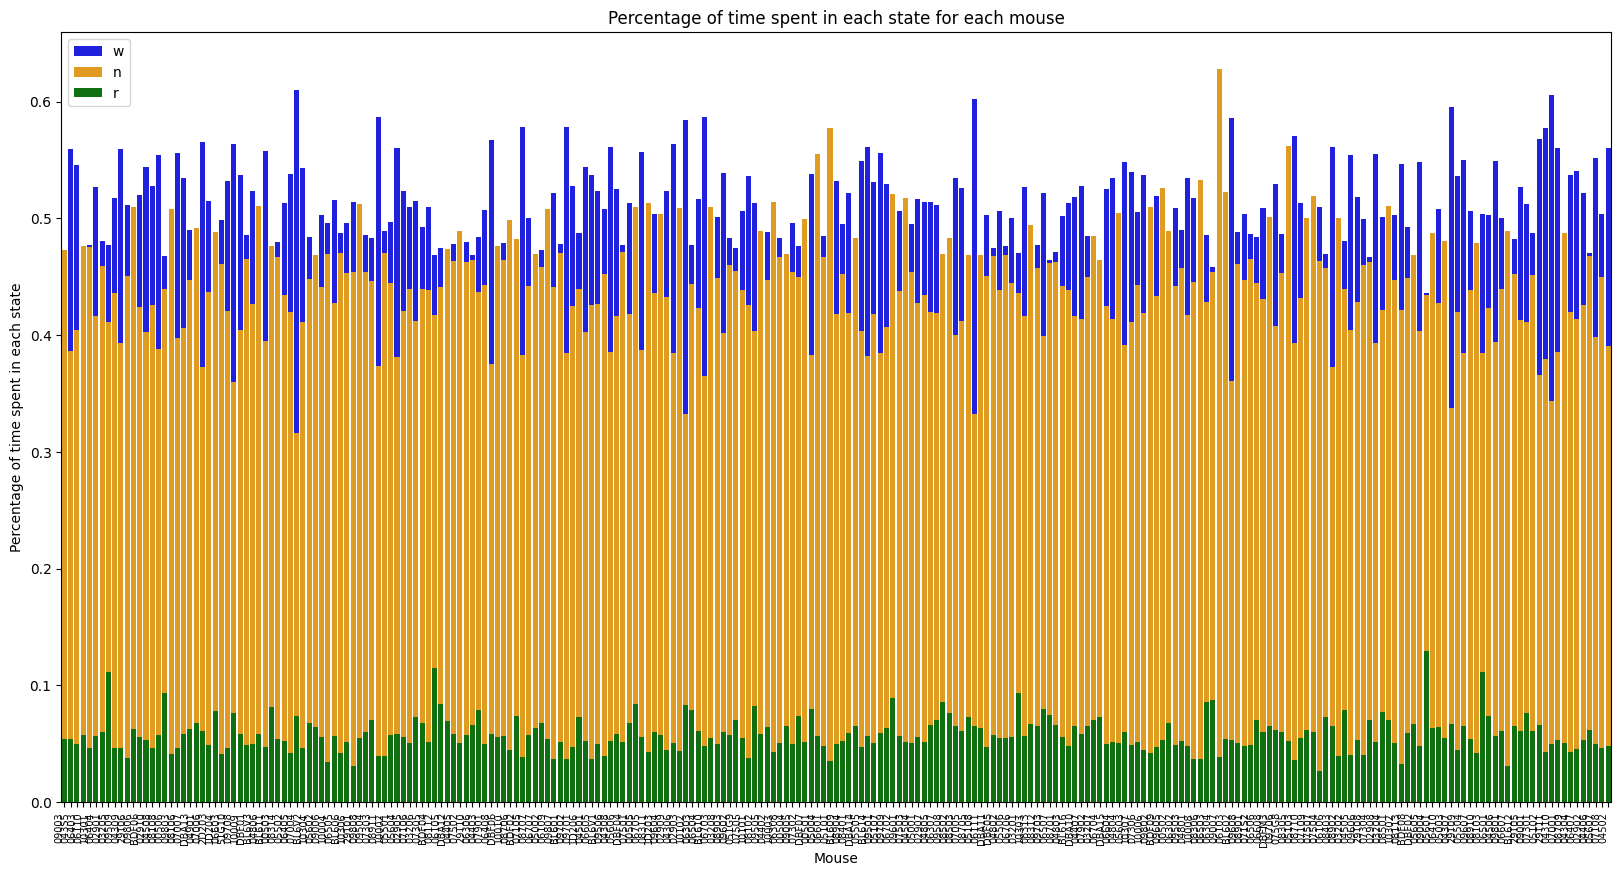

In [8]:
# Day 0 for each mouse

states_day0 = pd.DataFrame()
for mouse in df_day0['mouse'].unique():
    w_ratio = get_sleep_ratio(df_day0, mouse, 'w')
    n_ratio = get_sleep_ratio(df_day0, mouse, 'n')
    r_ratio = get_sleep_ratio(df_day0, mouse, 'r')
    states_day0 = states_day0.append(pd.DataFrame({'mouse':mouse, 'w_ratio':w_ratio, 'n_ratio':n_ratio, 'r_ratio':r_ratio}, index=[0]), ignore_index=True) # type: ignore

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='mouse', y='w_ratio', data=states_day0, color='blue', label='w', ax=ax)
sns.barplot(x='mouse', y='n_ratio', data=states_day0, color='orange', label='n', ax=ax)
sns.barplot(x='mouse', y='r_ratio', data=states_day0, color='green', label='r', ax=ax)
ax.set_title('Percentage of time spent in each state for each mouse')
ax.tick_params(axis='x', which='major', labelsize=7)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_xlabel('Mouse')
ax.set_ylabel('Percentage of time spent in each state')
ax.legend()

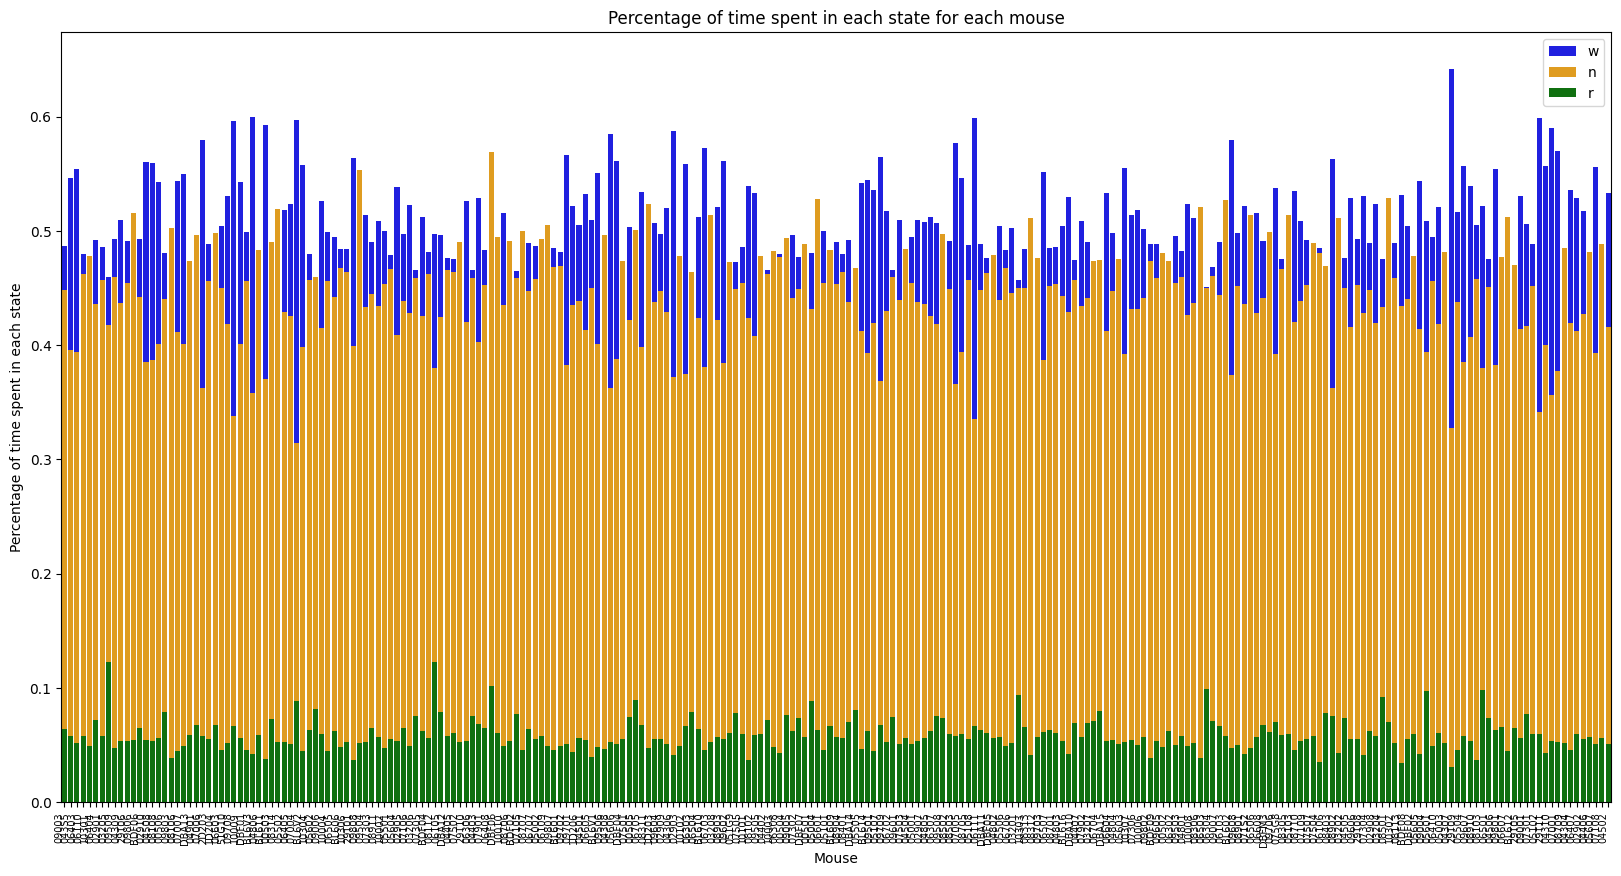

In [6]:
# Day 1

states_day1 = pd.DataFrame()
for mouse in df_day1['mouse'].unique():
    w_ratio = get_sleep_ratio(df_day1, mouse, 'w')
    n_ratio = get_sleep_ratio(df_day1, mouse, 'n')
    r_ratio = get_sleep_ratio(df_day1, mouse, 'r')
    states_day1 = states_day1.append(pd.DataFrame({'mouse':mouse, 'w_ratio':w_ratio, 'n_ratio':n_ratio, 'r_ratio':r_ratio}, index=[0]), ignore_index=True) # type: ignore

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='mouse', y='w_ratio', data=states_day1, color='blue', label='w', ax=ax)
sns.barplot(x='mouse', y='n_ratio', data=states_day1, color='orange', label='n', ax=ax)
sns.barplot(x='mouse', y='r_ratio', data=states_day1, color='green', label='r', ax=ax)
ax.set_title('Percentage of time spent in each state for each mouse')
ax.tick_params(axis='x', which='major', labelsize=7)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_xlabel('Mouse')
ax.set_ylabel('Percentage of time spent in each state')
ax.legend()

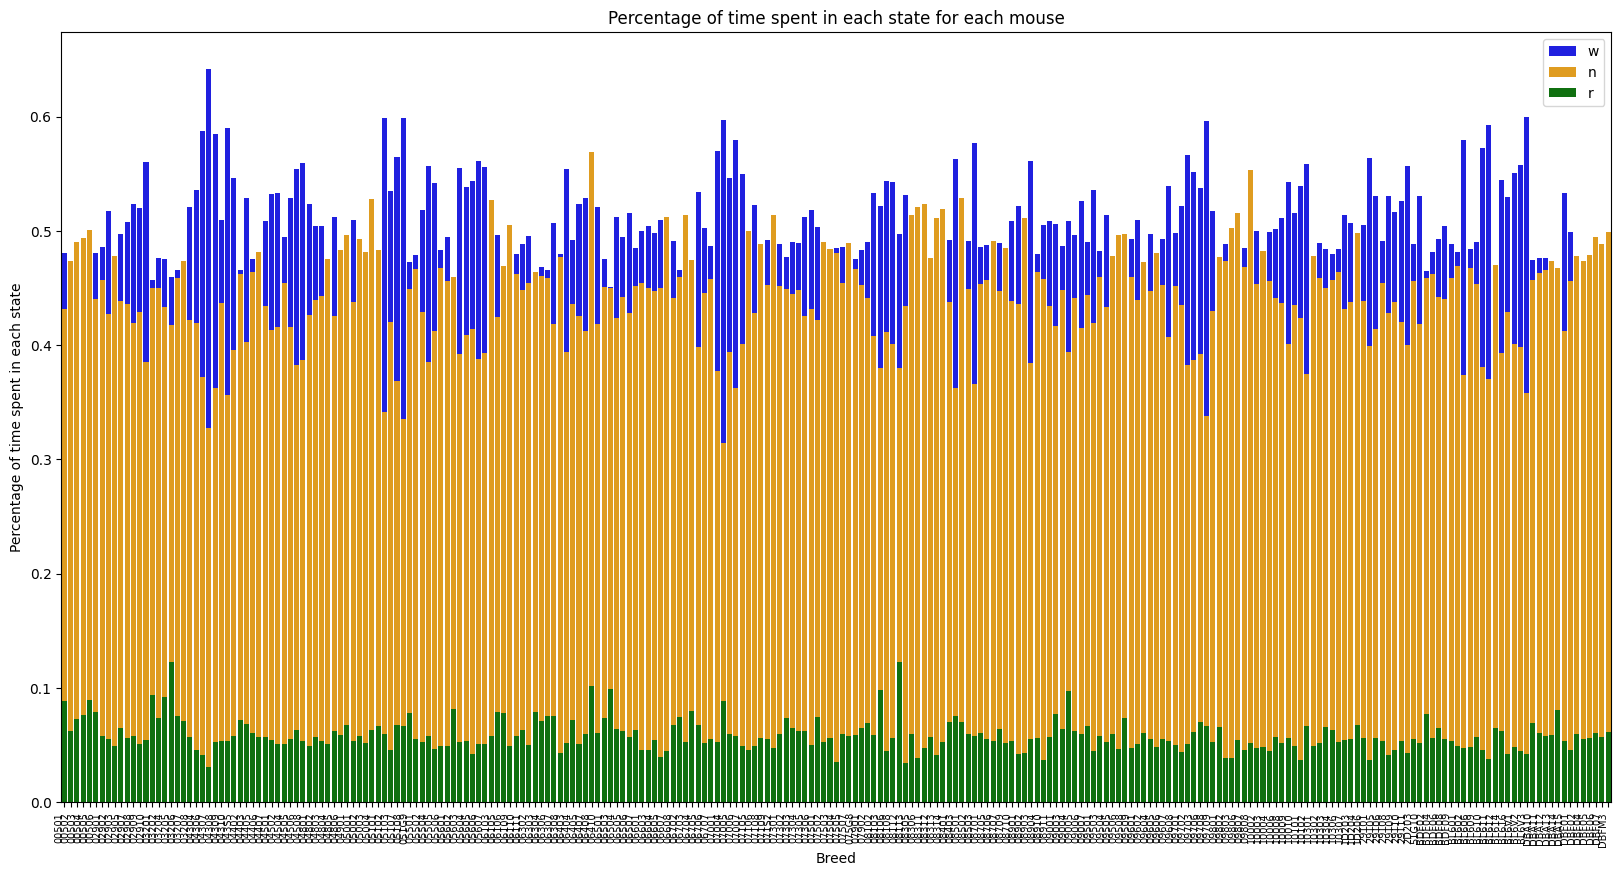

In [10]:
# plot by breed
states_day1_sorted = states_day1.sort_values(by=['mouse'])
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='mouse', y='w_ratio', data=states_day1_sorted, color='blue', label='w', ax=ax)
sns.barplot(x='mouse', y='n_ratio', data=states_day1_sorted, color='orange', label='n', ax=ax)
sns.barplot(x='mouse', y='r_ratio', data=states_day1_sorted, color='green', label='r', ax=ax)
ax.set_title('Percentage of time spent in each state for each mouse')
ax.tick_params(axis='x', which='major', labelsize=7)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_xlabel('Breed')
ax.set_ylabel('Percentage of time spent in each state')
ax.legend()

In [ ]:
# Day 3

states_day3 = pd.DataFrame()
for mouse in df_day3['mouse'].unique():
    w_ratio = get_sleep_ratio(df_day3, mouse, 'w')
    n_ratio = get_sleep_ratio(df_day3, mouse, 'n')
    r_ratio = get_sleep_ratio(df_day3, mouse, 'r')
    states_day3 = states_day3.append(pd.DataFrame({'mouse':mouse, 'w_ratio':w_ratio, 'n_ratio':n_ratio, 'r_ratio':r_ratio}, index=[0]), ignore_index=True) # type: ignore

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='mouse', y='w_ratio', data=states_day3, color='blue', label='w', ax=ax)
sns.barplot(x='mouse', y='n_ratio', data=states_day3, color='orange', label='n', ax=ax)
sns.barplot(x='mouse', y='r_ratio', data=states_day3, color='green', label='r', ax=ax)
ax.set_title('Percentage of time spent in each state for each mouse')
ax.tick_params(axis='x', which='major', labelsize=7)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_xlabel('Mouse')
ax.set_ylabel('Percentage of time spent in each state')
ax.legend()

### Study of the different features

Boxplot of the different features for each mouse.

In [3]:
with open('/home/magali.egger/shared-projects/mice_UNIL/Data/df_simplify_day3.pkl', 'rb') as f:
    df_simple = pickle.load(f)

In [4]:
df_simple.columns

Index(['Unnamed: 0', 'rawState', 'state', 'EEGv', 'EMGv', 'epoch', 'day',
       'spectral_flatness', 'spectral_centroid', 'spectral_entropy',
       'spectral_rolloff_0.1', 'spectral_rolloff_0.2', 'spectral_rolloff_0.3',
       'spectral_rolloff_0.4', 'spectral_rolloff_0.5', 'spectral_rolloff_0.6',
       'spectral_rolloff_0.7', 'spectral_rolloff_0.8', 'spectral_rolloff_0.9',
       'EEGv_mean2', 'EMGv_mean2', 'EEGv_median2', 'EMGv_median2', 'EEGv_var2',
       'EMGv_var2', 'EEGv_min2', 'EMGv_min2', 'EEGv_max2', 'EMGv_max2',
       'EEGv_mean5', 'EMGv_mean5', 'EEGv_median5', 'EMGv_median5', 'EEGv_var5',
       'EMGv_var5', 'EEGv_min5', 'EMGv_min5', 'EEGv_max5', 'EMGv_max5',
       'EEGv_mean10', 'EMGv_mean10', 'EEGv_median10', 'EMGv_median10',
       'EEGv_var10', 'EMGv_var10', 'EEGv_min10', 'EMGv_min10', 'EEGv_max10',
       'EMGv_max10', 'EEGv_mean20', 'EMGv_mean20', 'EEGv_median20',
       'EMGv_median20', 'EEGv_var20', 'EMGv_var20', 'EEGv_min20', 'EMGv_min20',
       'EEGv_max20',

In [7]:
def plot_boxplot(feature):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x='rawState', y=feature, data=df_simple, ax=ax)
    ax.set_title('Boxplot of ' + feature + ' for each state')
    ax.set_xlabel('State')
    ax.set_ylabel(feature)
    
def plot_boxplot_without_outlier(feature):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x='rawState', y=feature, data=df_simple, ax=ax, showfliers=False)
    ax.set_title('Boxplot of ' + feature + ' for each state')
    ax.set_xlabel('State')
    ax.set_ylabel(feature)


### Variance and spectral features

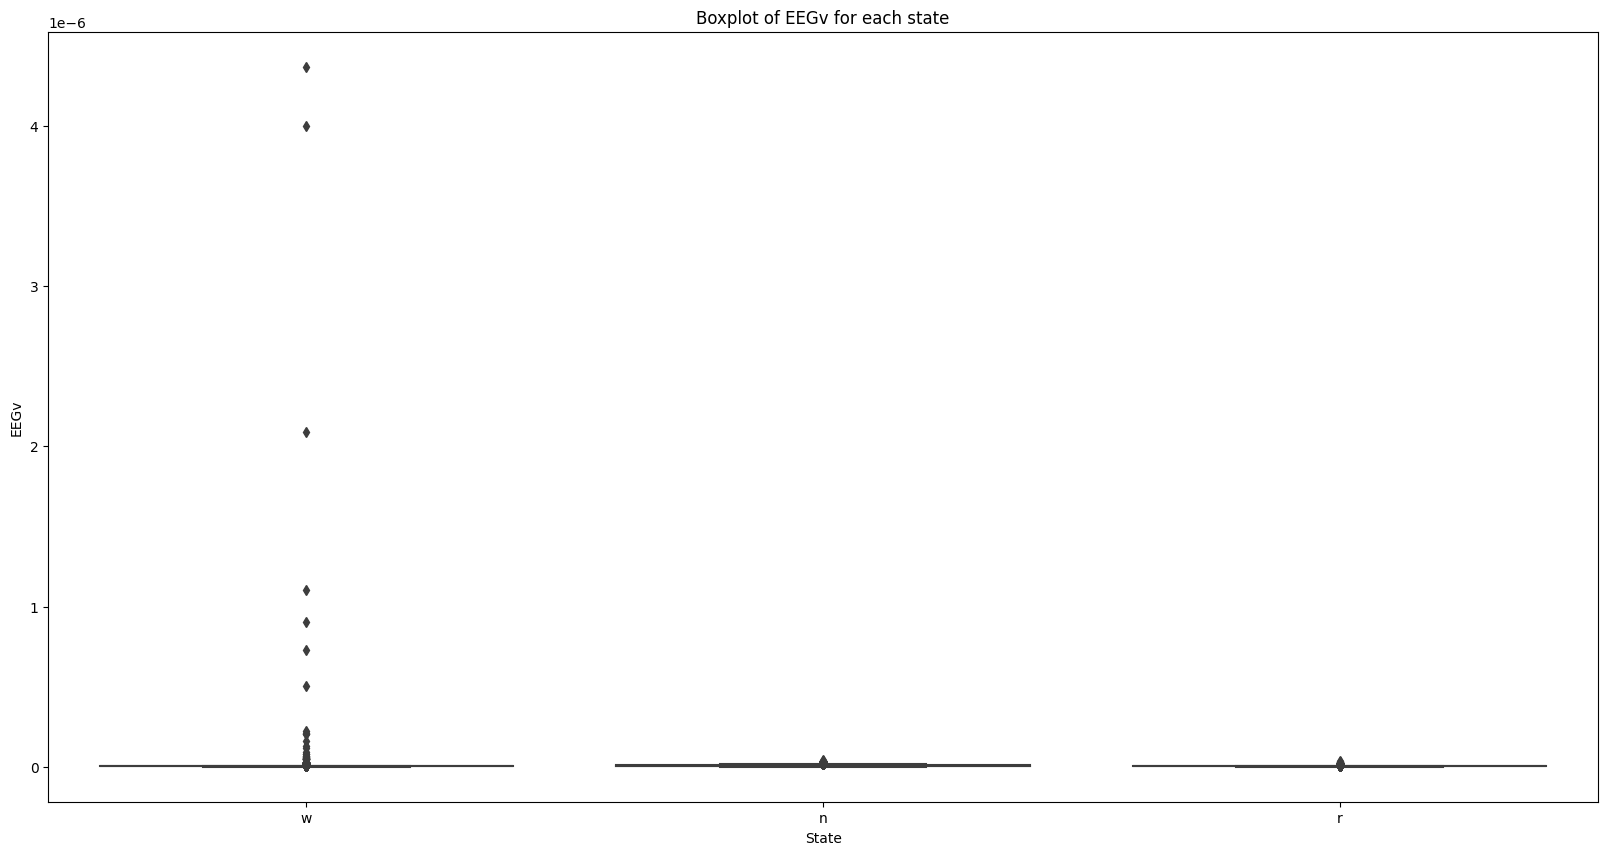

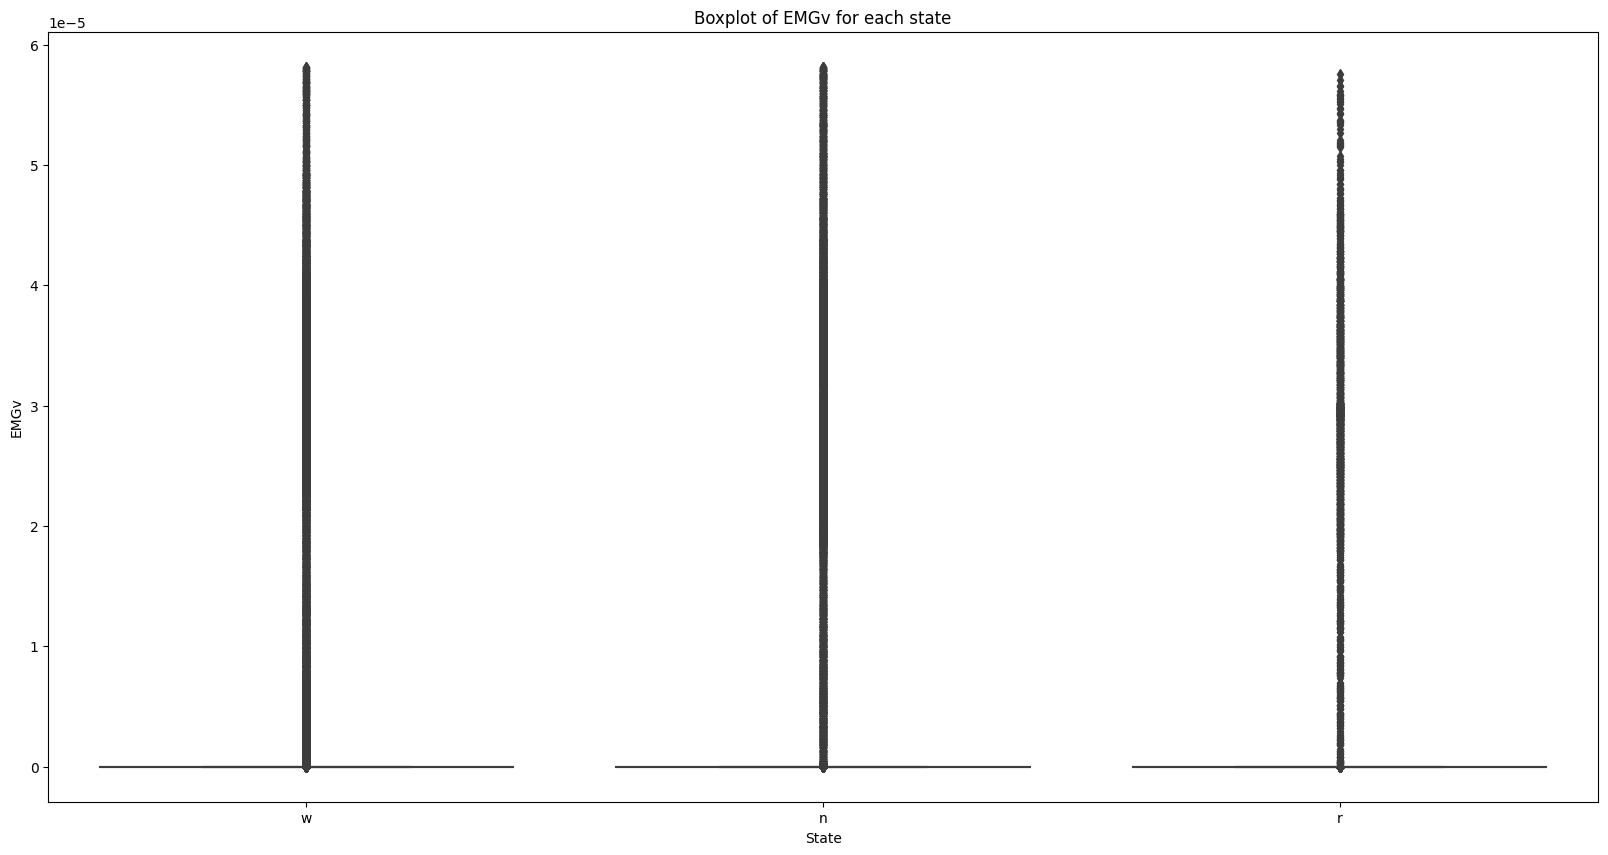

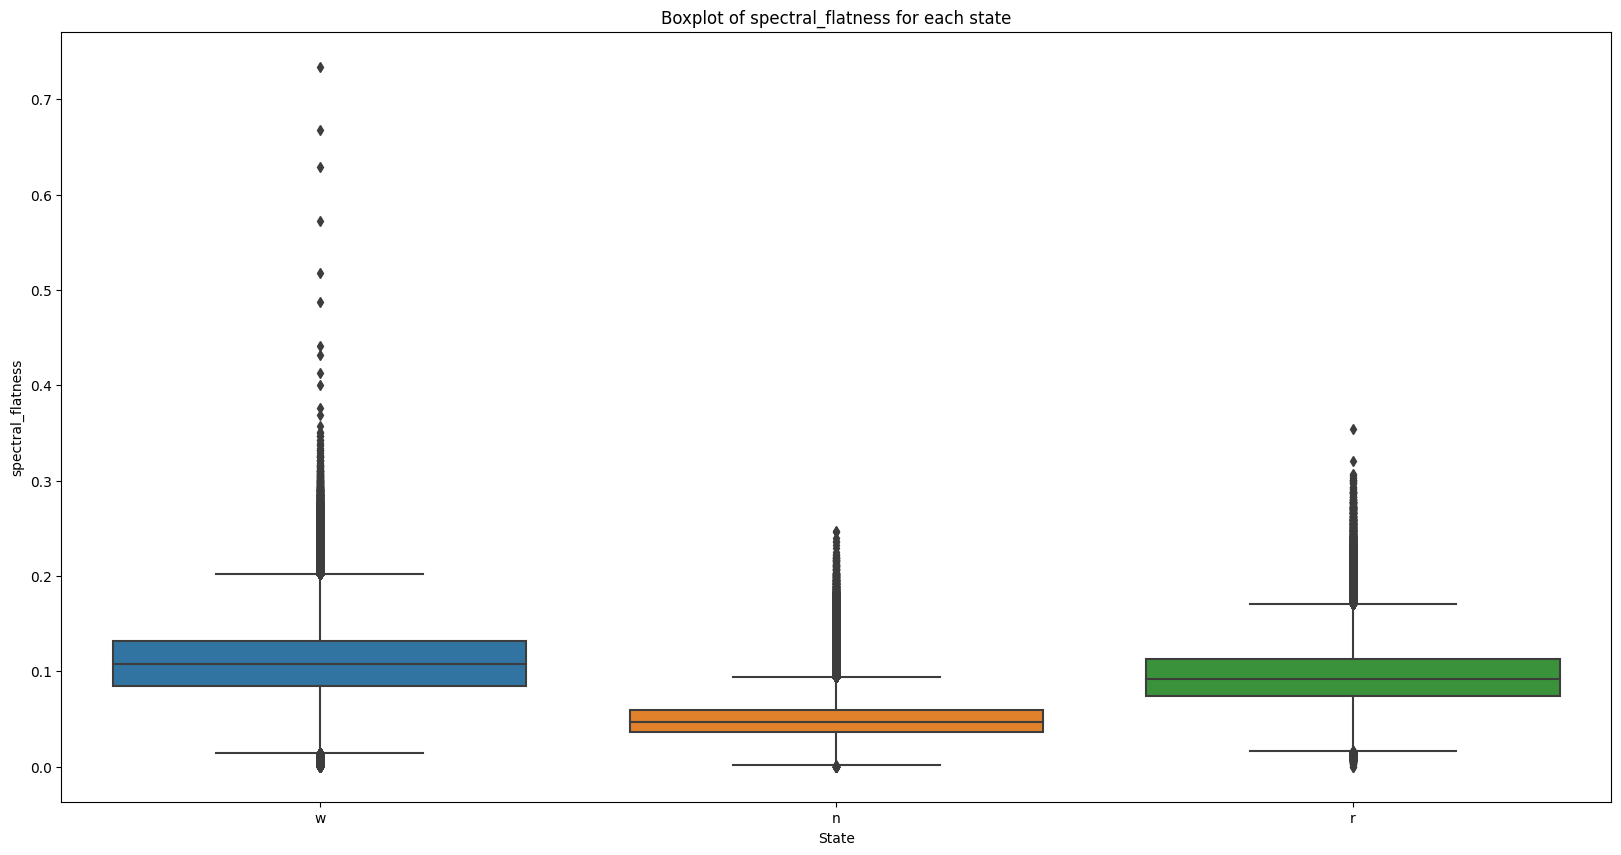

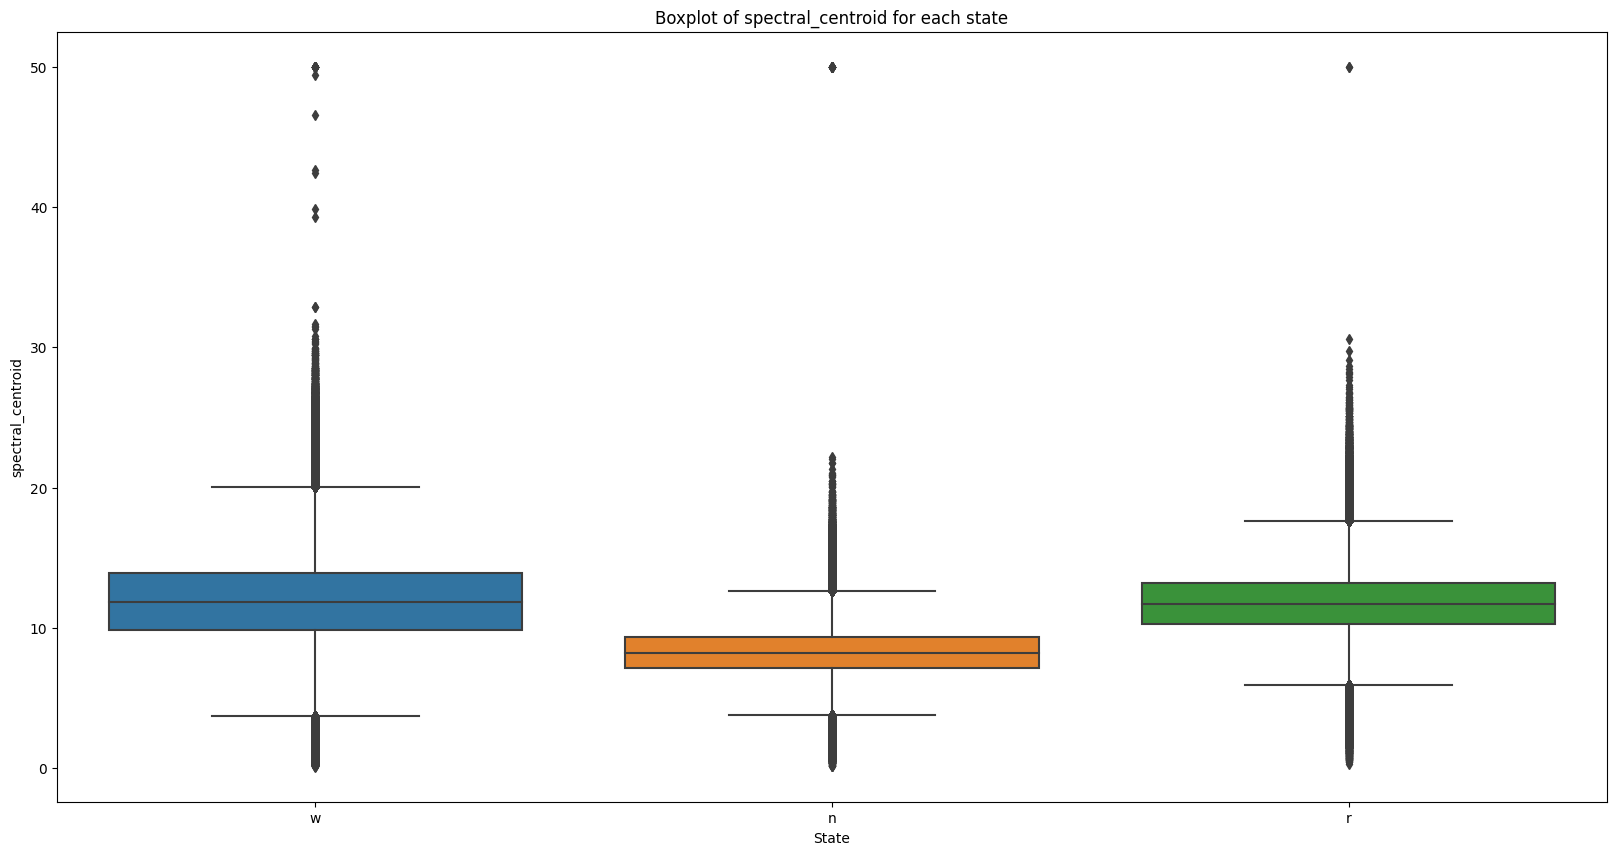

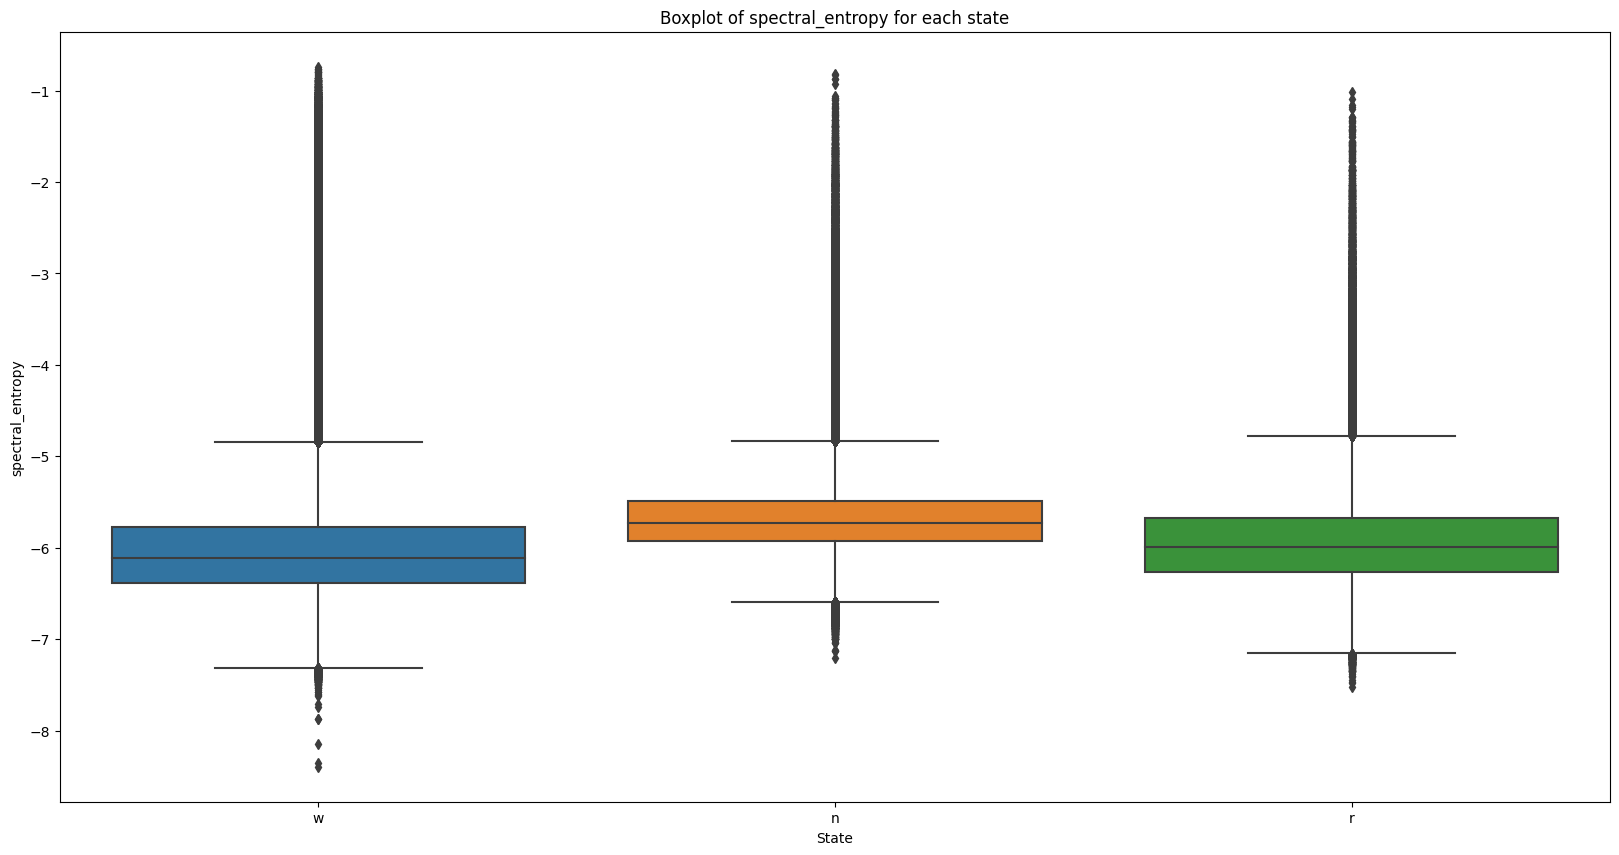

In [8]:
# do boxplot for the different features for each state for the EEGv, EMGv, spectral_flatness, spectral_centroid, spectral_entropy
plot_boxplot('EEGv')
plot_boxplot('EMGv')
plot_boxplot('spectral_flatness')
plot_boxplot('spectral_centroid')
plot_boxplot('spectral_entropy')


As the first two graph aren't descriptive enough we'll try to plot the data witout the outliers.

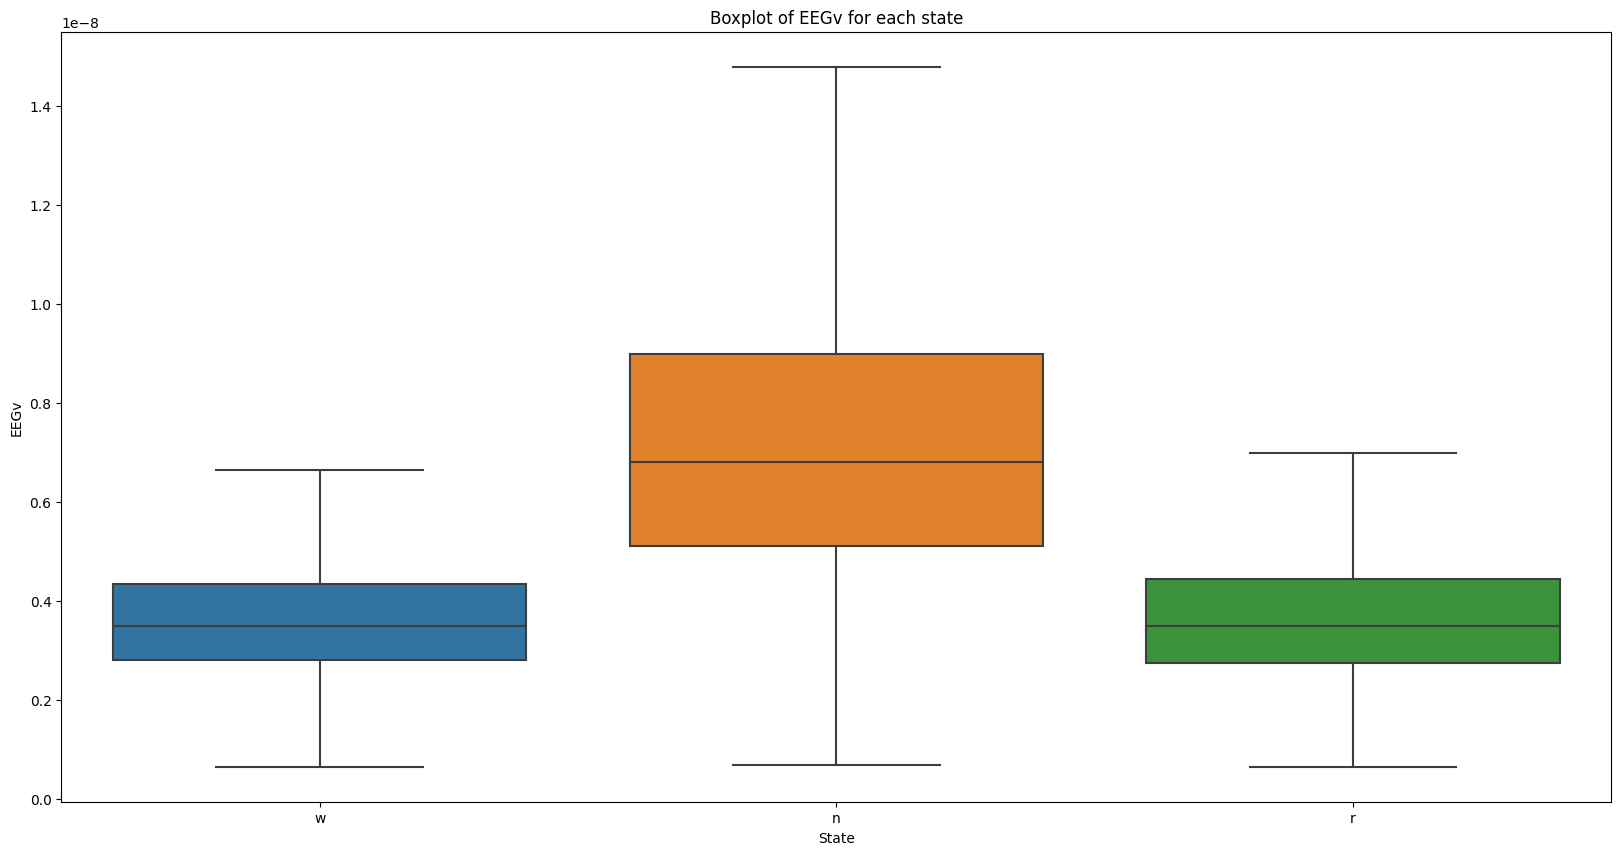

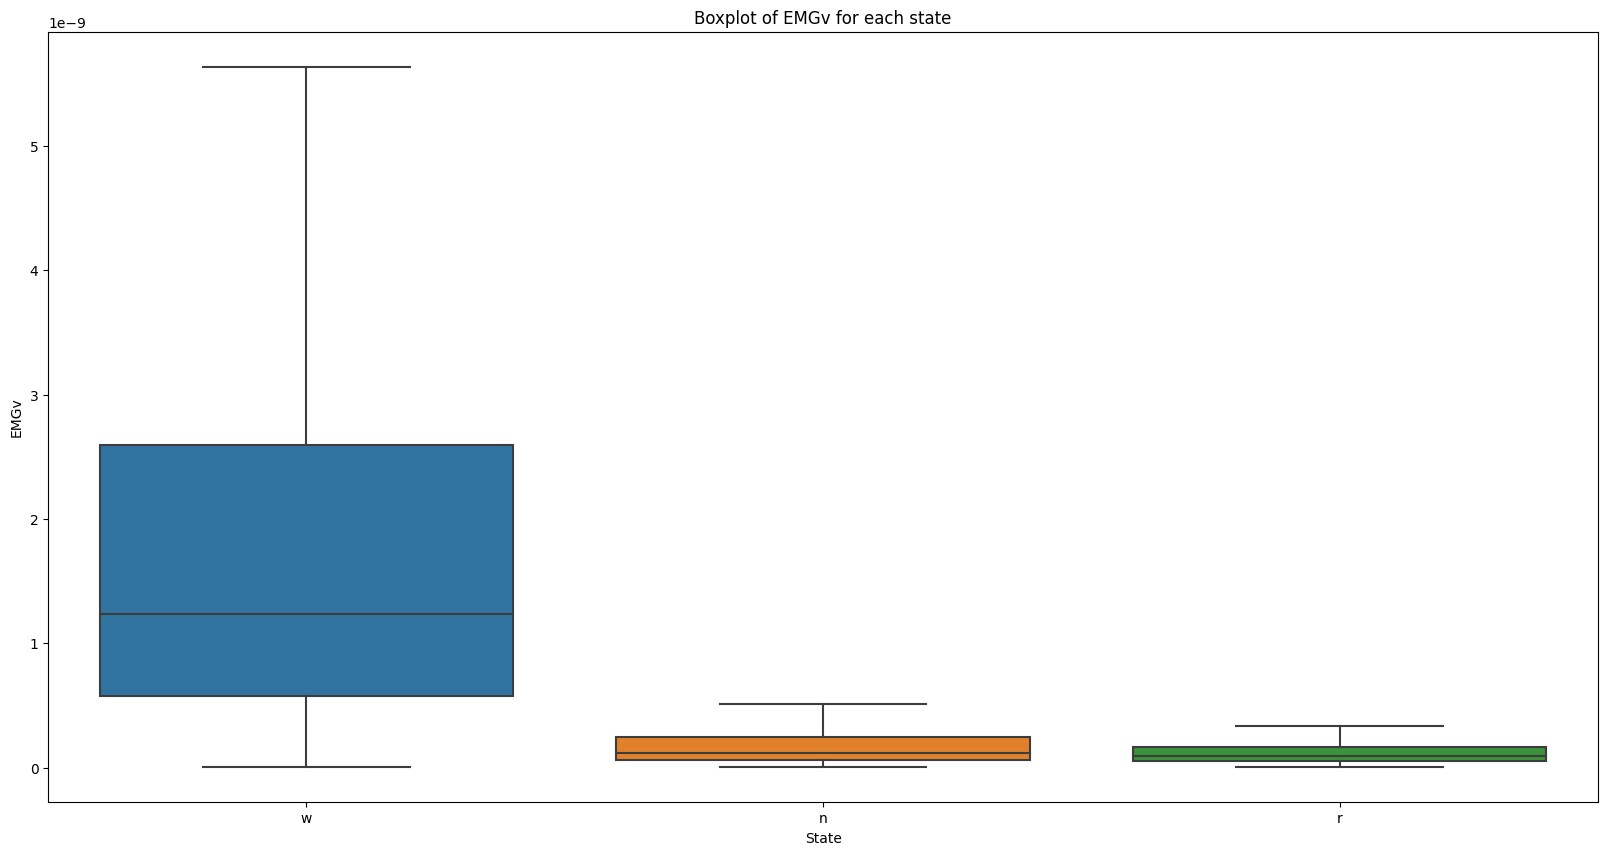

In [9]:
plot_boxplot_without_outlier('EEGv')
plot_boxplot_without_outlier('EMGv')

Here we can already see that the eeg seems to be informative to distinguish the nrem state. We can also see that the emg is really informative to distinguish the wake state but not so much for the rem and nrem state.

### Rolloff features

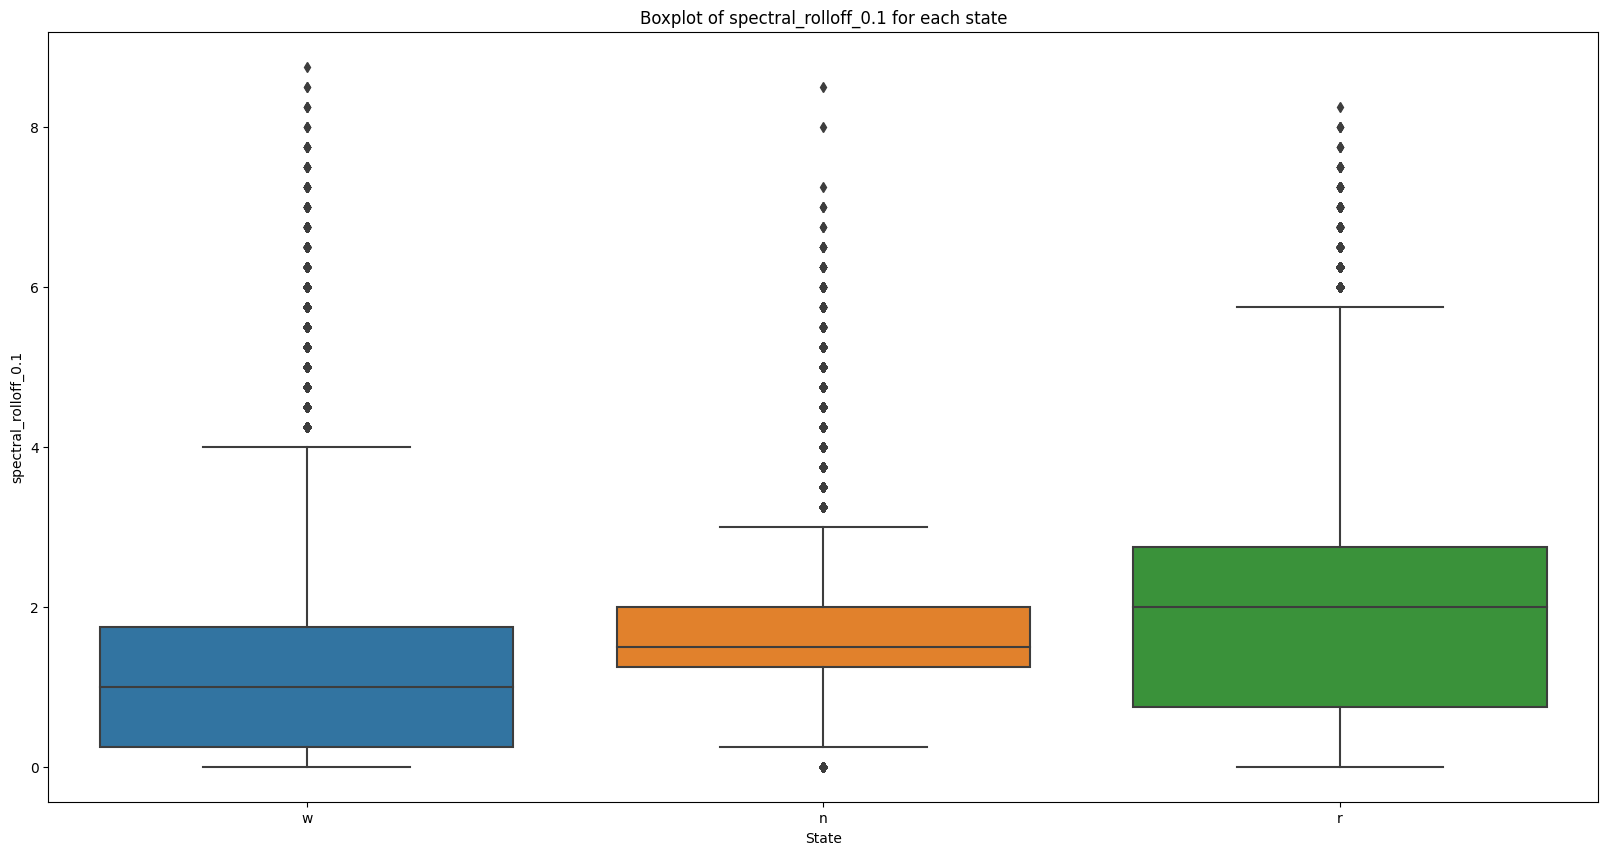

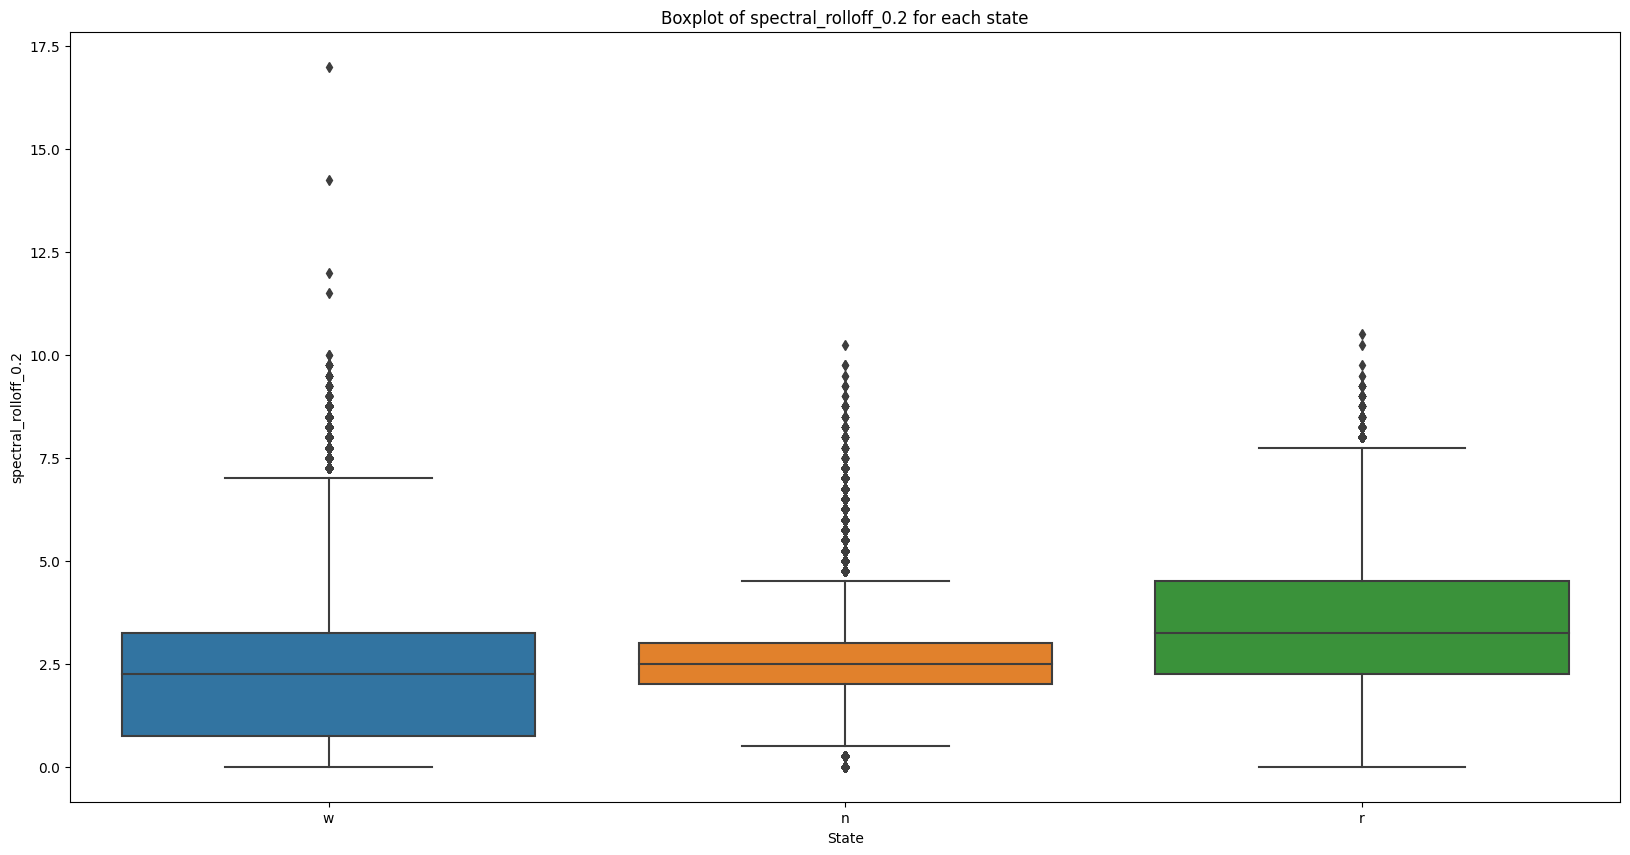

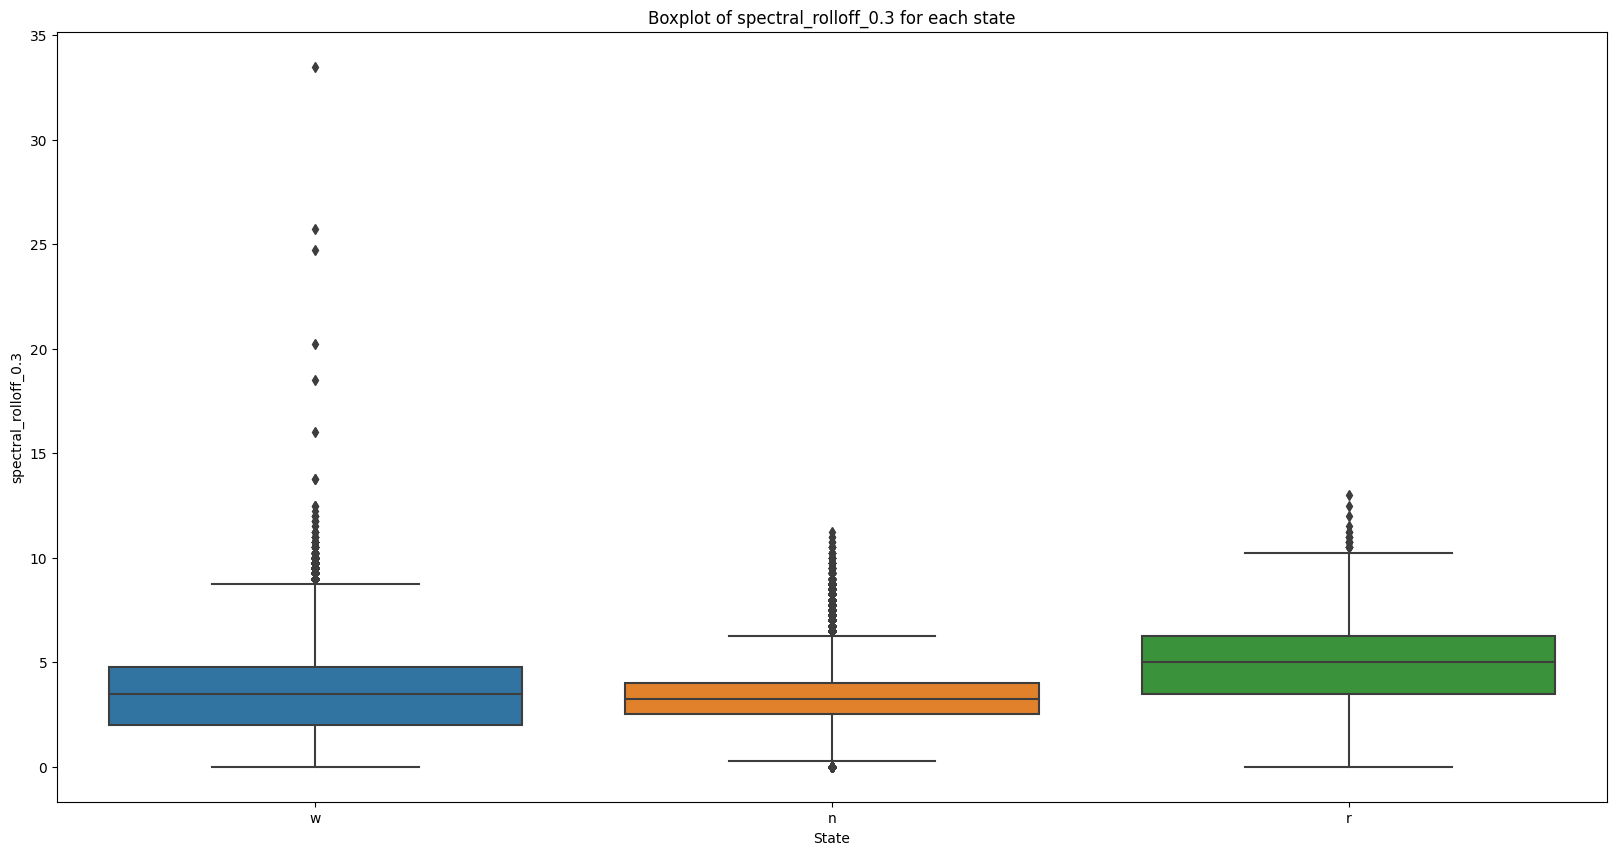

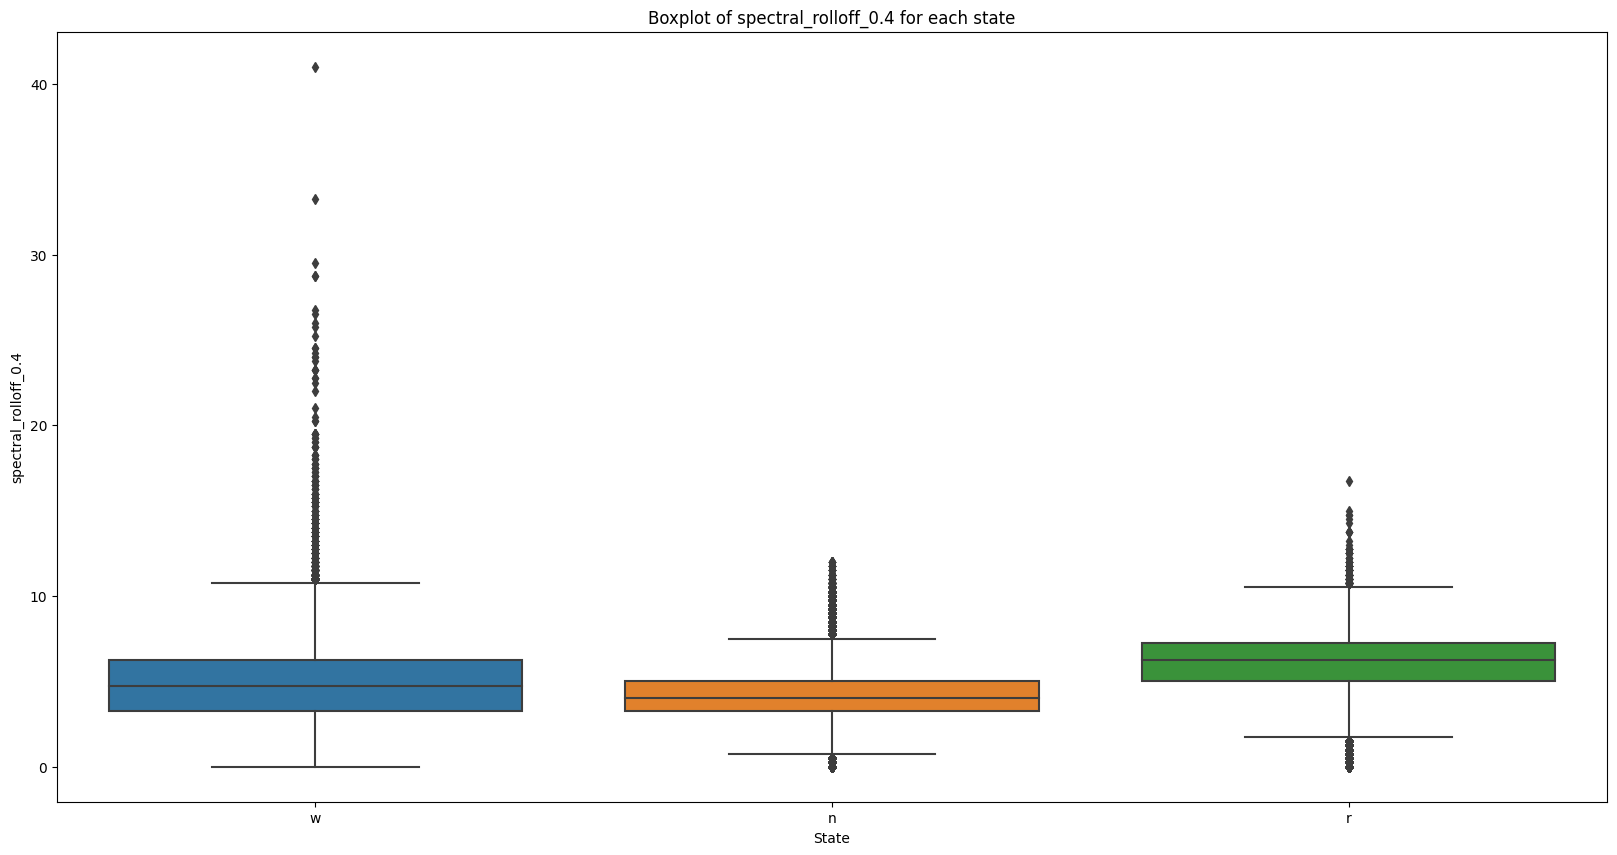

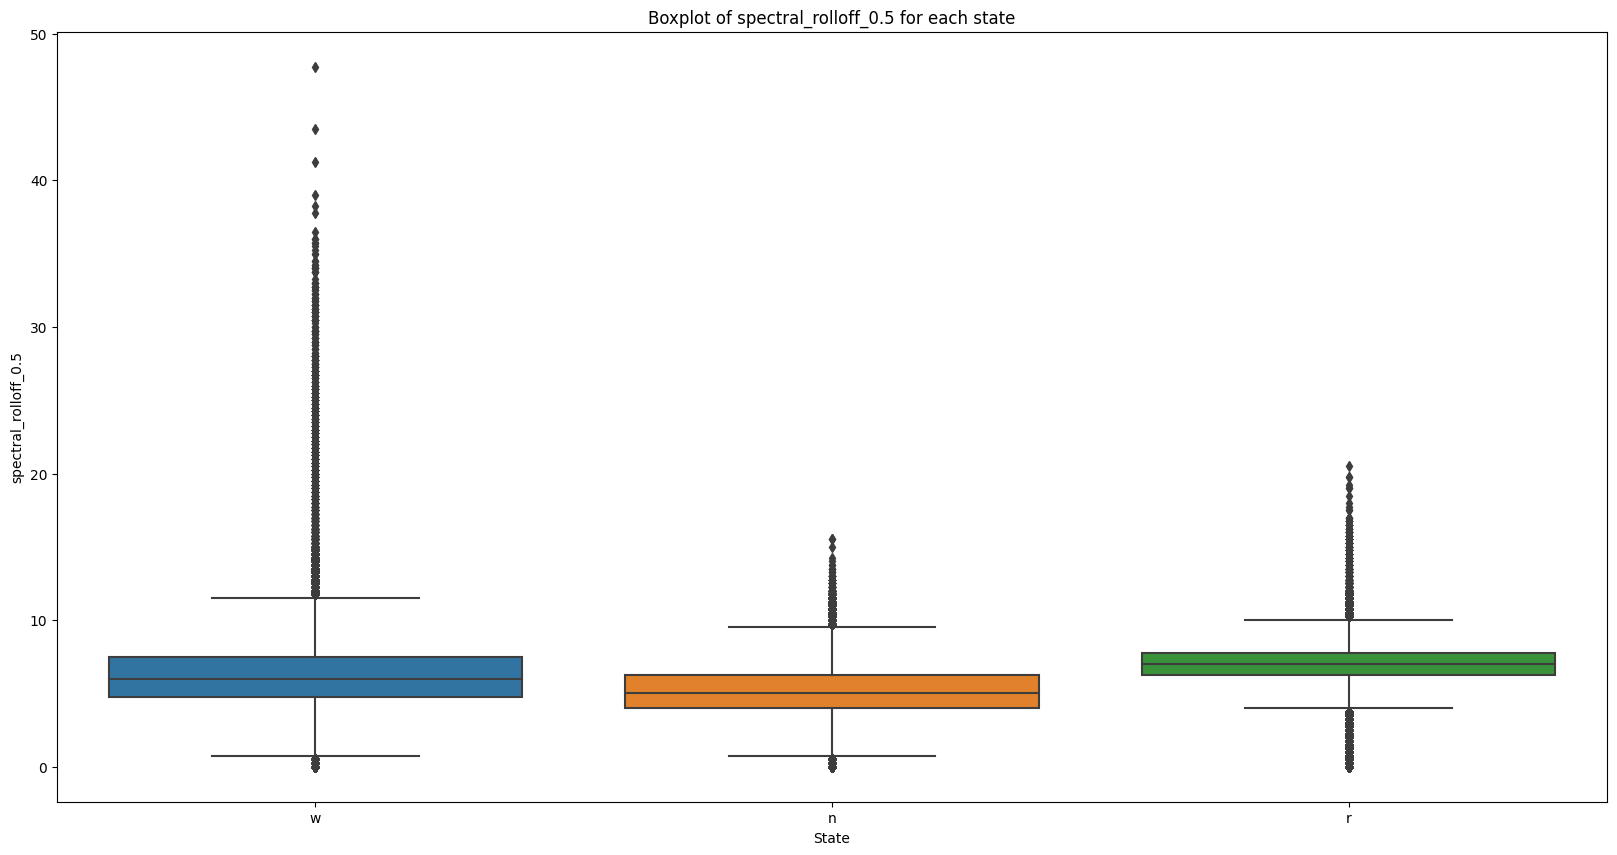

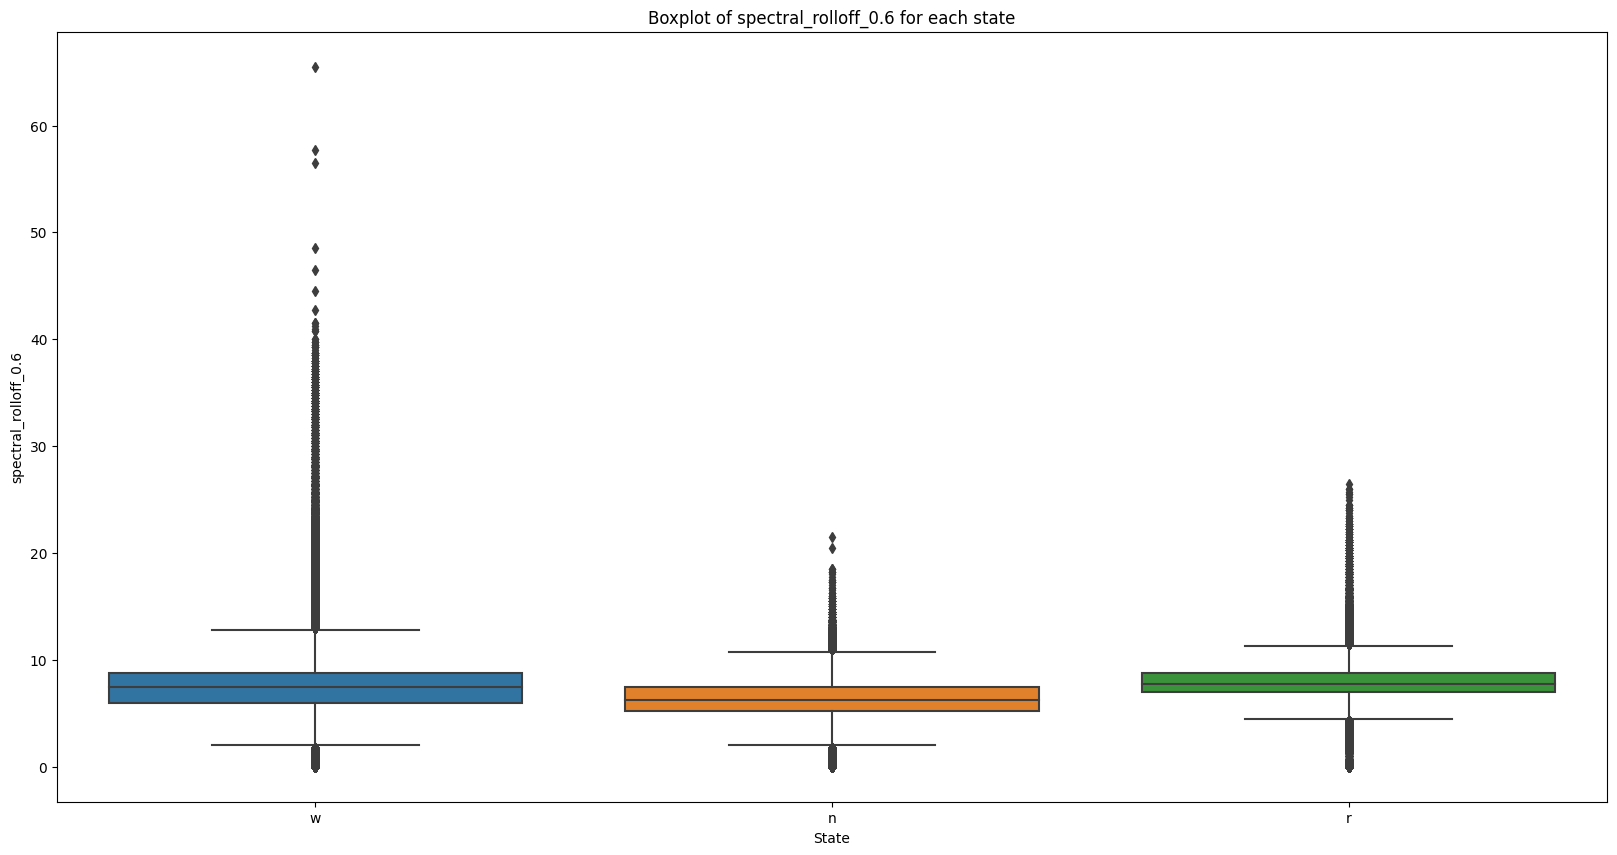

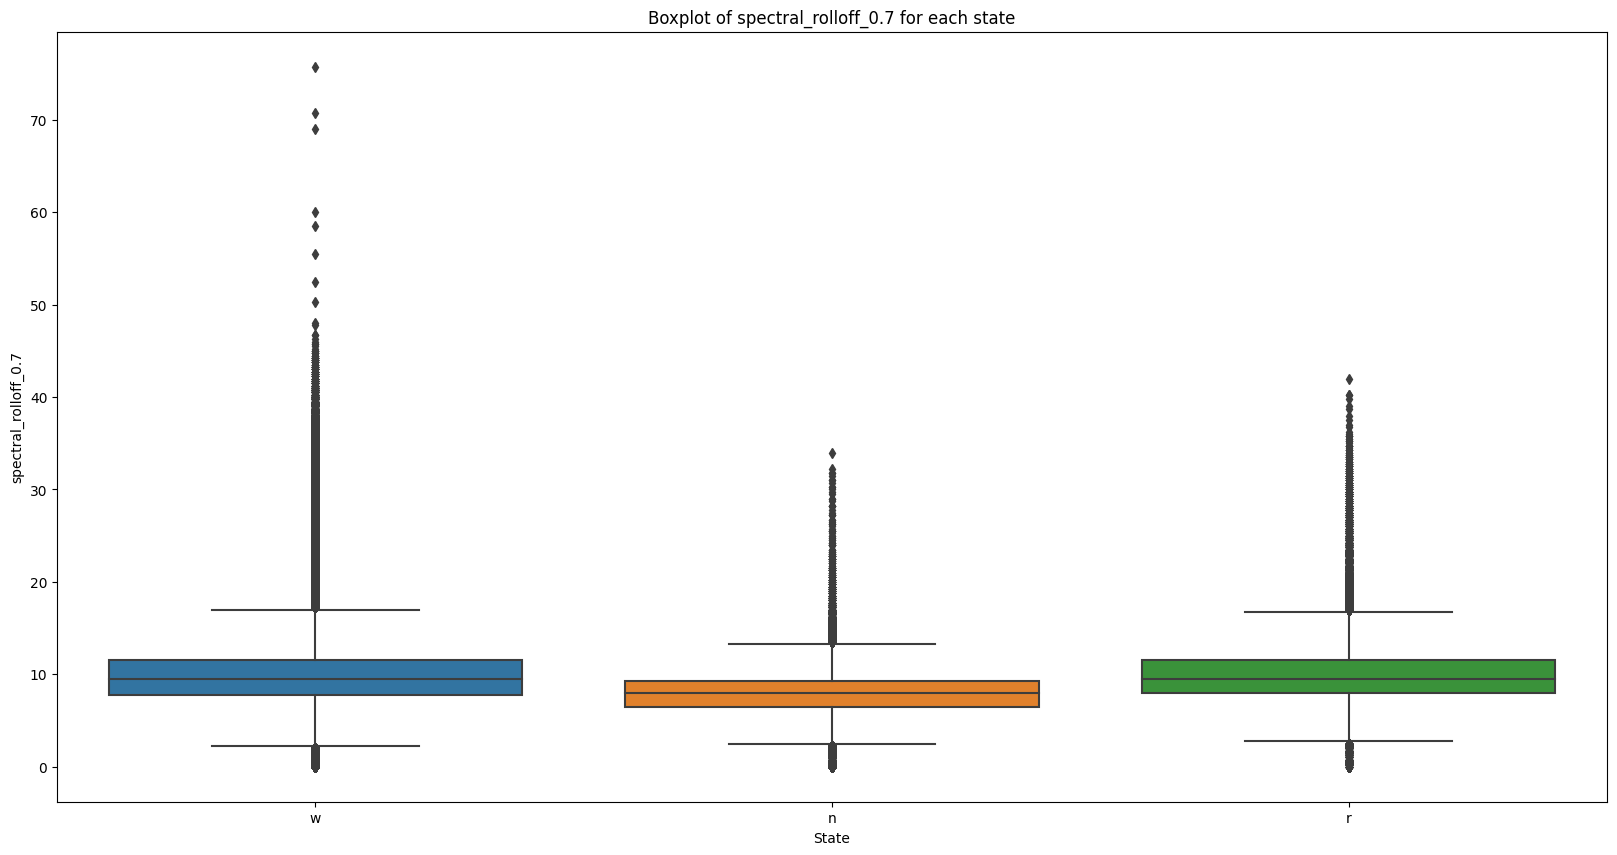

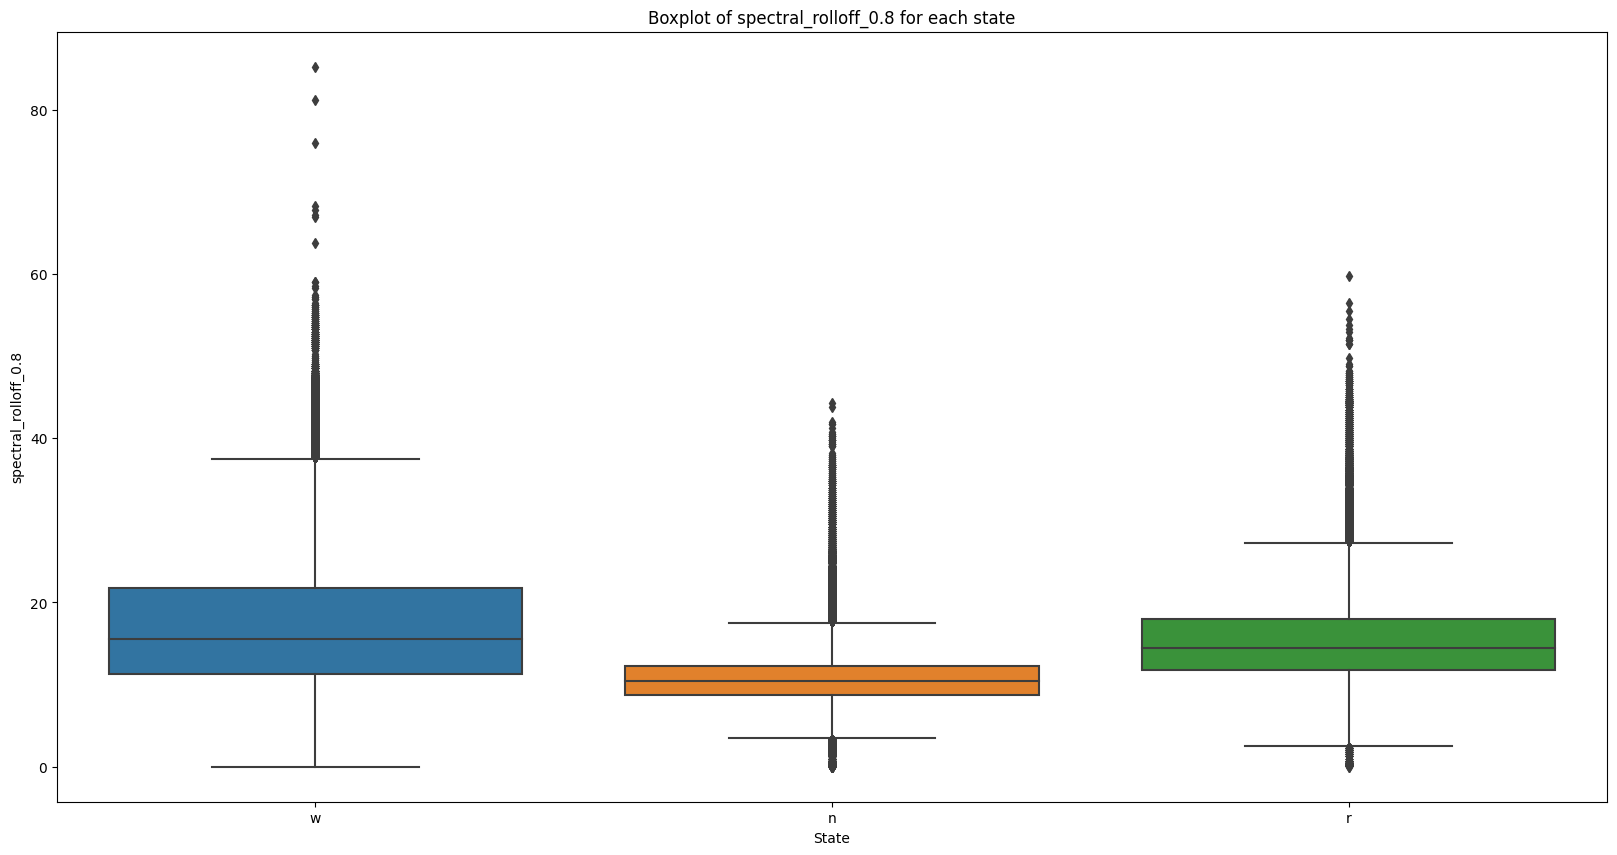

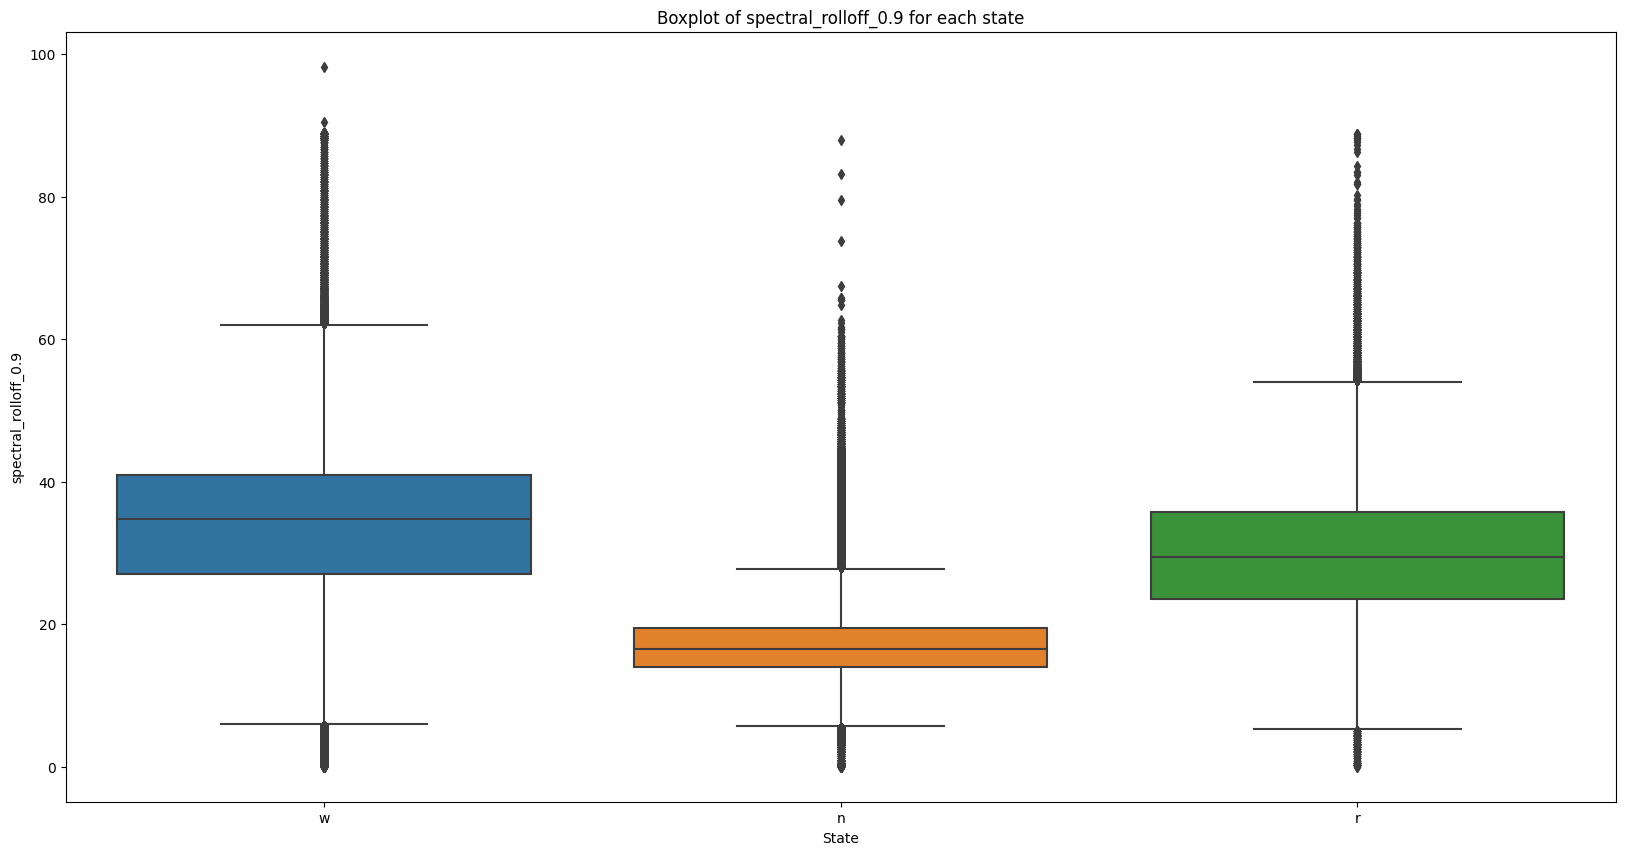

In [10]:
# same for all the rolloff features
plot_boxplot('spectral_rolloff_0.1')
plot_boxplot('spectral_rolloff_0.2')
plot_boxplot('spectral_rolloff_0.3')
plot_boxplot('spectral_rolloff_0.4')
plot_boxplot('spectral_rolloff_0.5')
plot_boxplot('spectral_rolloff_0.6')
plot_boxplot('spectral_rolloff_0.7')
plot_boxplot('spectral_rolloff_0.8')
plot_boxplot('spectral_rolloff_0.9')

The roll off seems to become more interesting when the percentage taking into consideration is higher. Therefor roll_off_0.9 seems to be the most interesting feature.

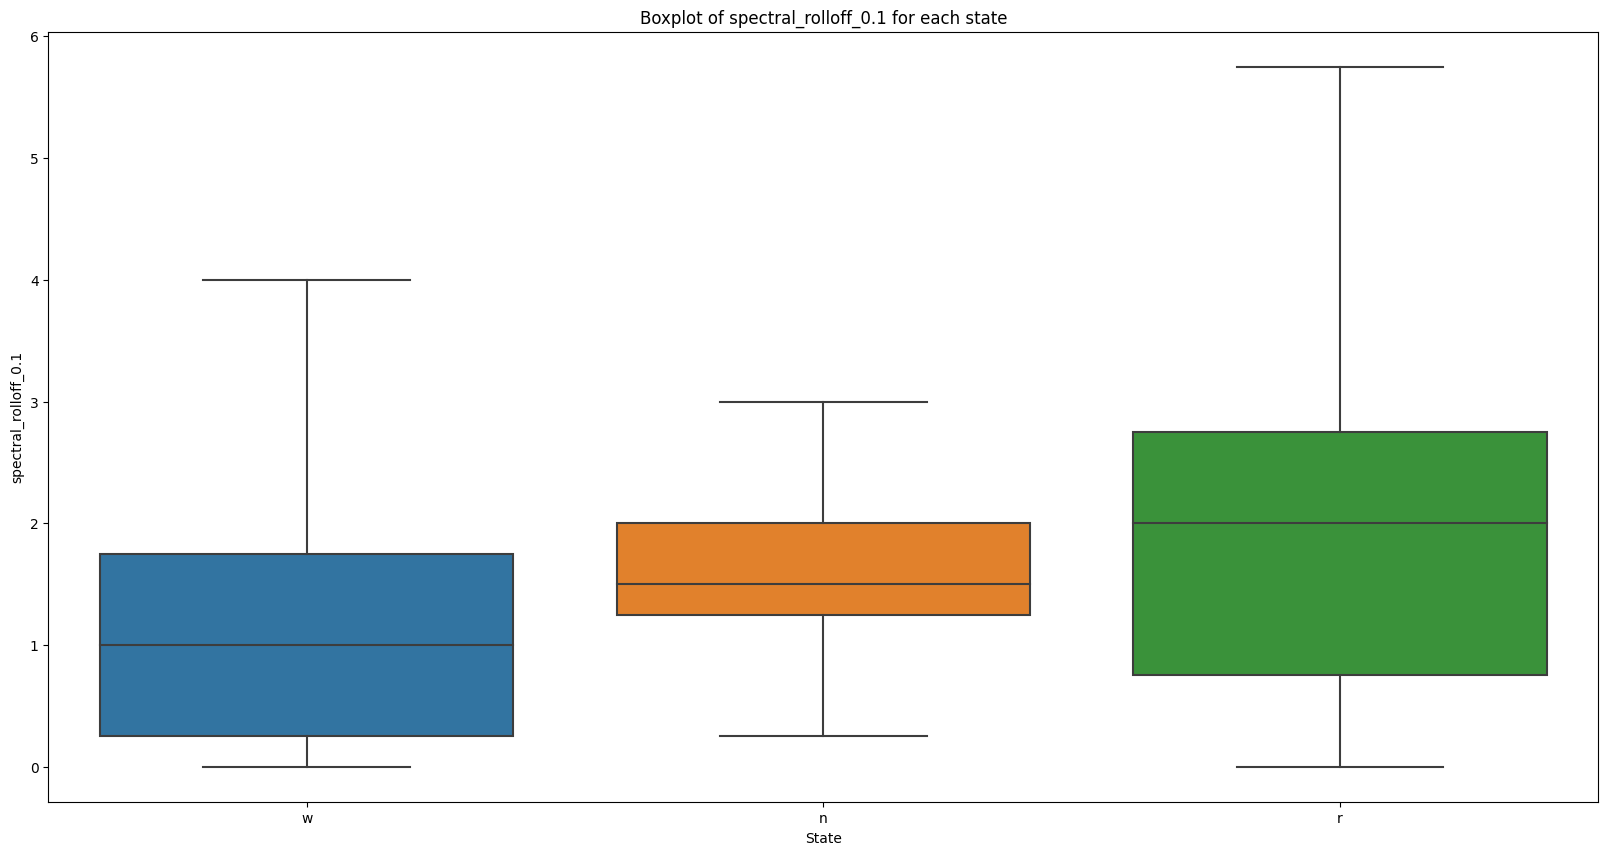

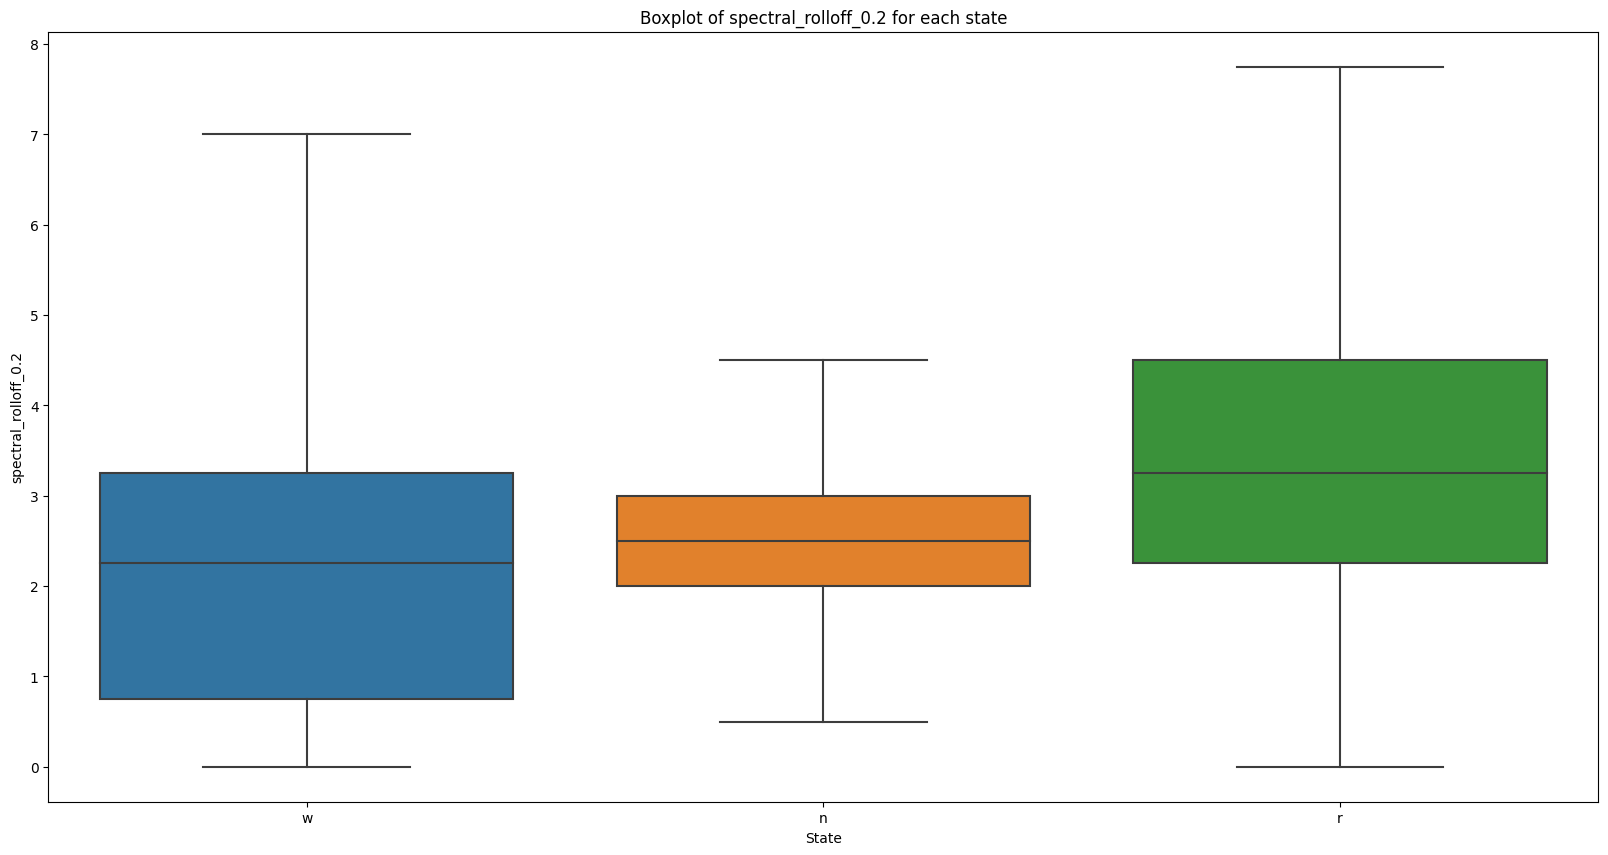

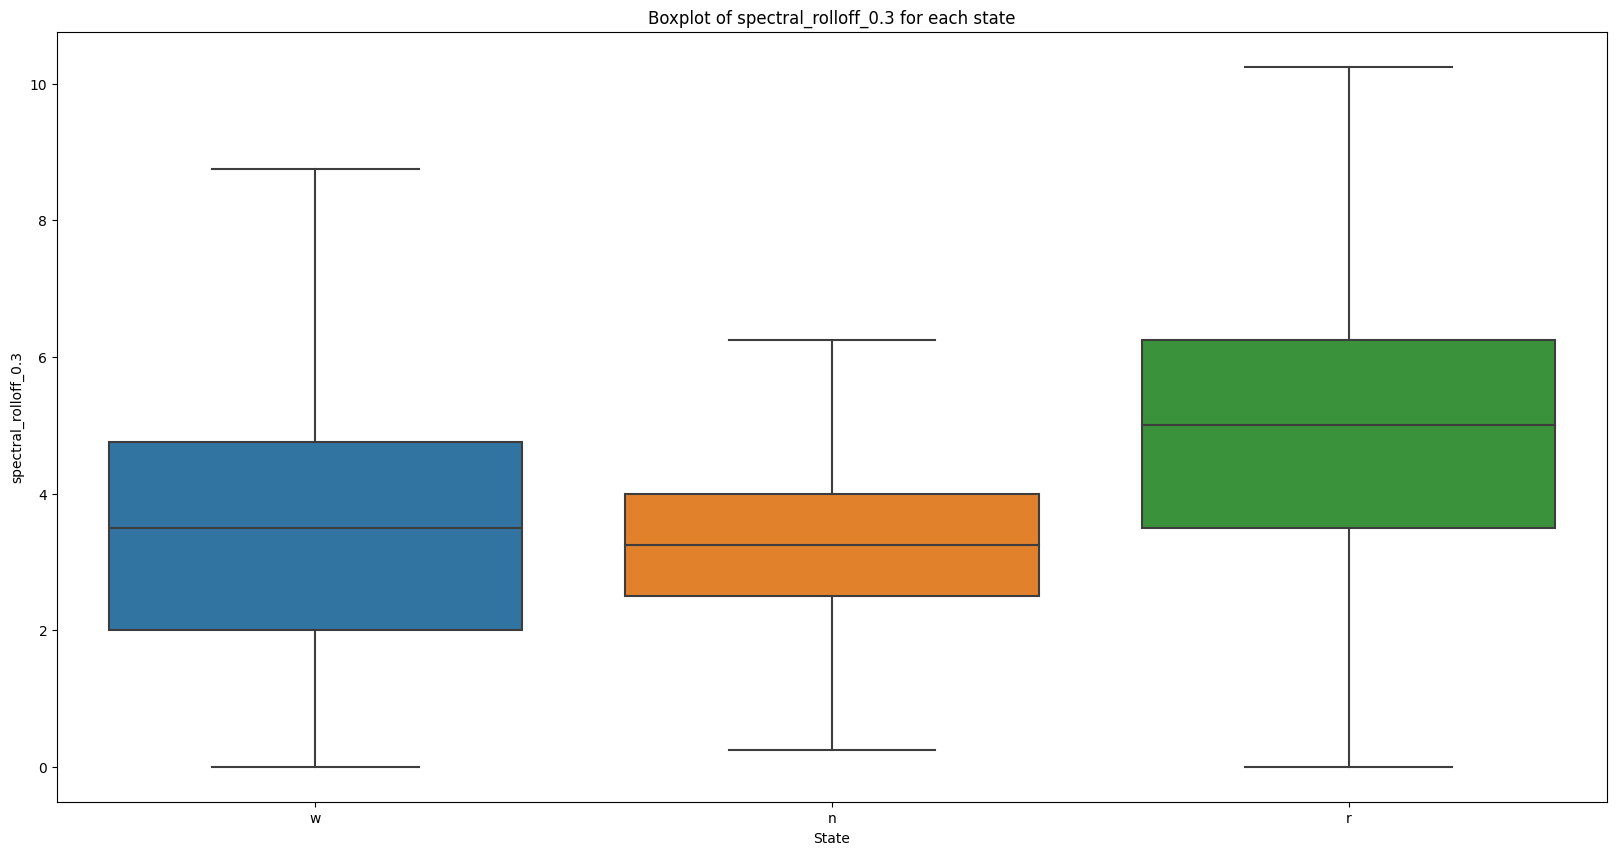

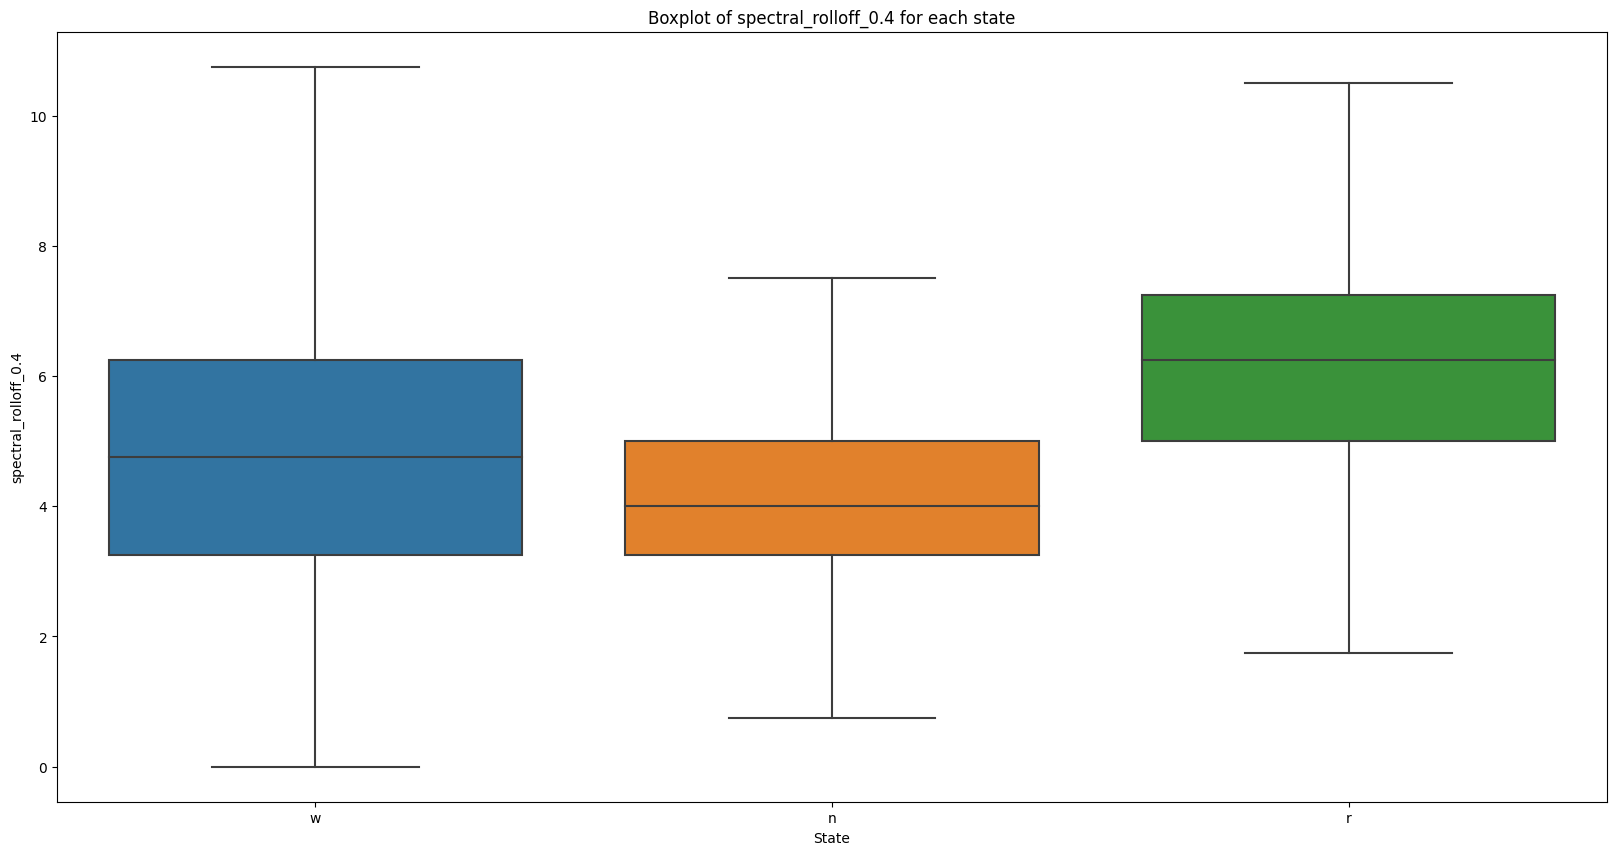

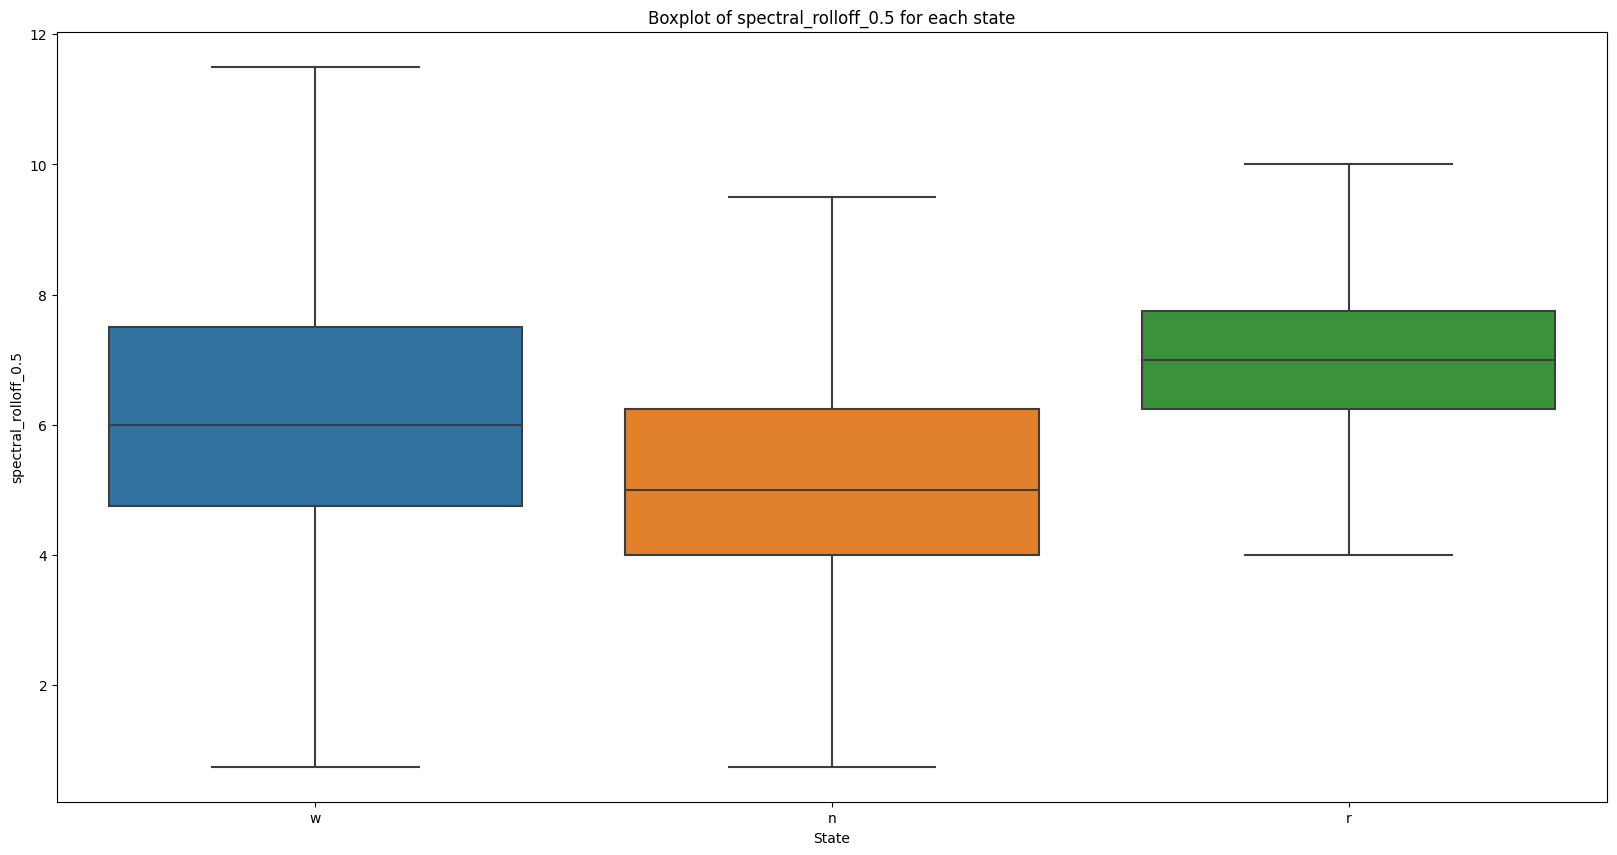

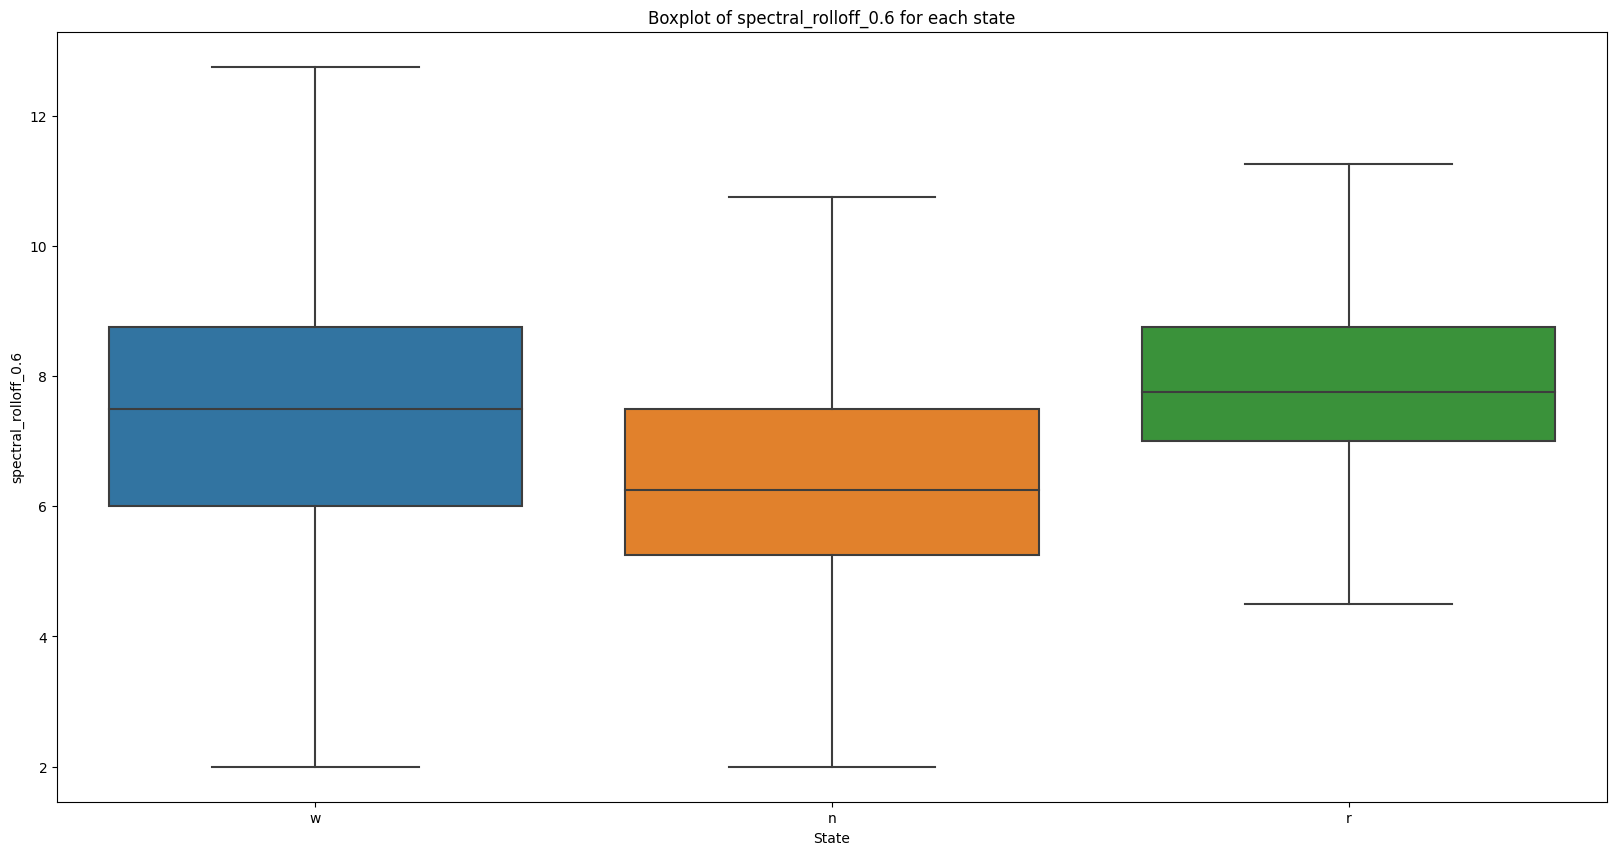

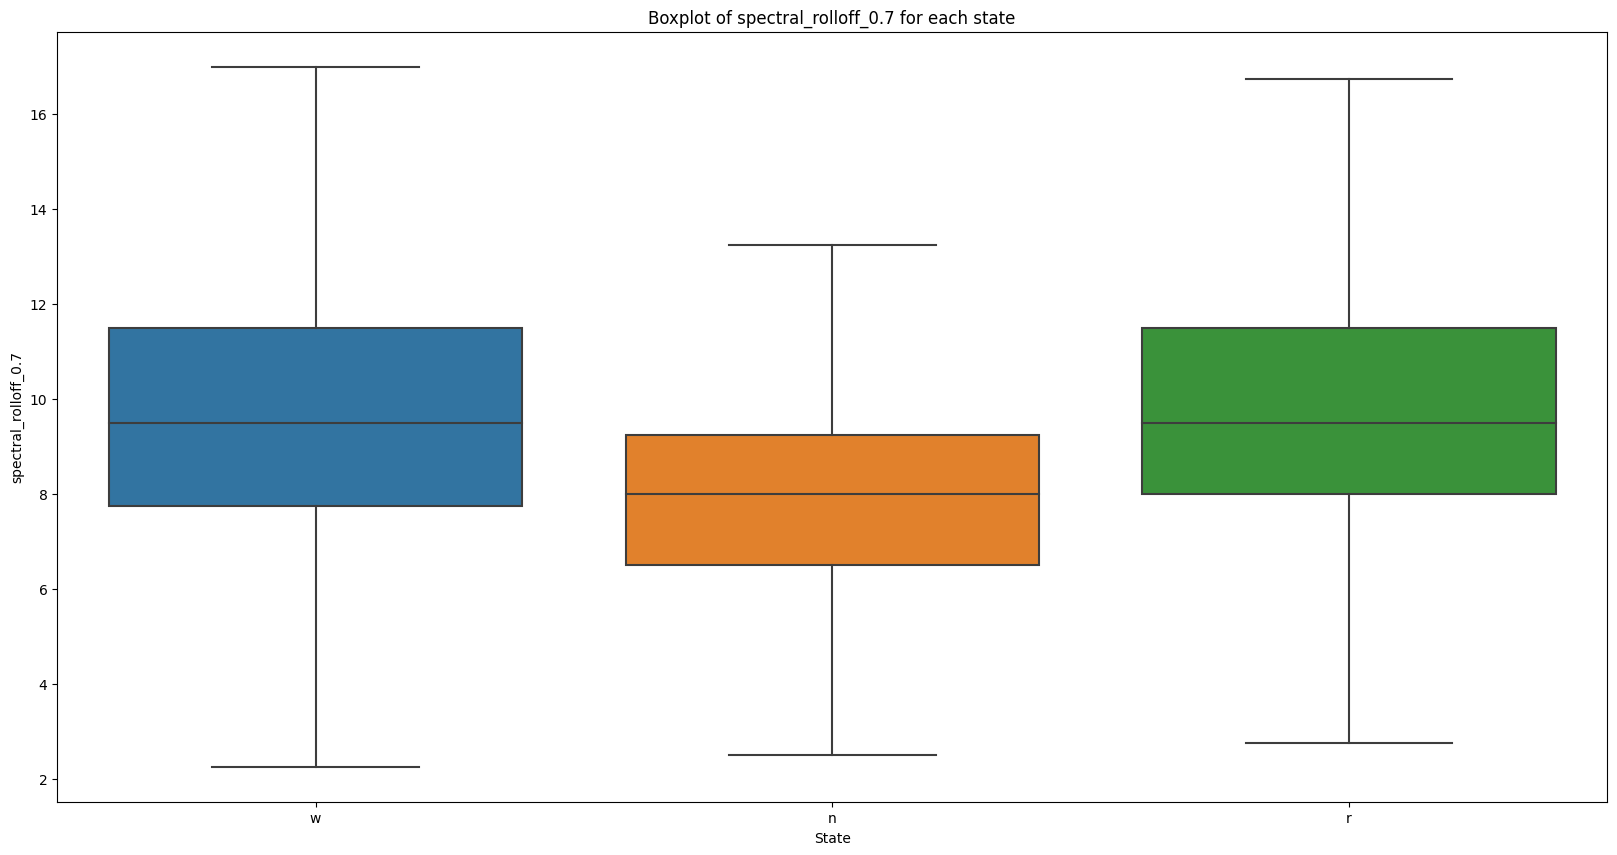

In [11]:
plot_boxplot_without_outlier('spectral_rolloff_0.1')
plot_boxplot_without_outlier('spectral_rolloff_0.2')
plot_boxplot_without_outlier('spectral_rolloff_0.3')
plot_boxplot_without_outlier('spectral_rolloff_0.4')
plot_boxplot_without_outlier('spectral_rolloff_0.5')
plot_boxplot_without_outlier('spectral_rolloff_0.6')
plot_boxplot_without_outlier('spectral_rolloff_0.7')

We can see that the best percentage for the roll off is the 0.9. 

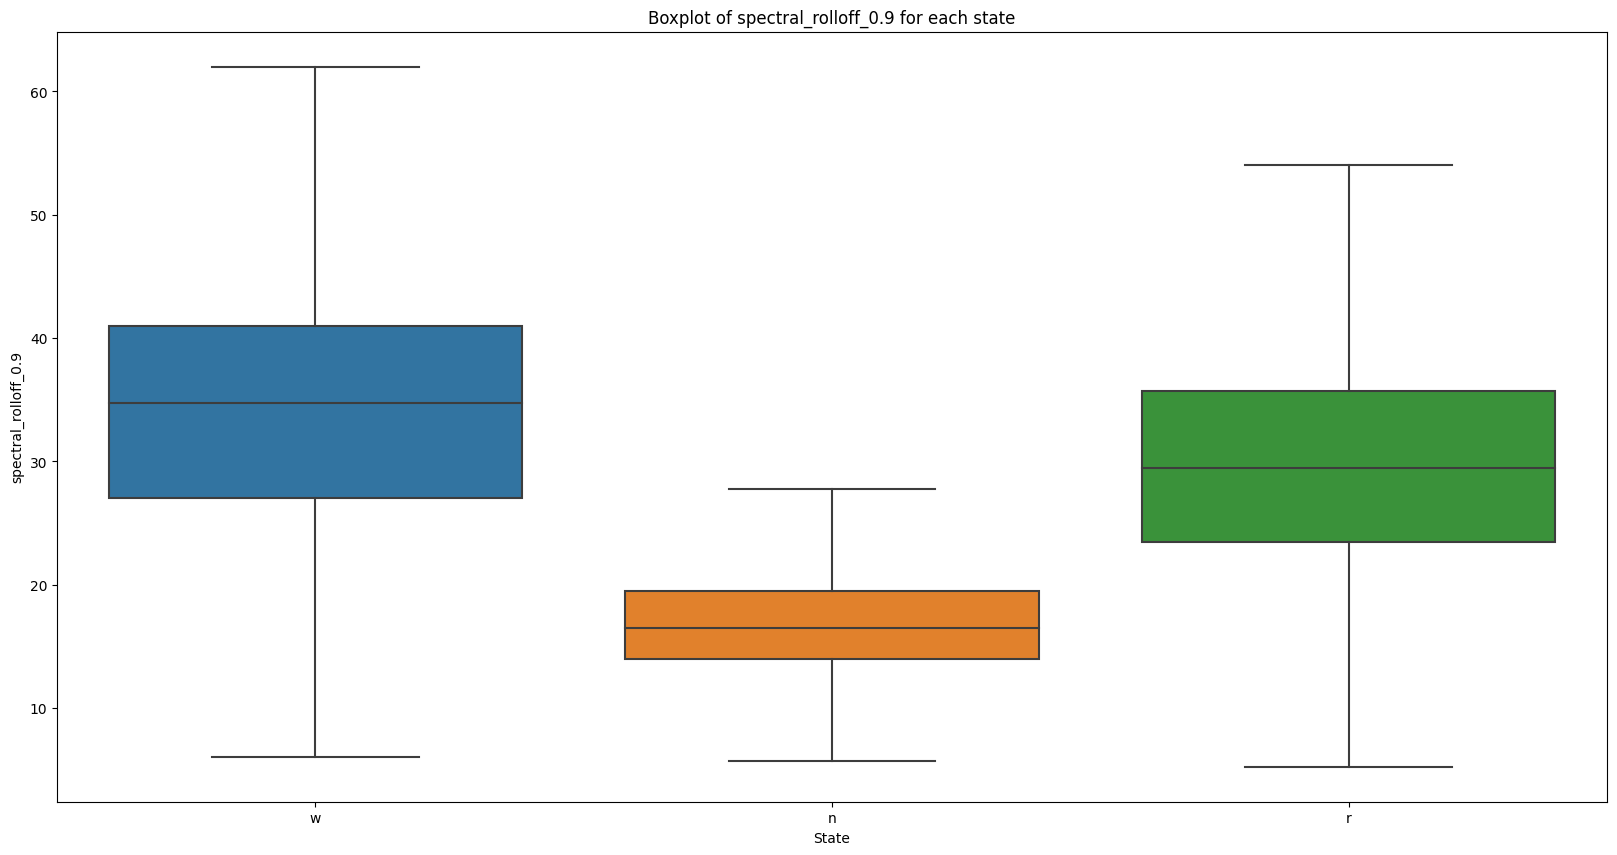

In [12]:
plot_boxplot_without_outlier('spectral_rolloff_0.9')

### Windows features mean and median

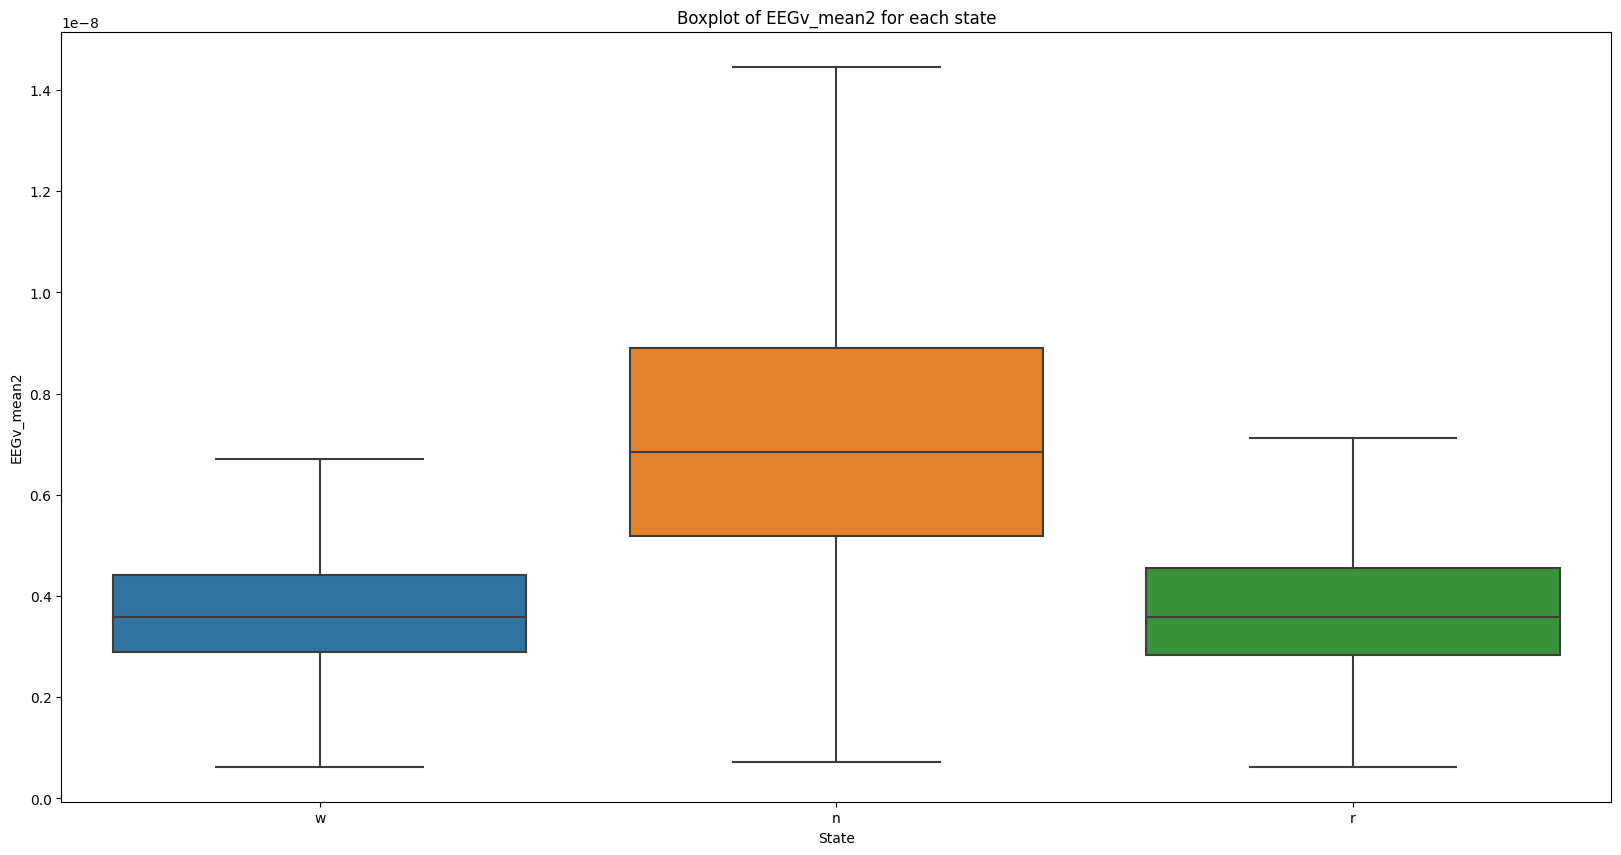

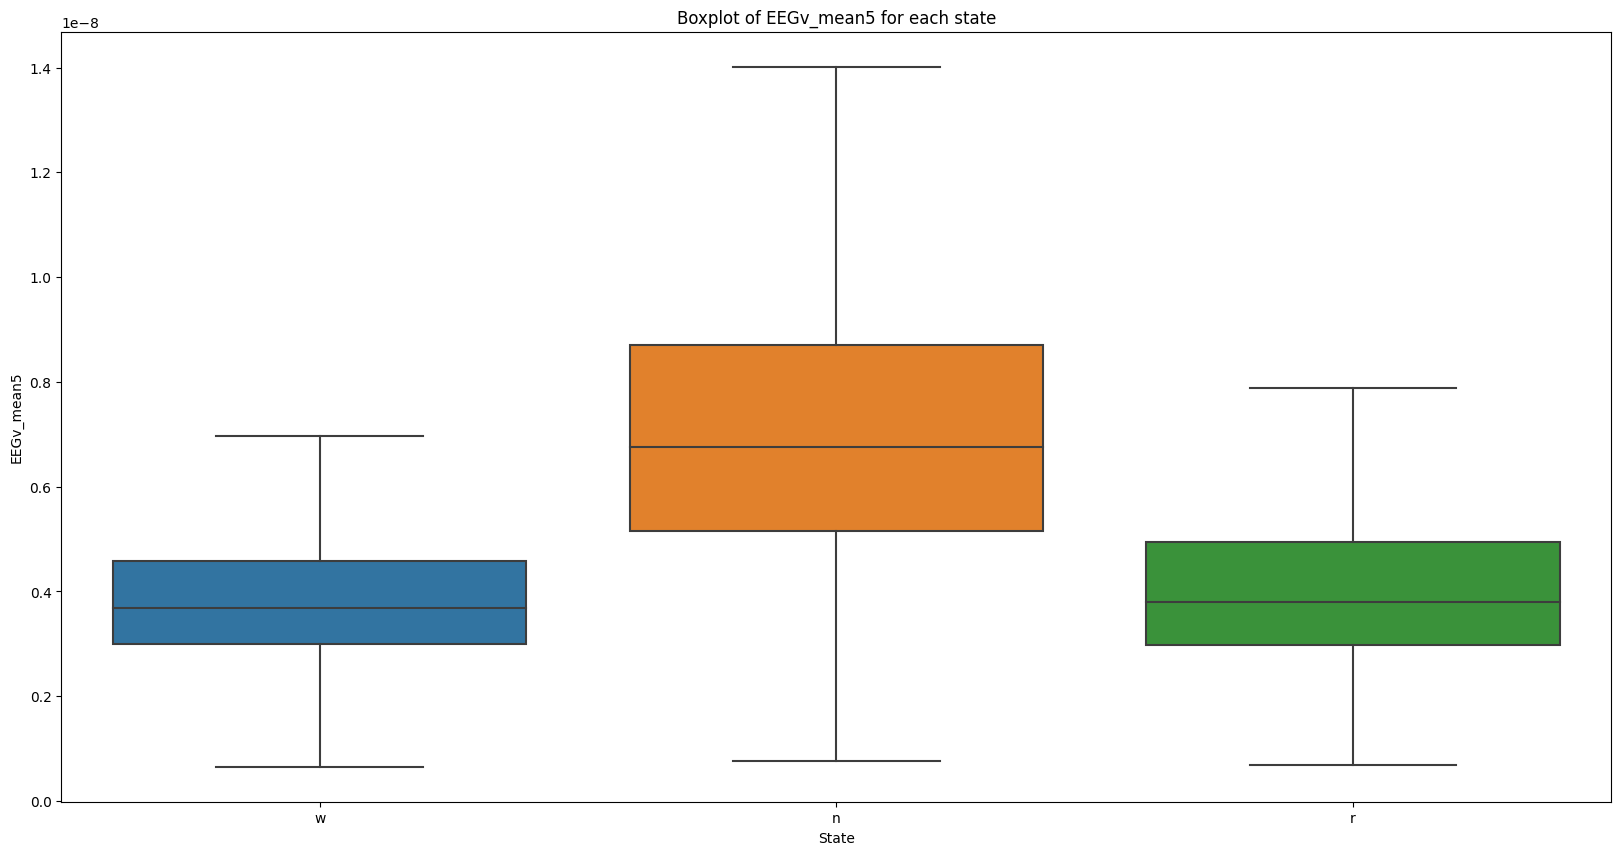

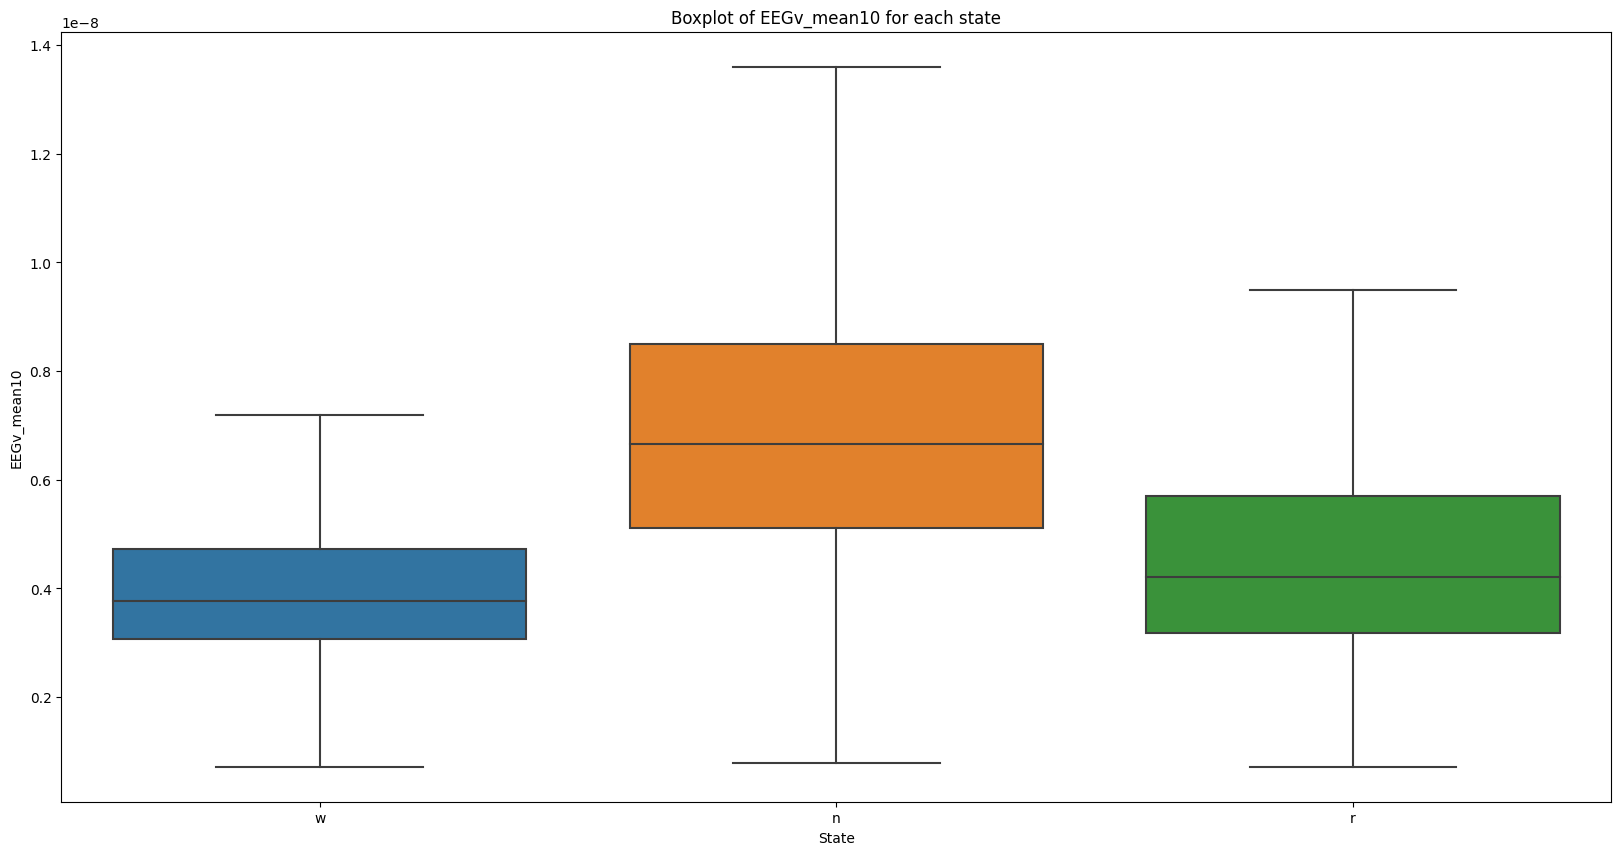

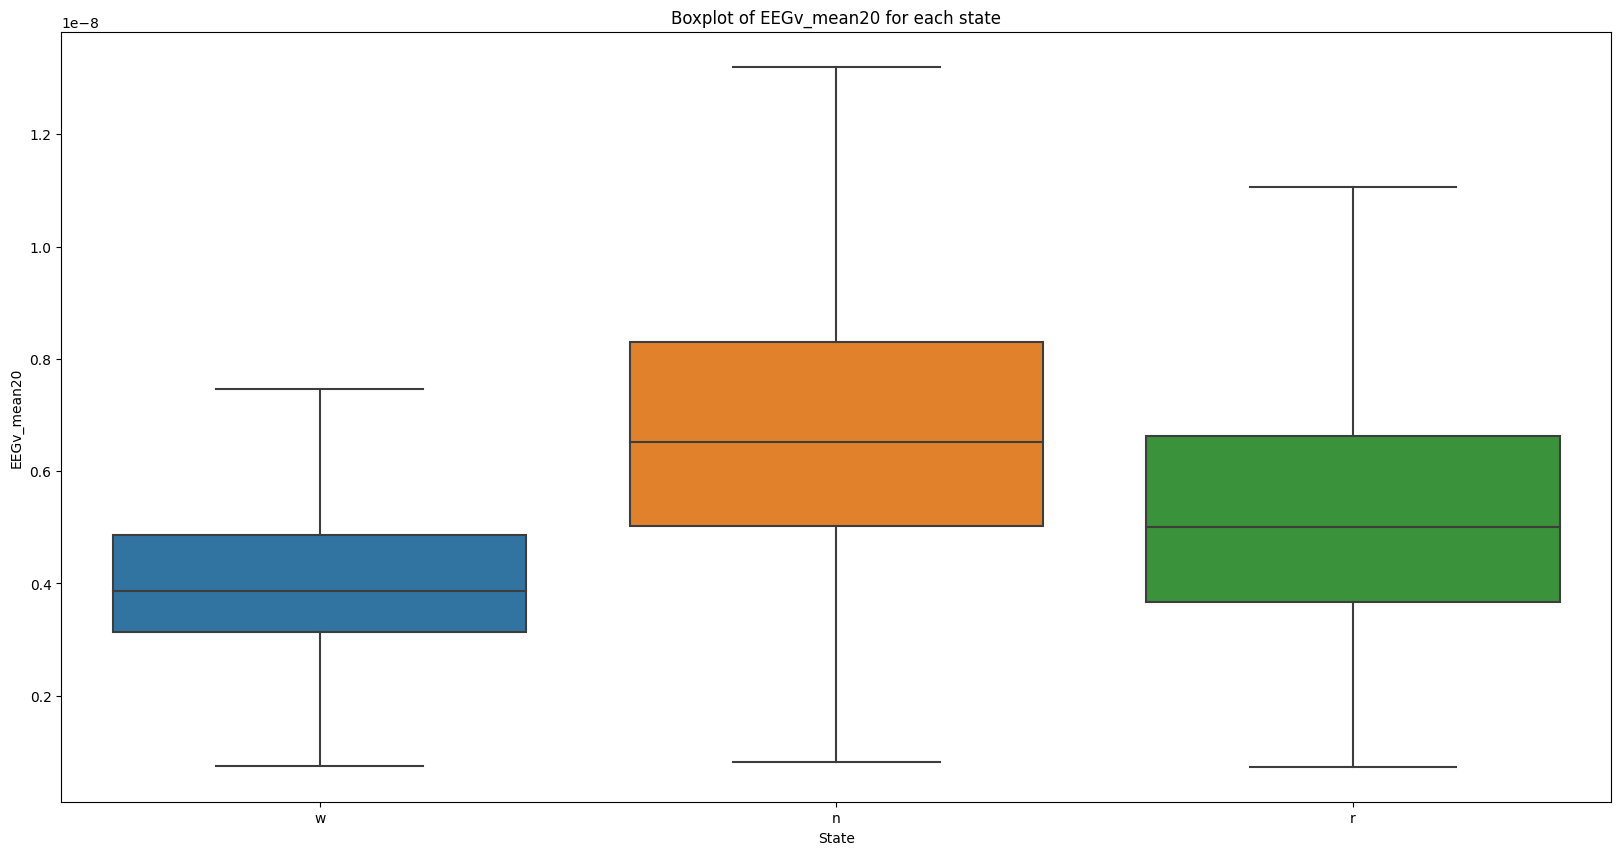

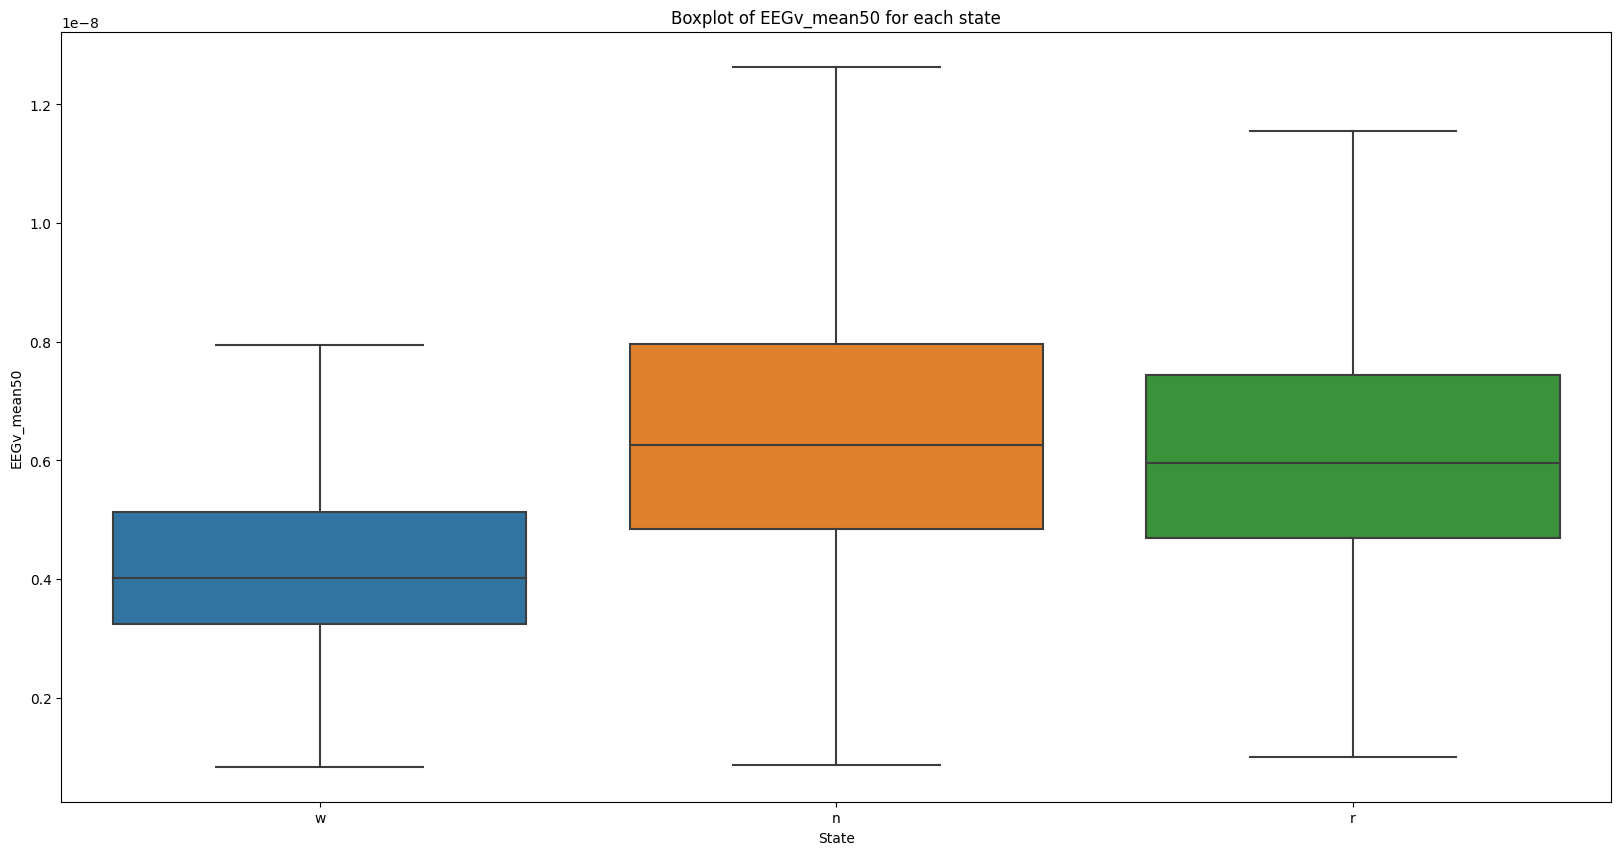

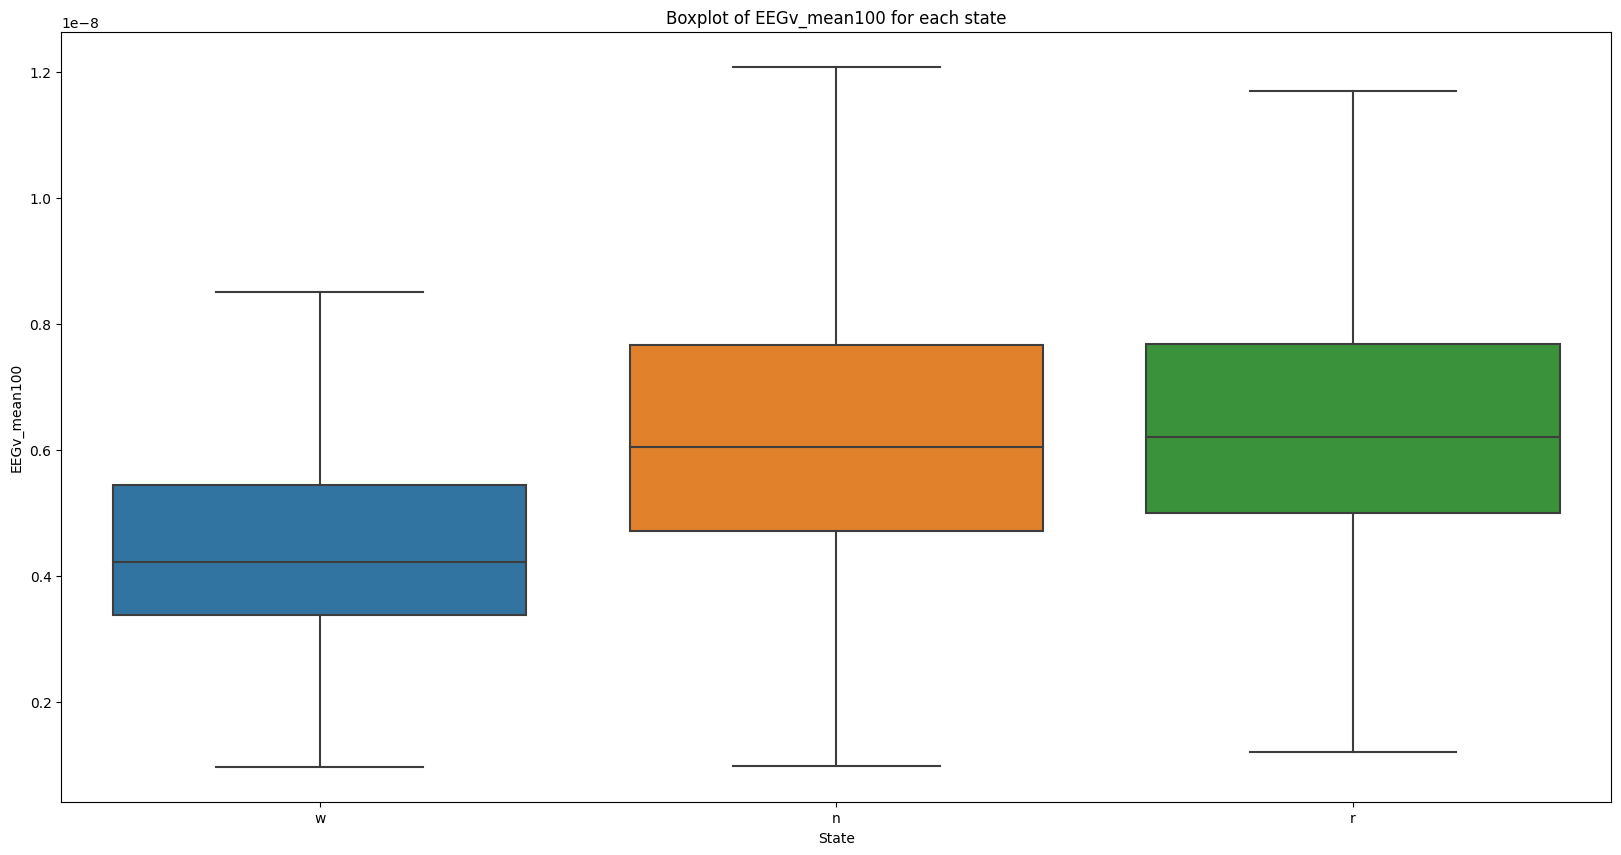

In [13]:
# windowed features about the mean
plot_boxplot_without_outlier('EEGv_mean2')
plot_boxplot_without_outlier('EEGv_mean5')
plot_boxplot_without_outlier('EEGv_mean10')
plot_boxplot_without_outlier('EEGv_mean20')
plot_boxplot_without_outlier('EEGv_mean50')
plot_boxplot_without_outlier('EEGv_mean100')

The mean with a window size of 2 and of 5, which represent respectively 8 seconds and 20 seconds seems to be a good feature to study.

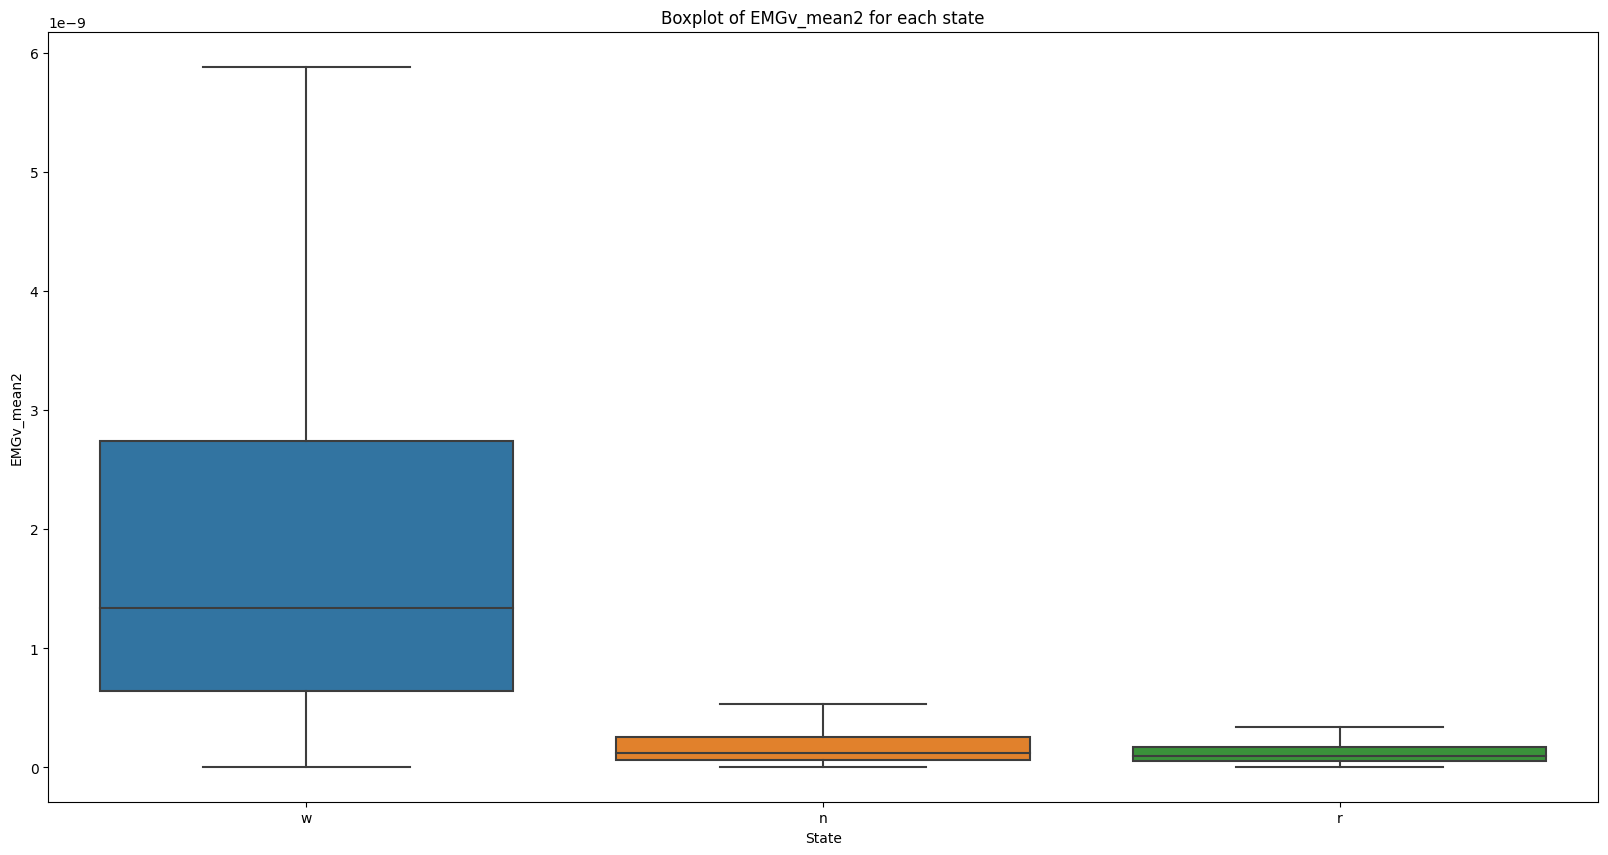

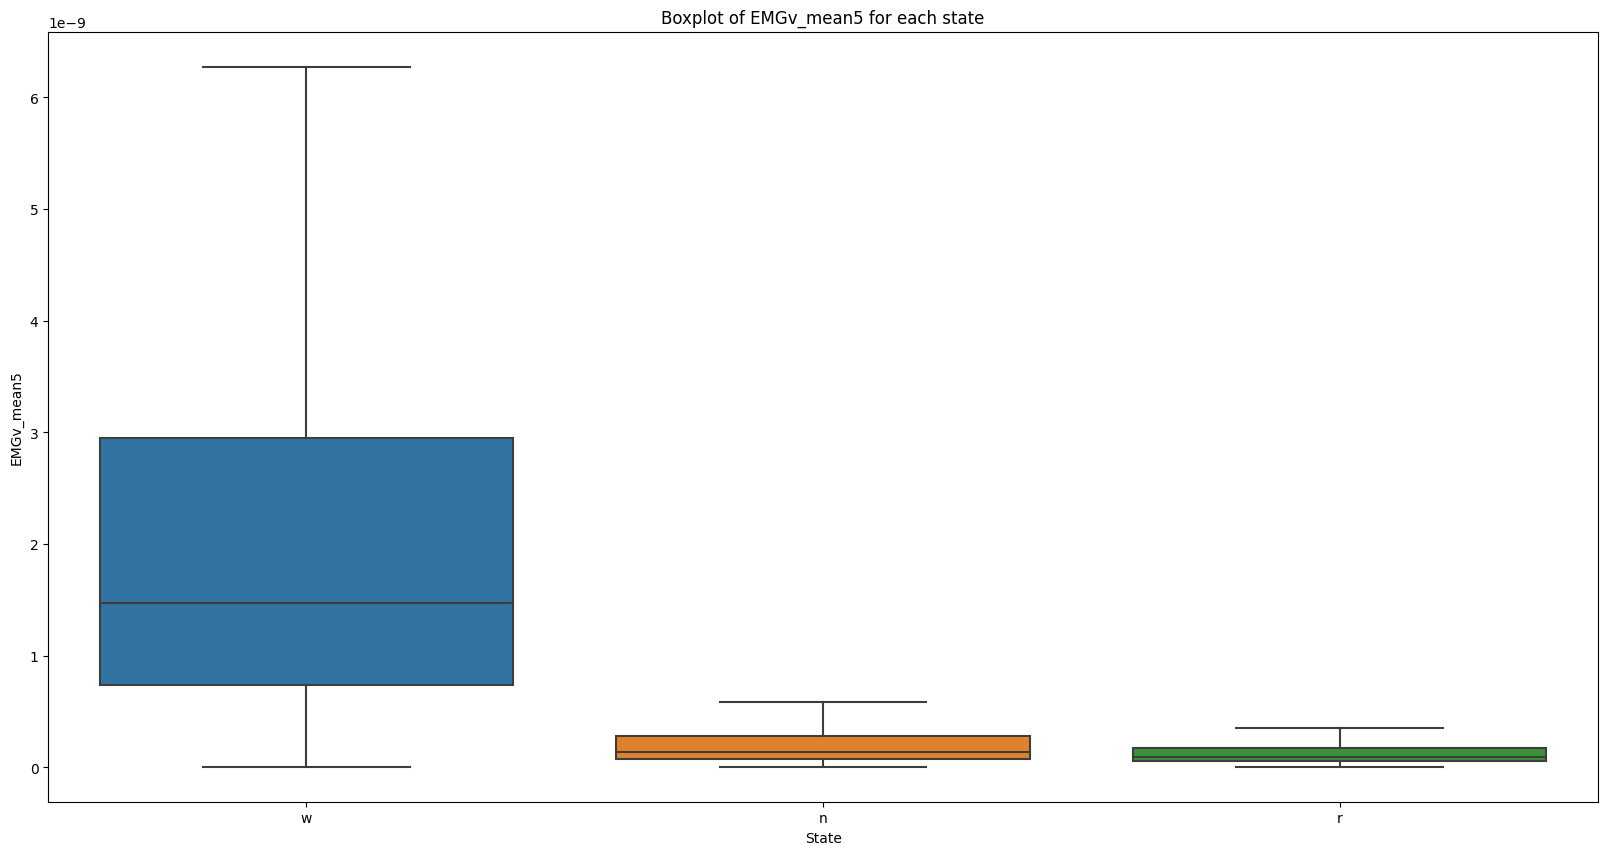

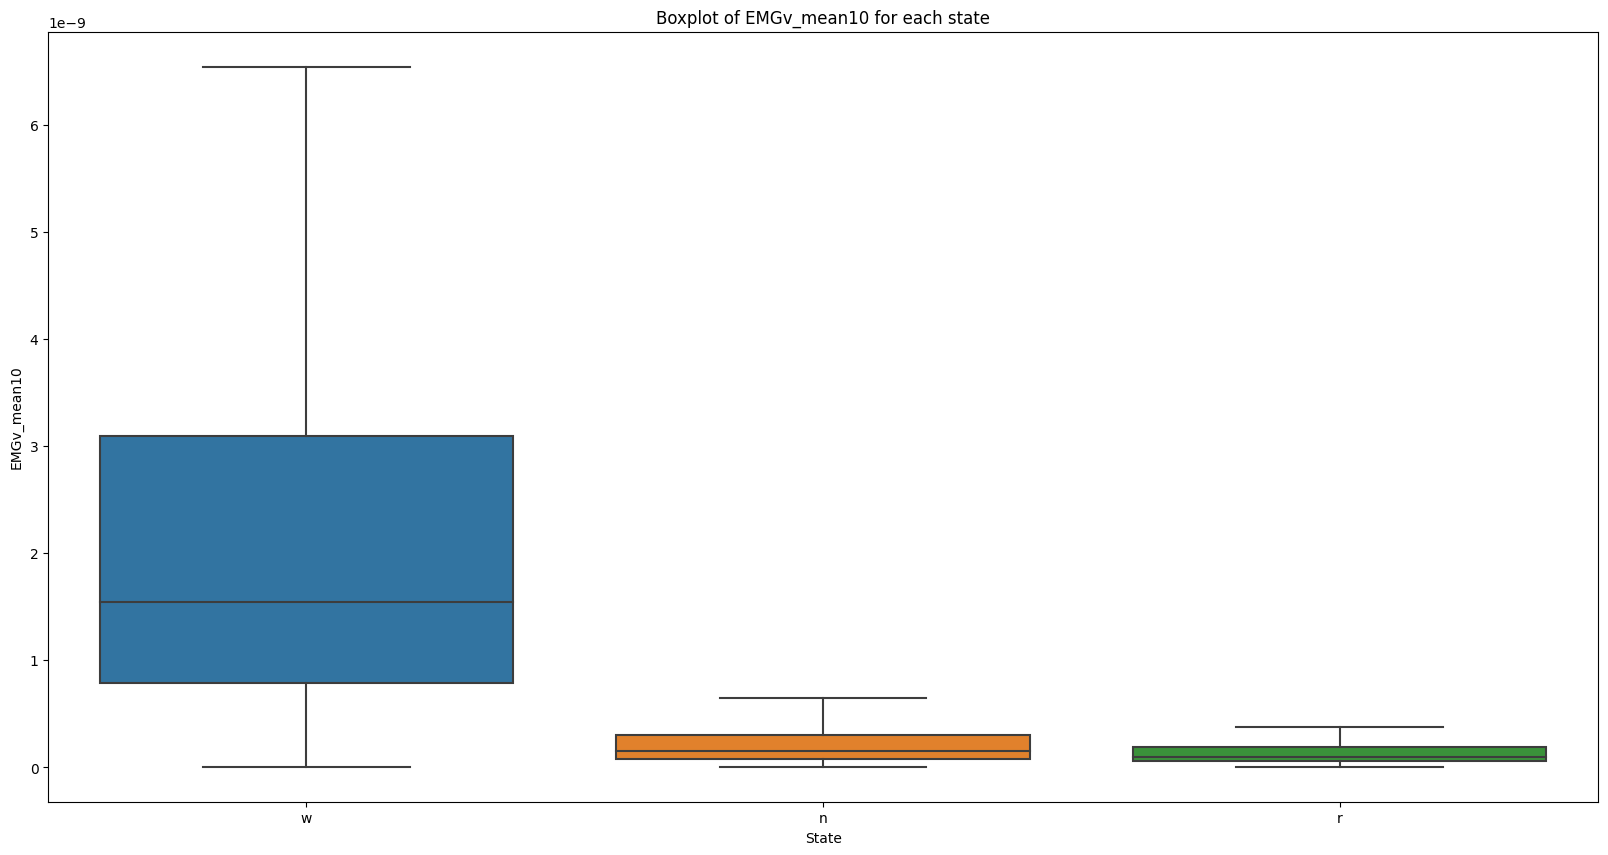

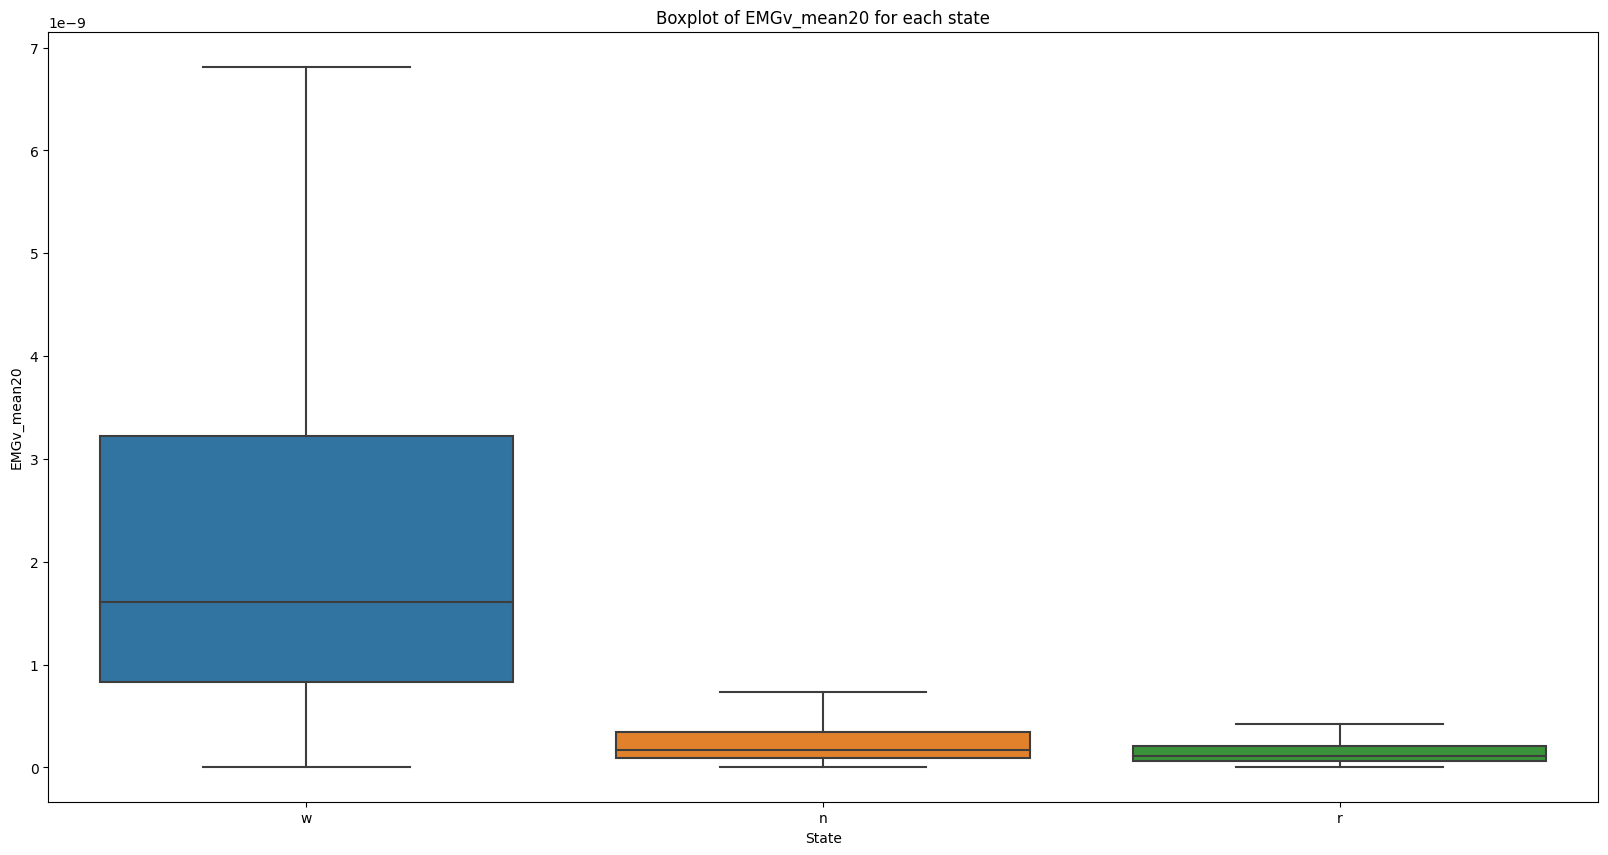

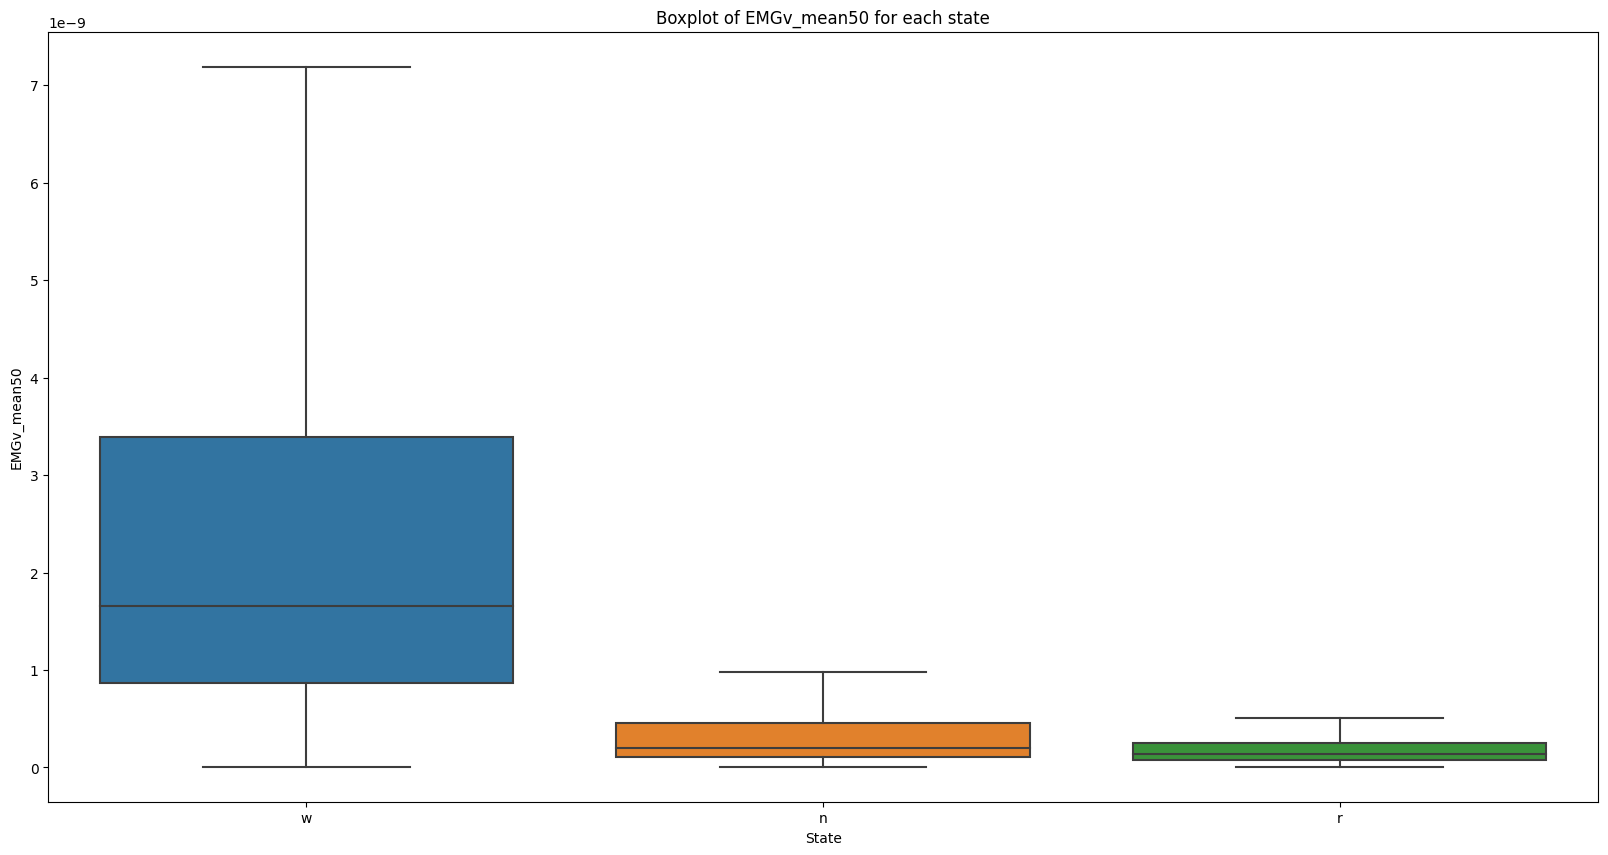

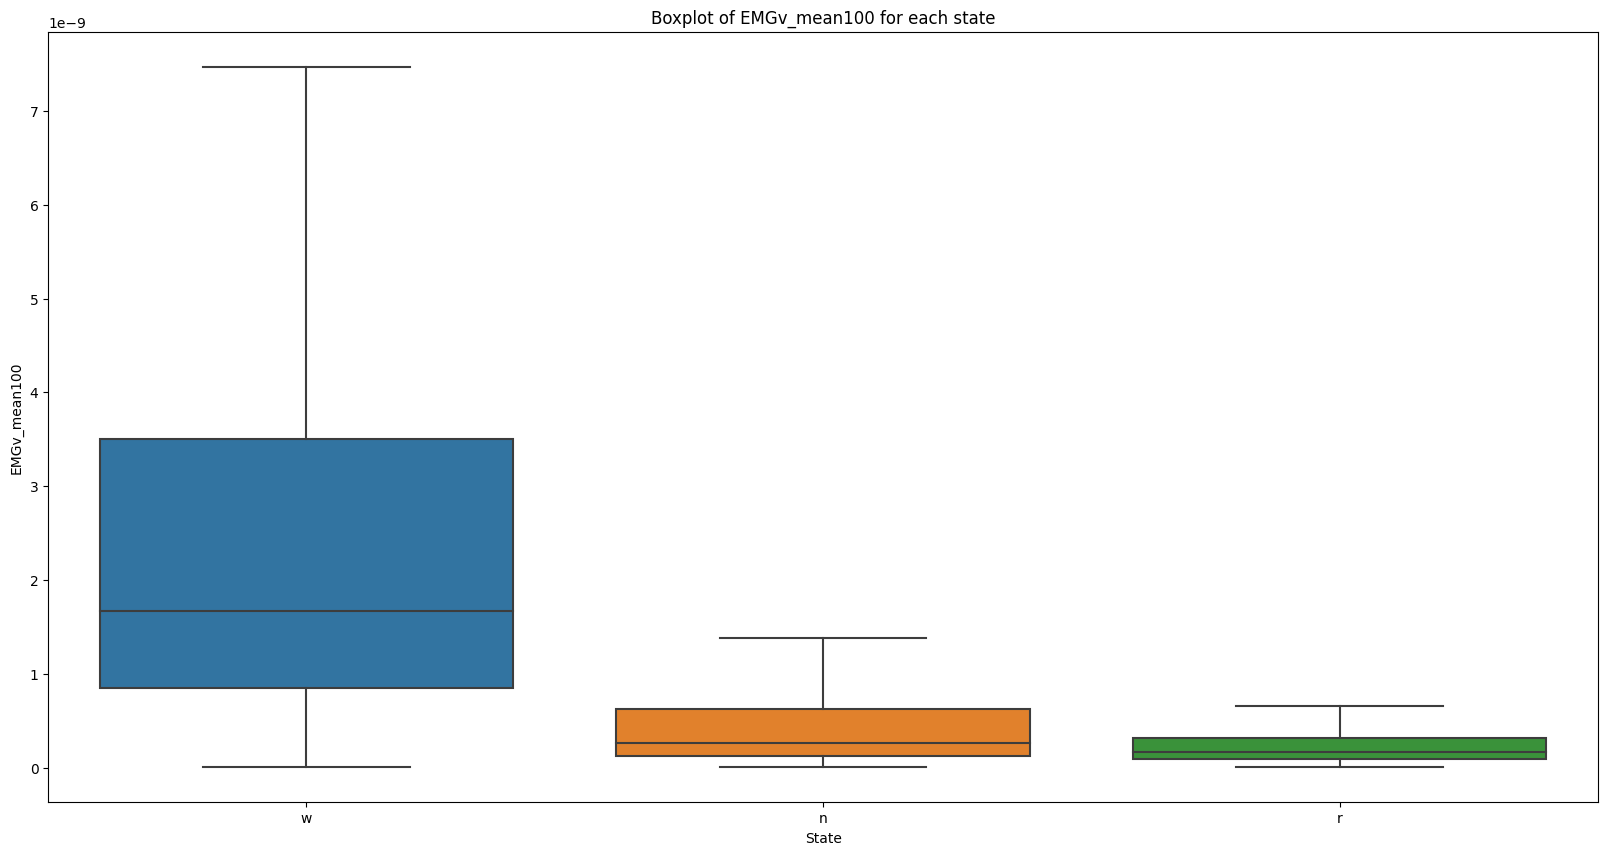

In [14]:
plot_boxplot_without_outlier('EMGv_mean2')
plot_boxplot_without_outlier('EMGv_mean5')
plot_boxplot_without_outlier('EMGv_mean10')
plot_boxplot_without_outlier('EMGv_mean20')
plot_boxplot_without_outlier('EMGv_mean50')
plot_boxplot_without_outlier('EMGv_mean100')

The window mean of all the size seems to give information only about the wake state and not about the sleep state.

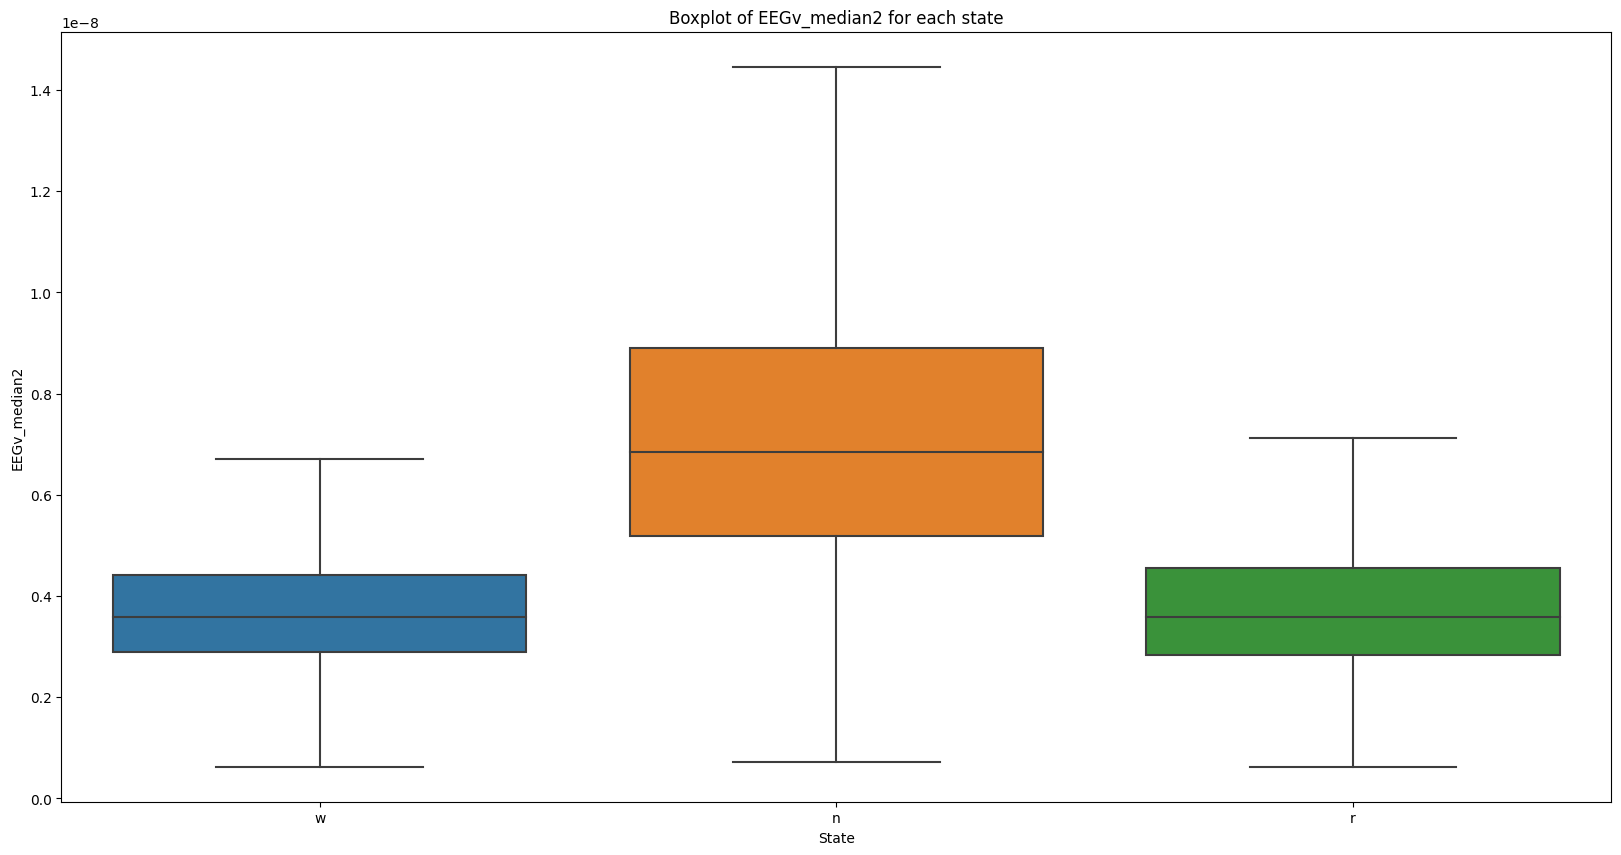

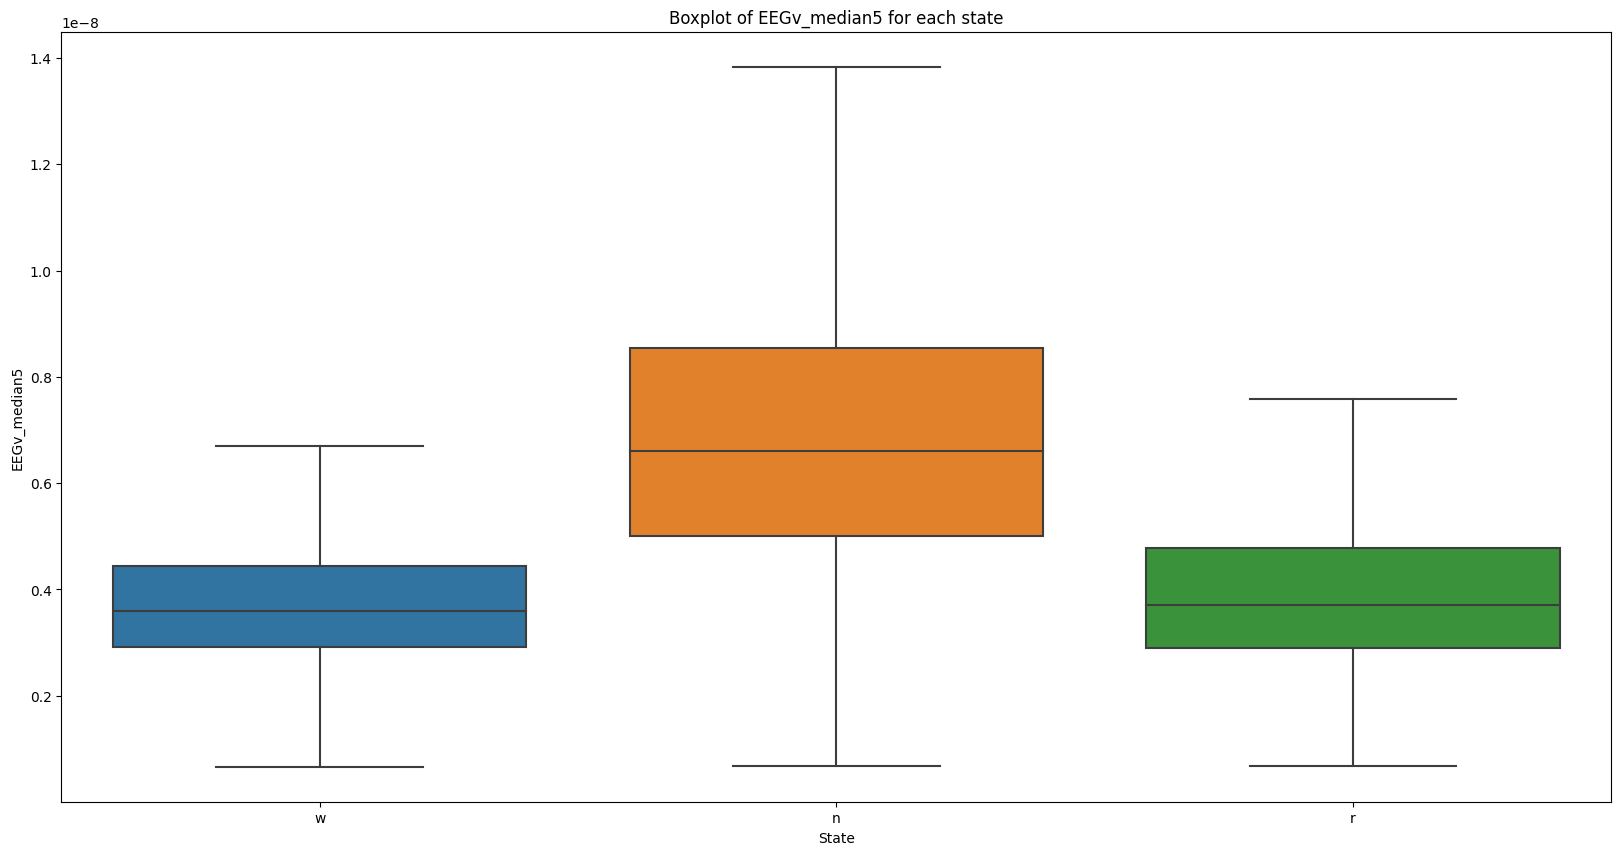

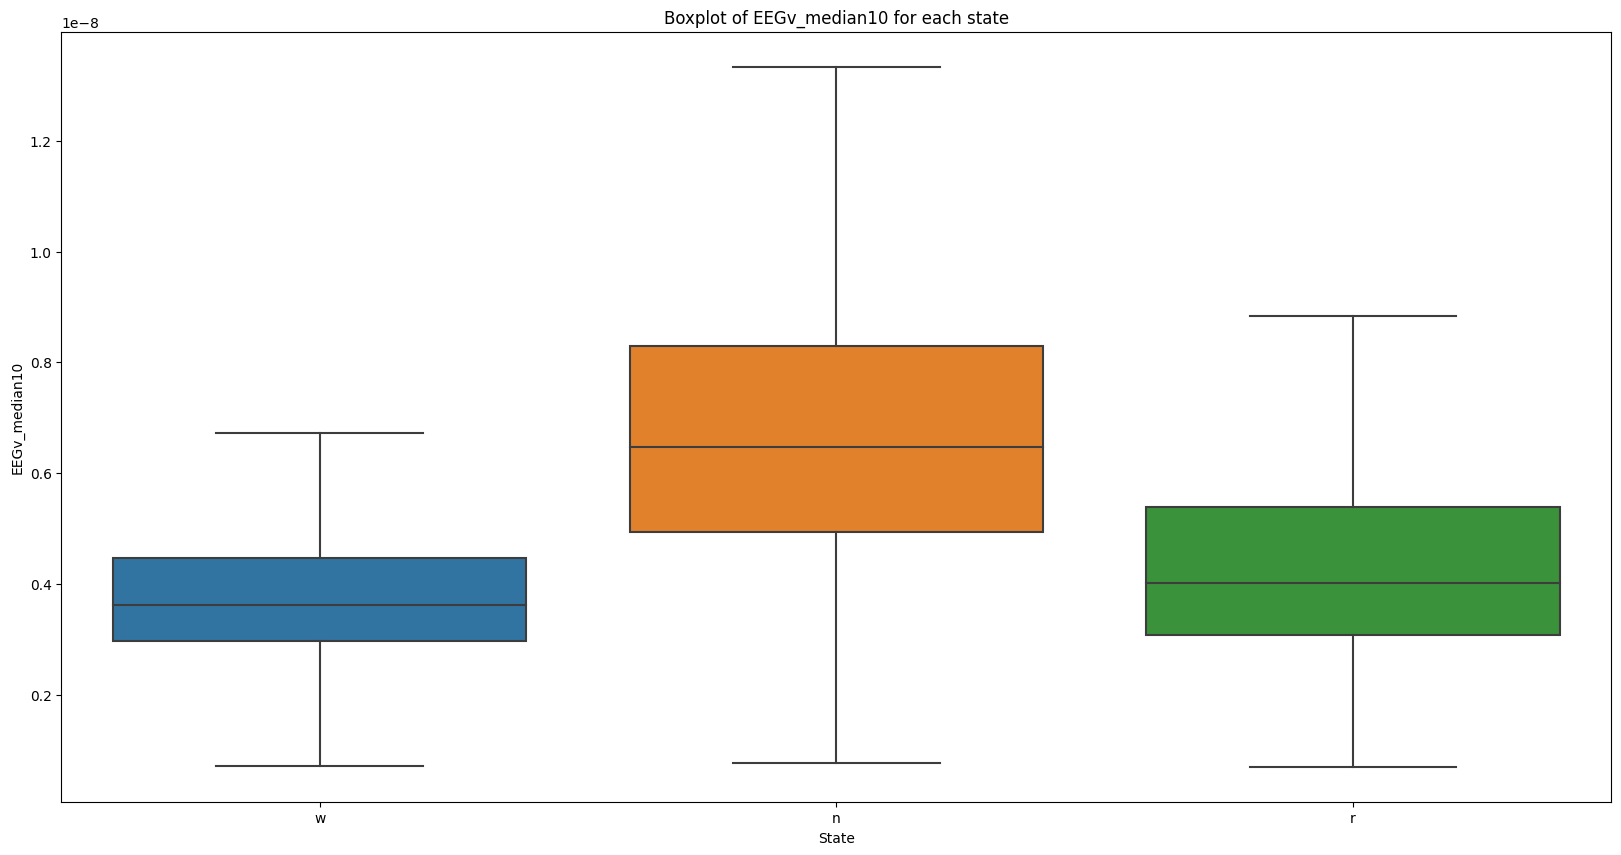

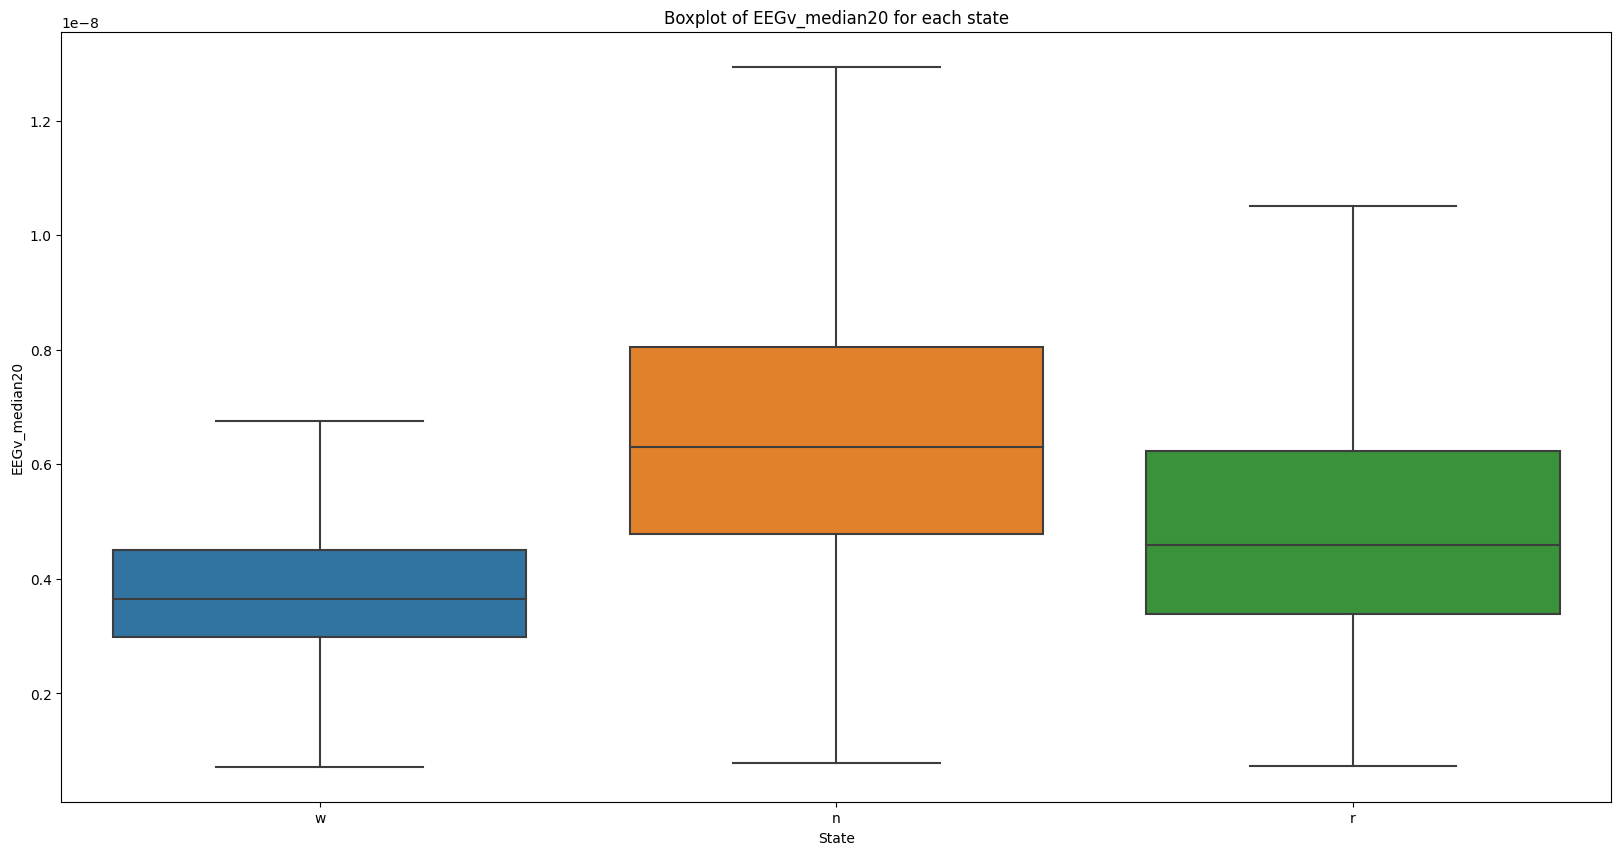

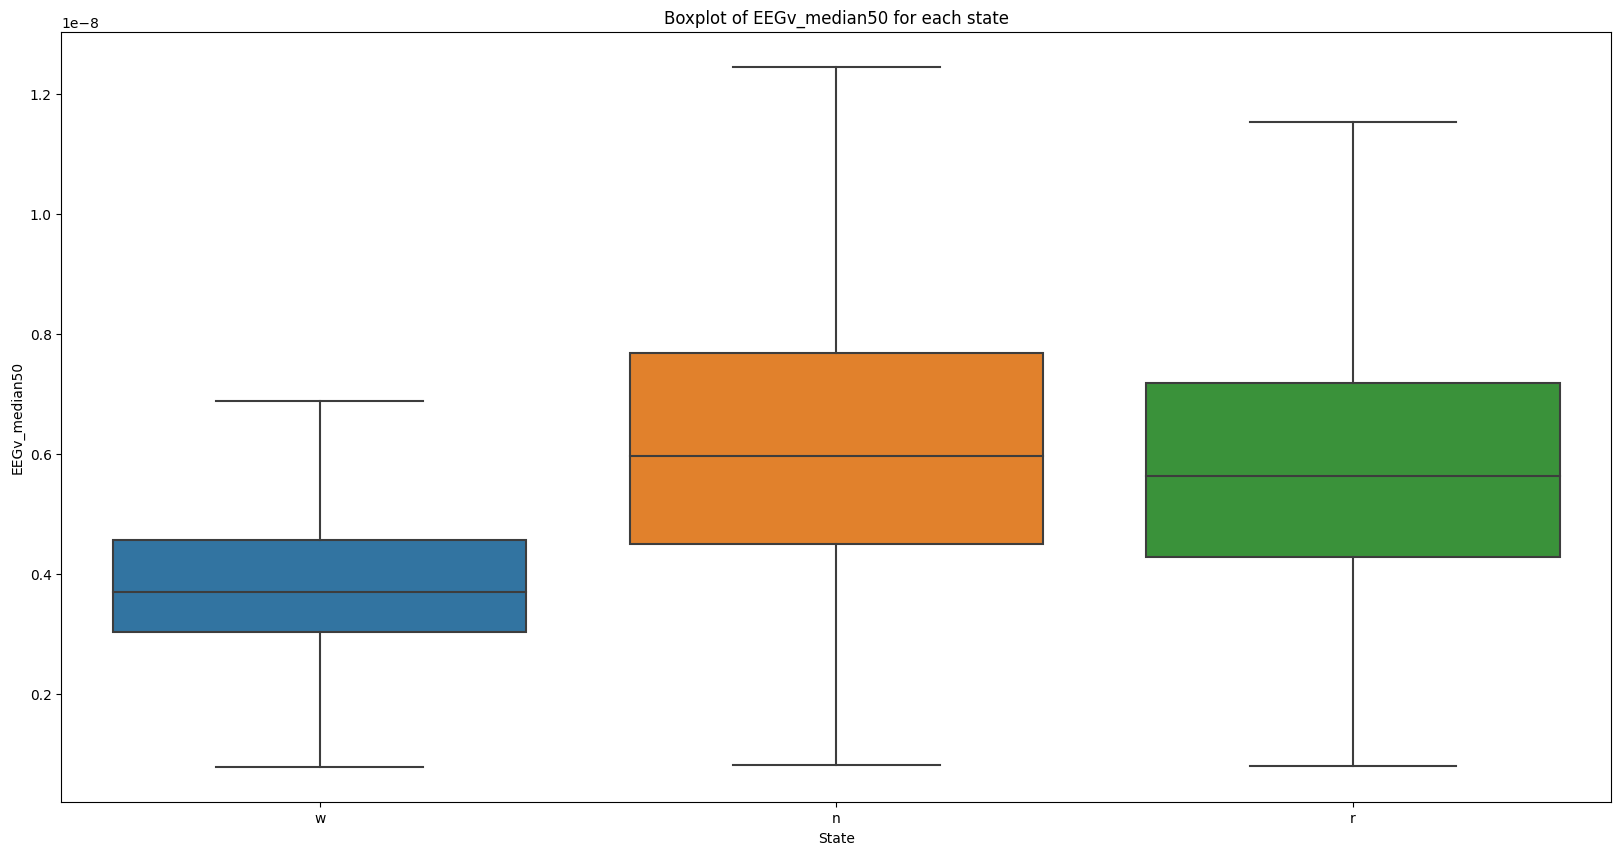

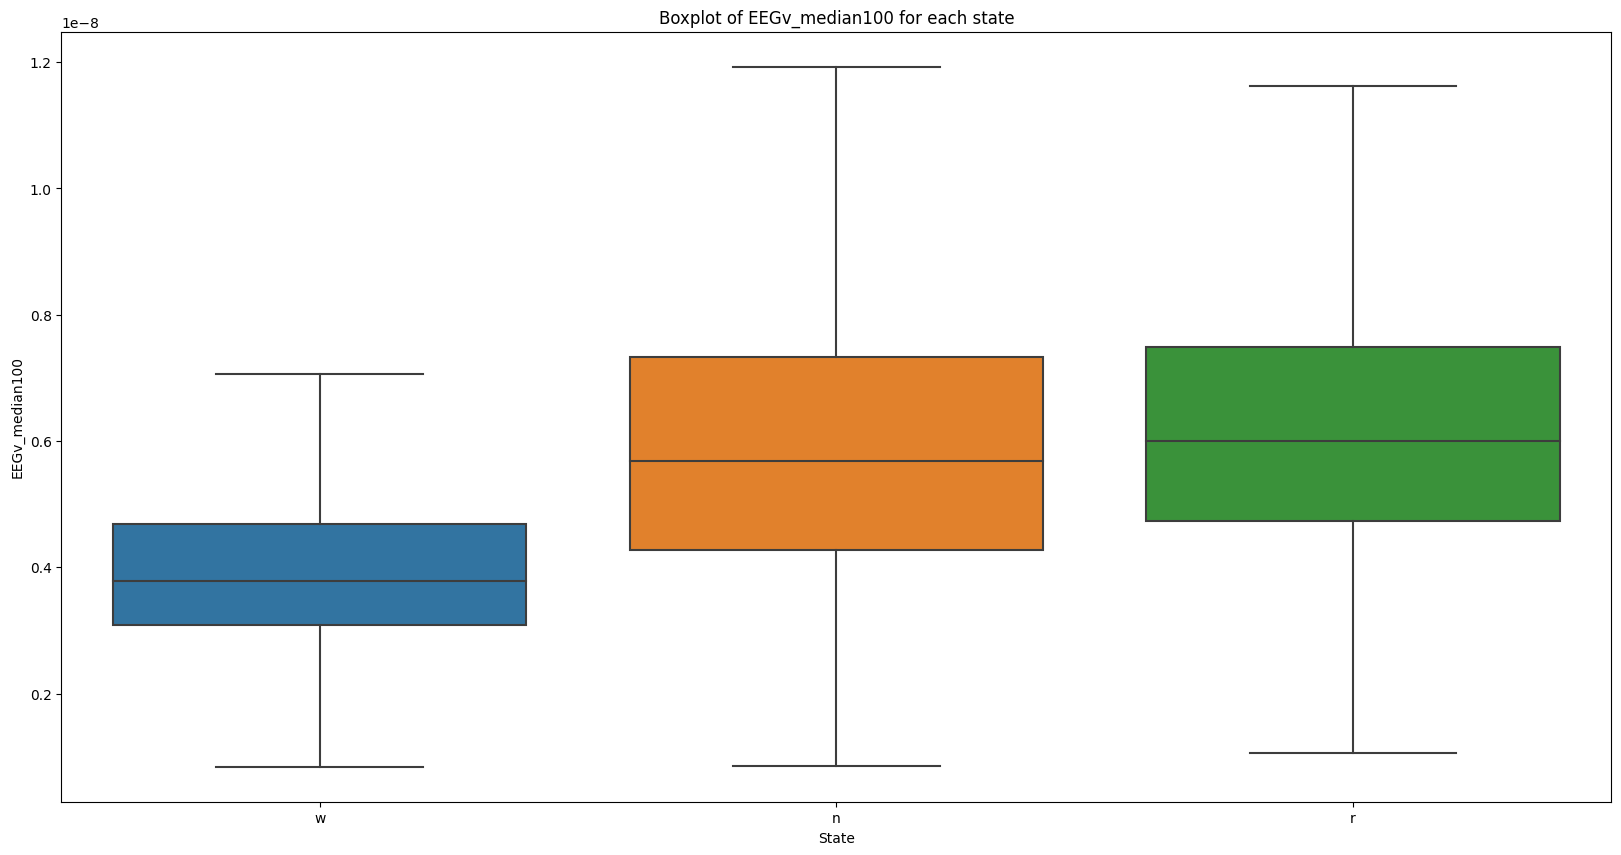

In [15]:
plot_boxplot_without_outlier('EEGv_median2')
plot_boxplot_without_outlier('EEGv_median5')
plot_boxplot_without_outlier('EEGv_median10')
plot_boxplot_without_outlier('EEGv_median20')
plot_boxplot_without_outlier('EEGv_median50')
plot_boxplot_without_outlier('EEGv_median100')

The median for window size of 2 and 5 seems to be a good feature to study. They are more informative that the bigger window size. As it was the case for the mean.

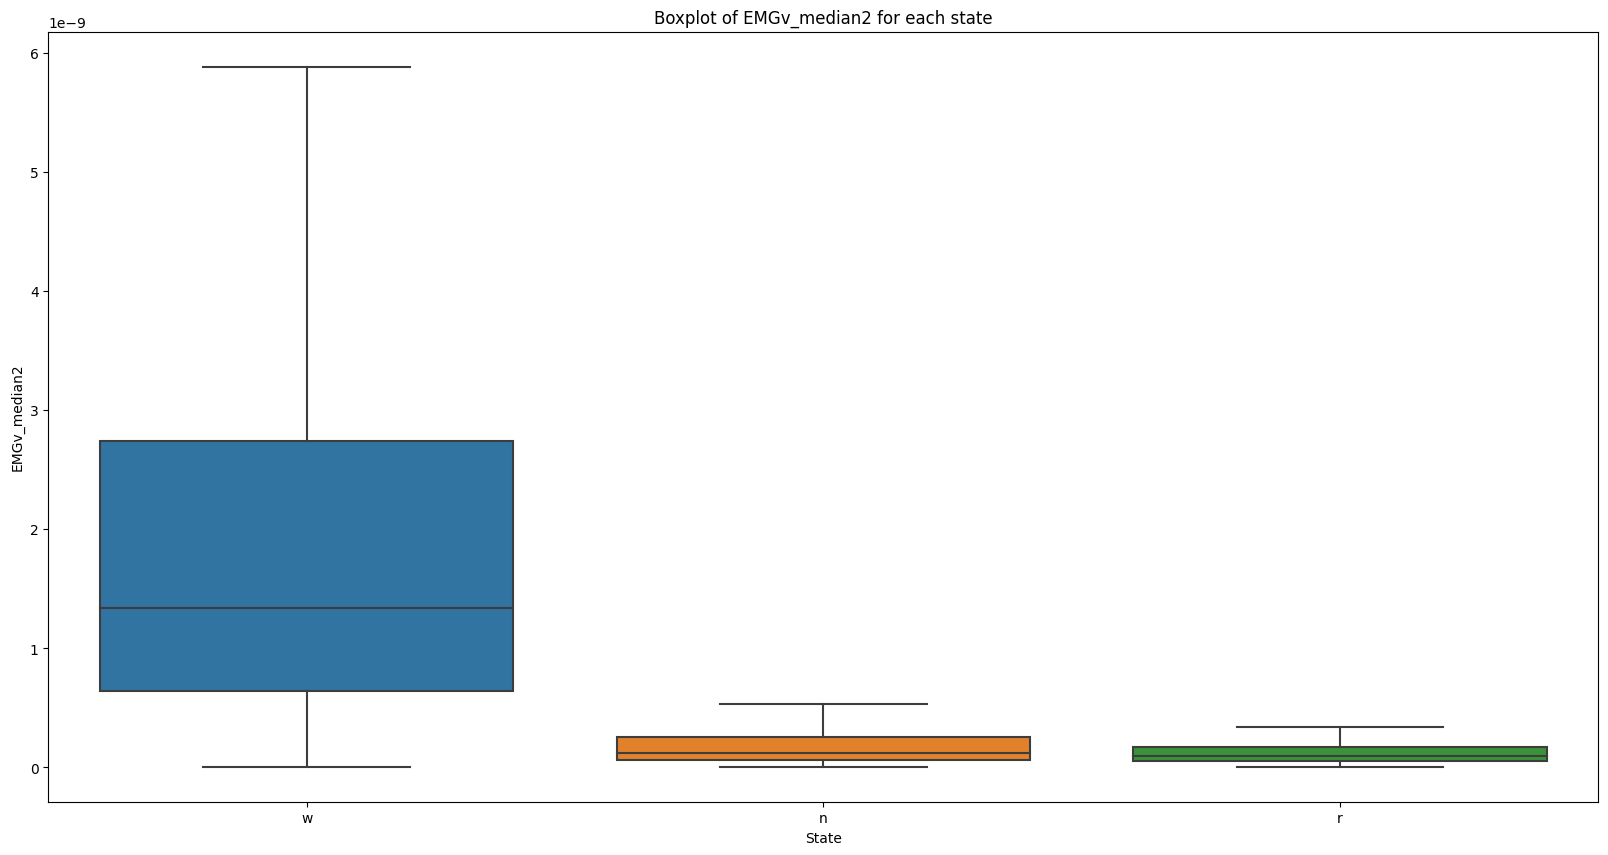

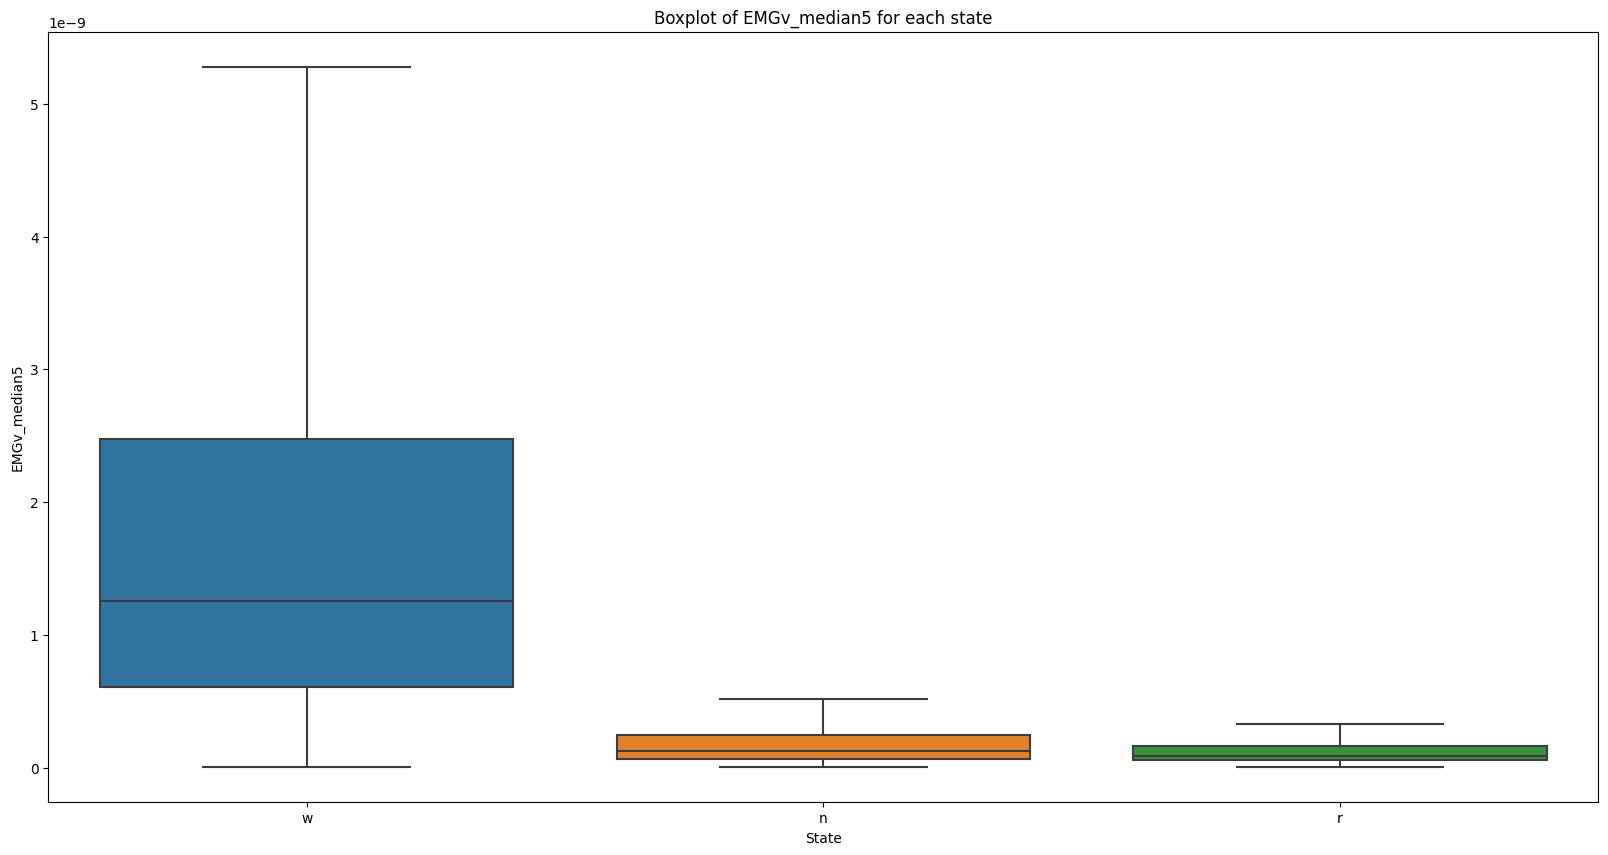

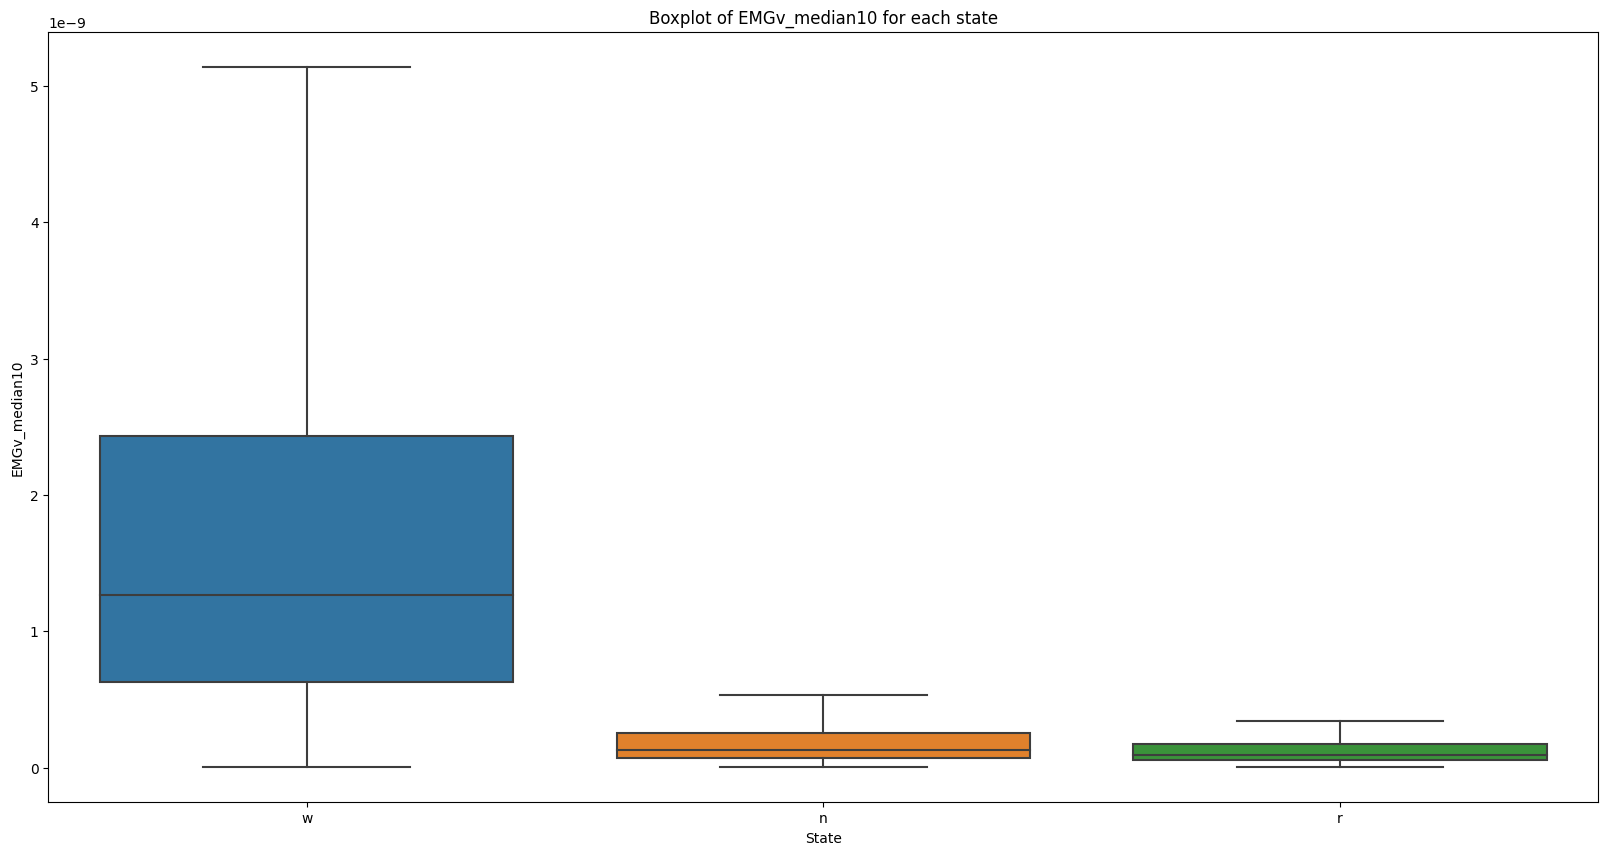

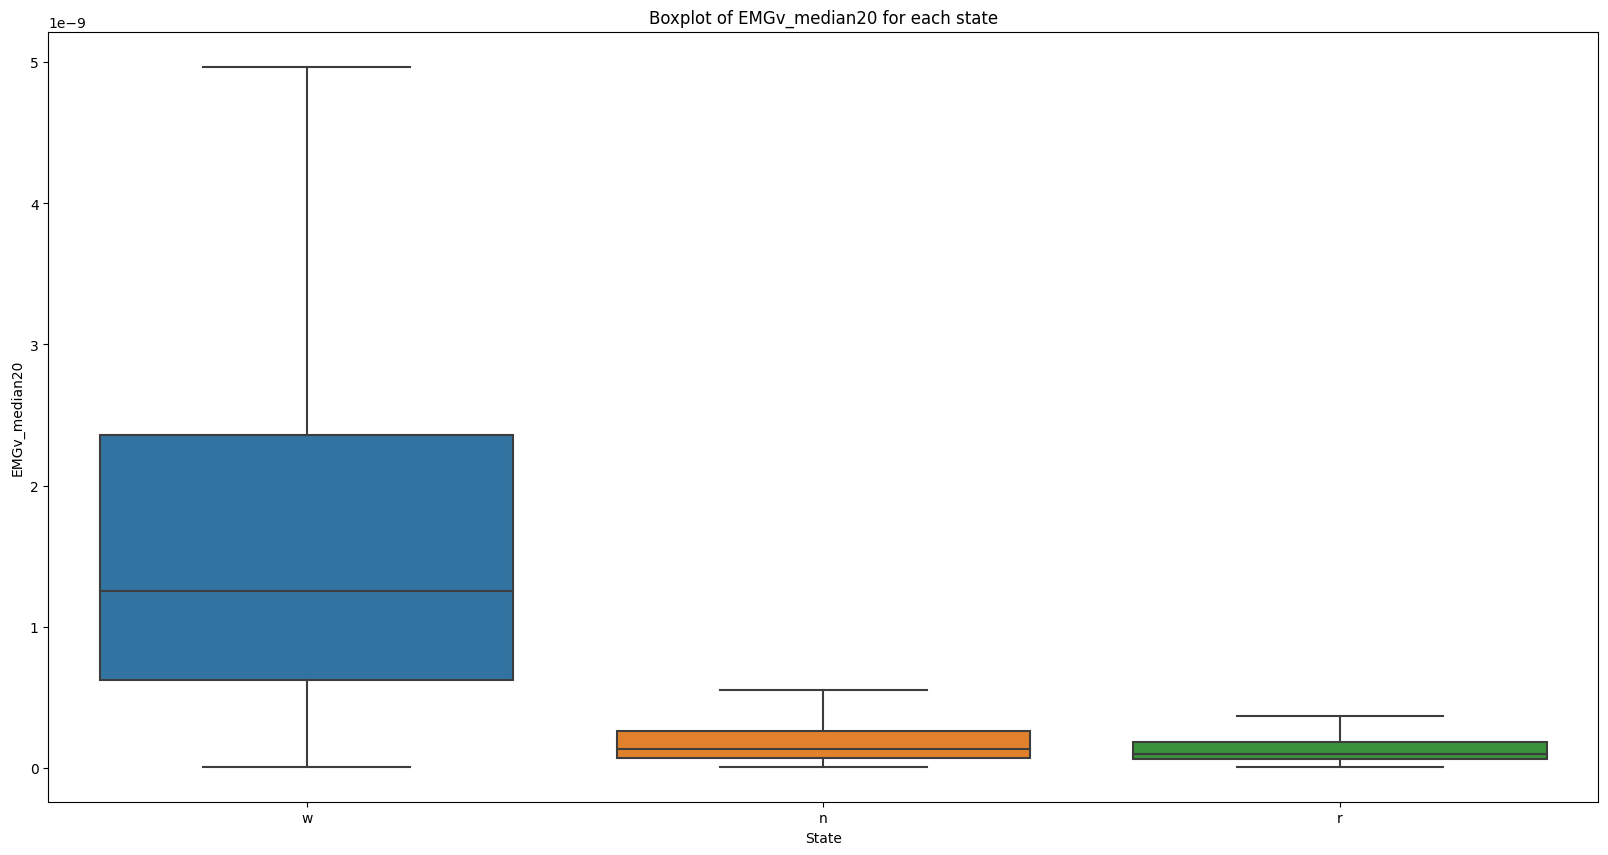

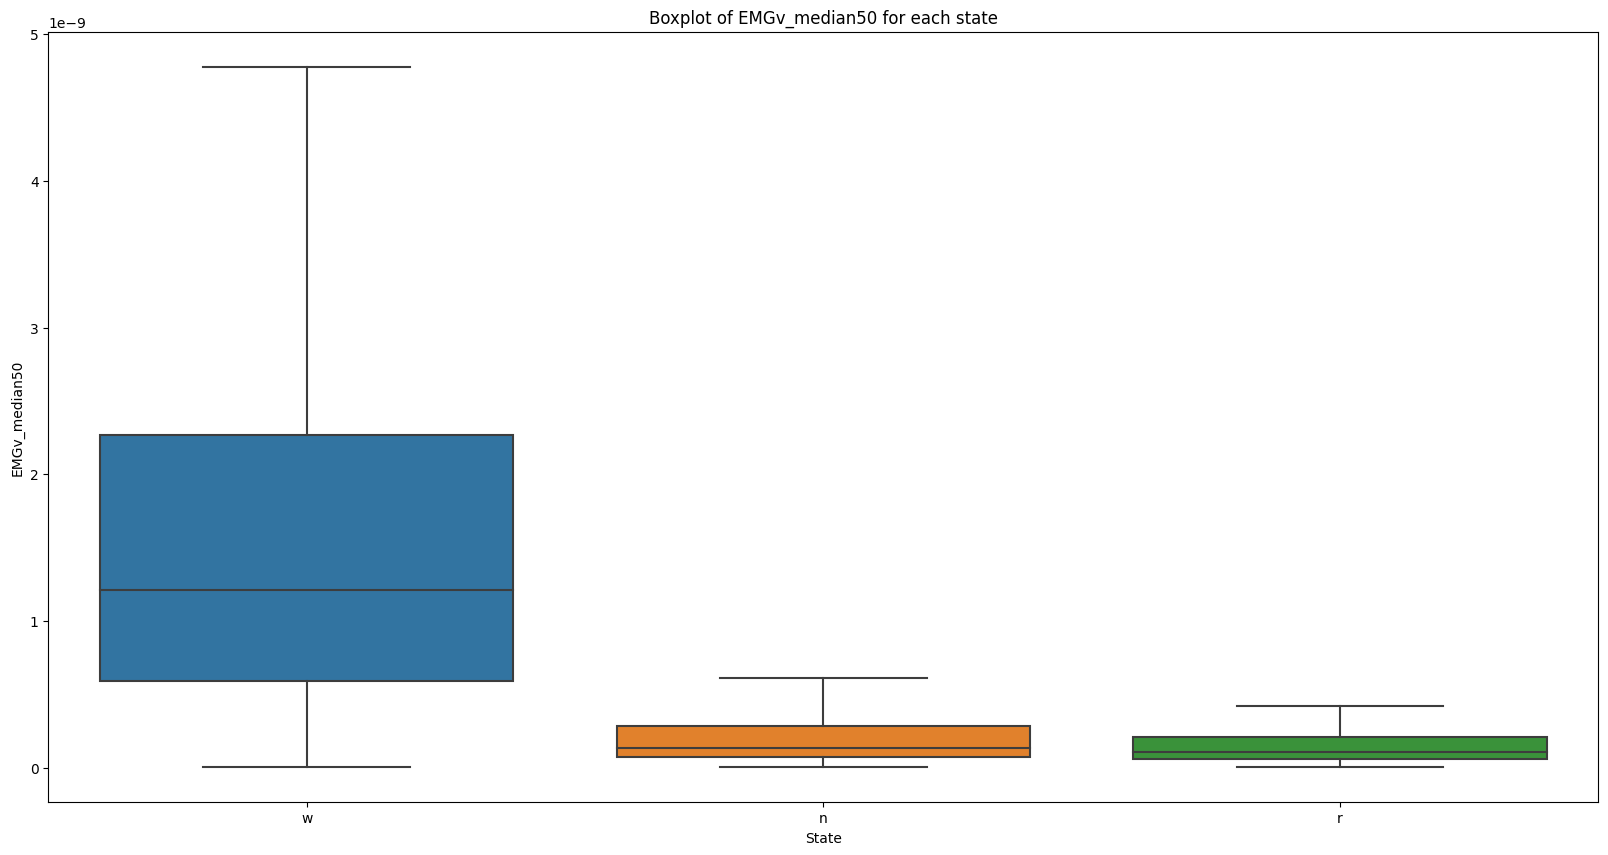

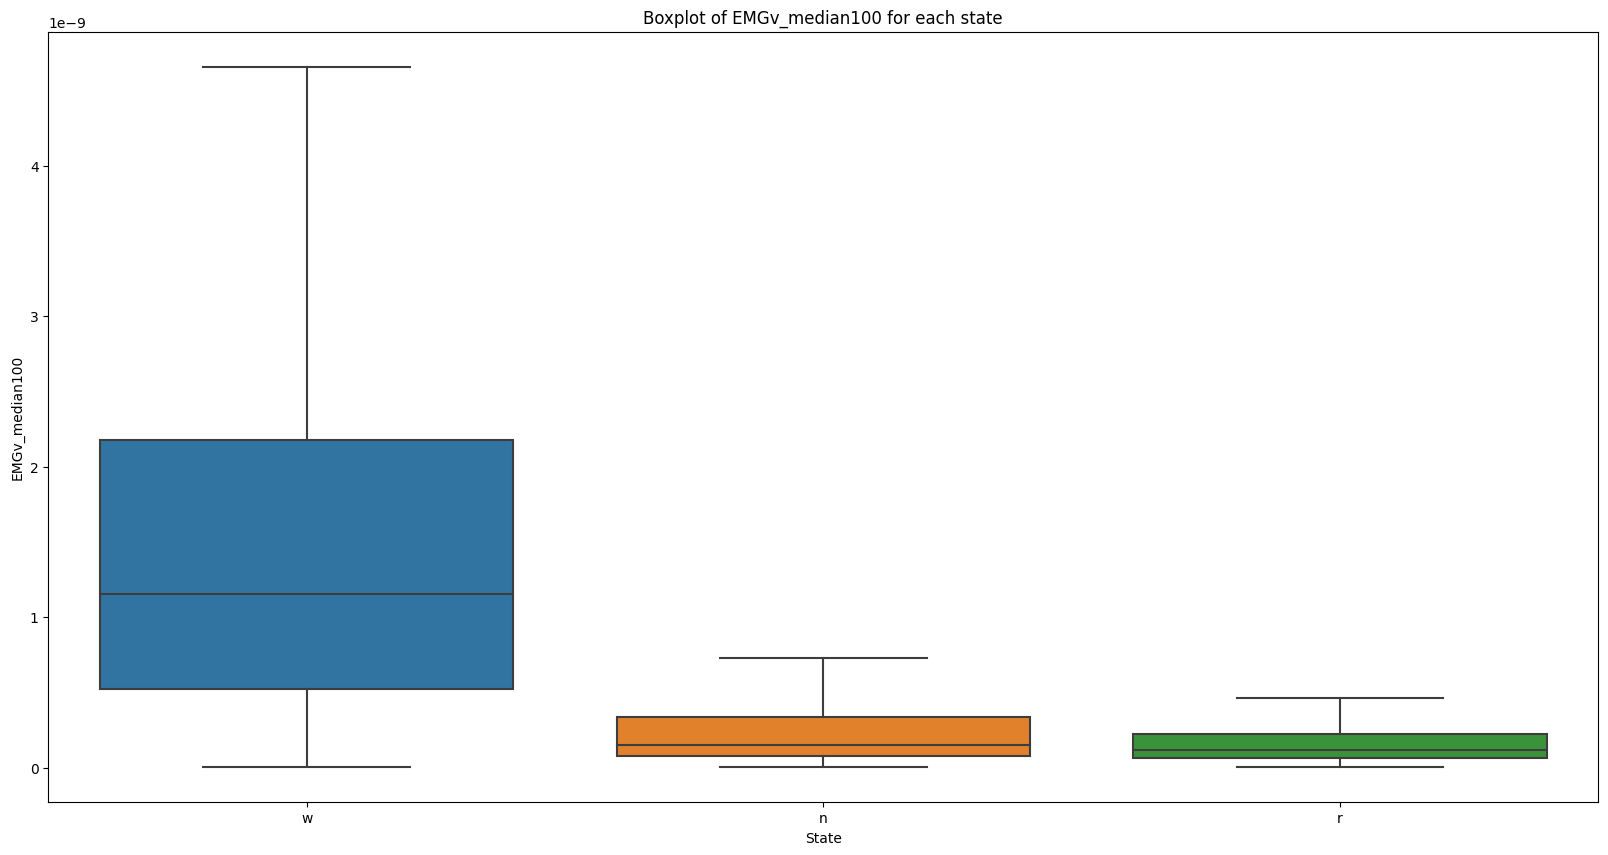

In [16]:
plot_boxplot_without_outlier('EMGv_median2')
plot_boxplot_without_outlier('EMGv_median5')
plot_boxplot_without_outlier('EMGv_median10')
plot_boxplot_without_outlier('EMGv_median20')
plot_boxplot_without_outlier('EMGv_median50')
plot_boxplot_without_outlier('EMGv_median100')

### Windows features variance

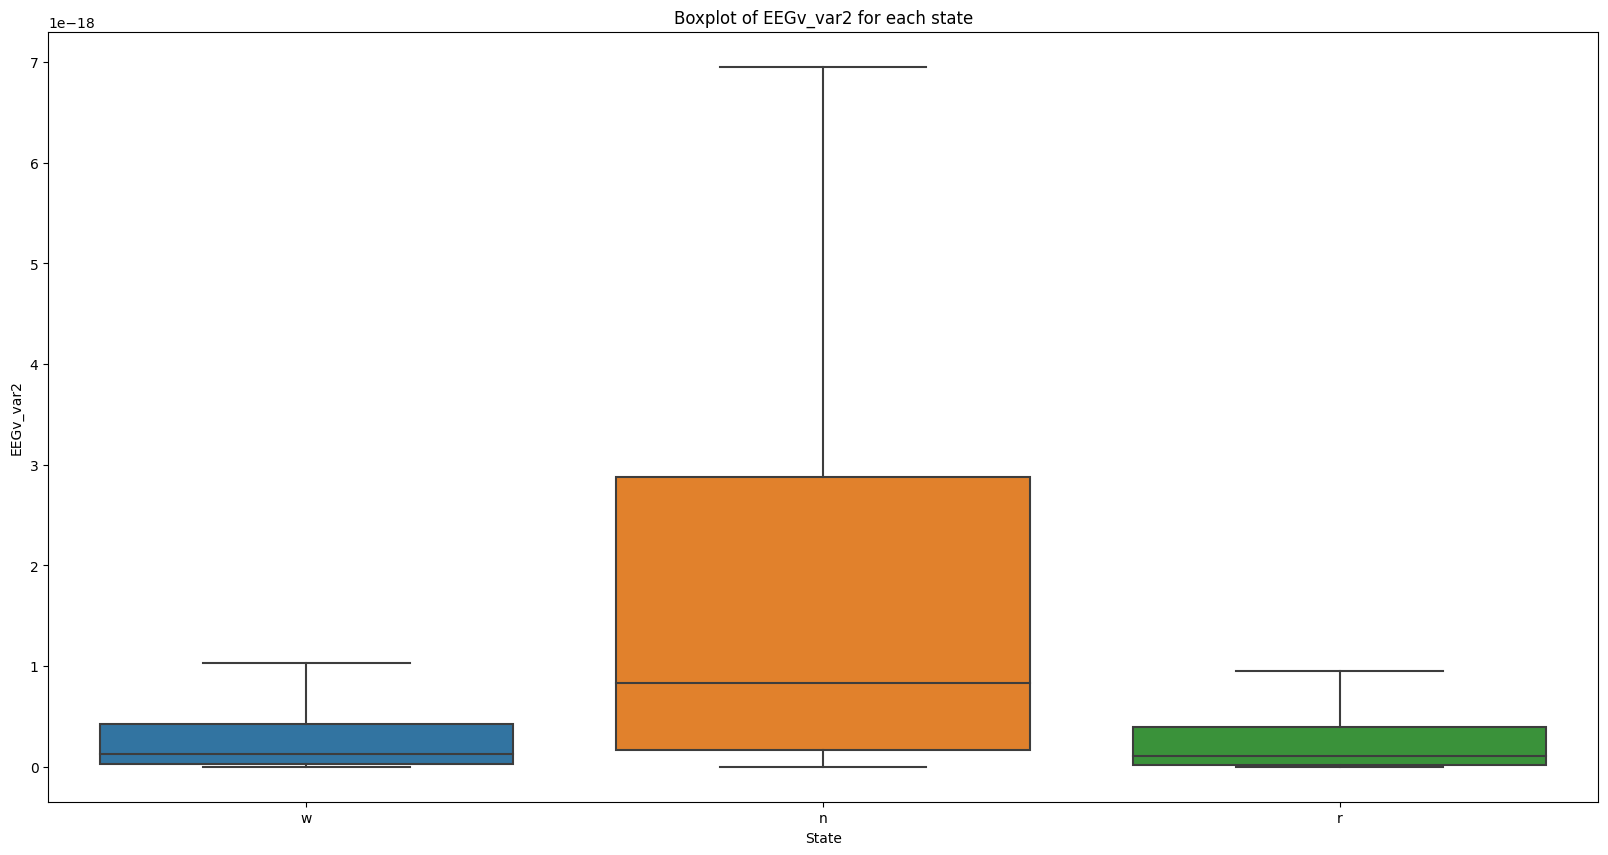

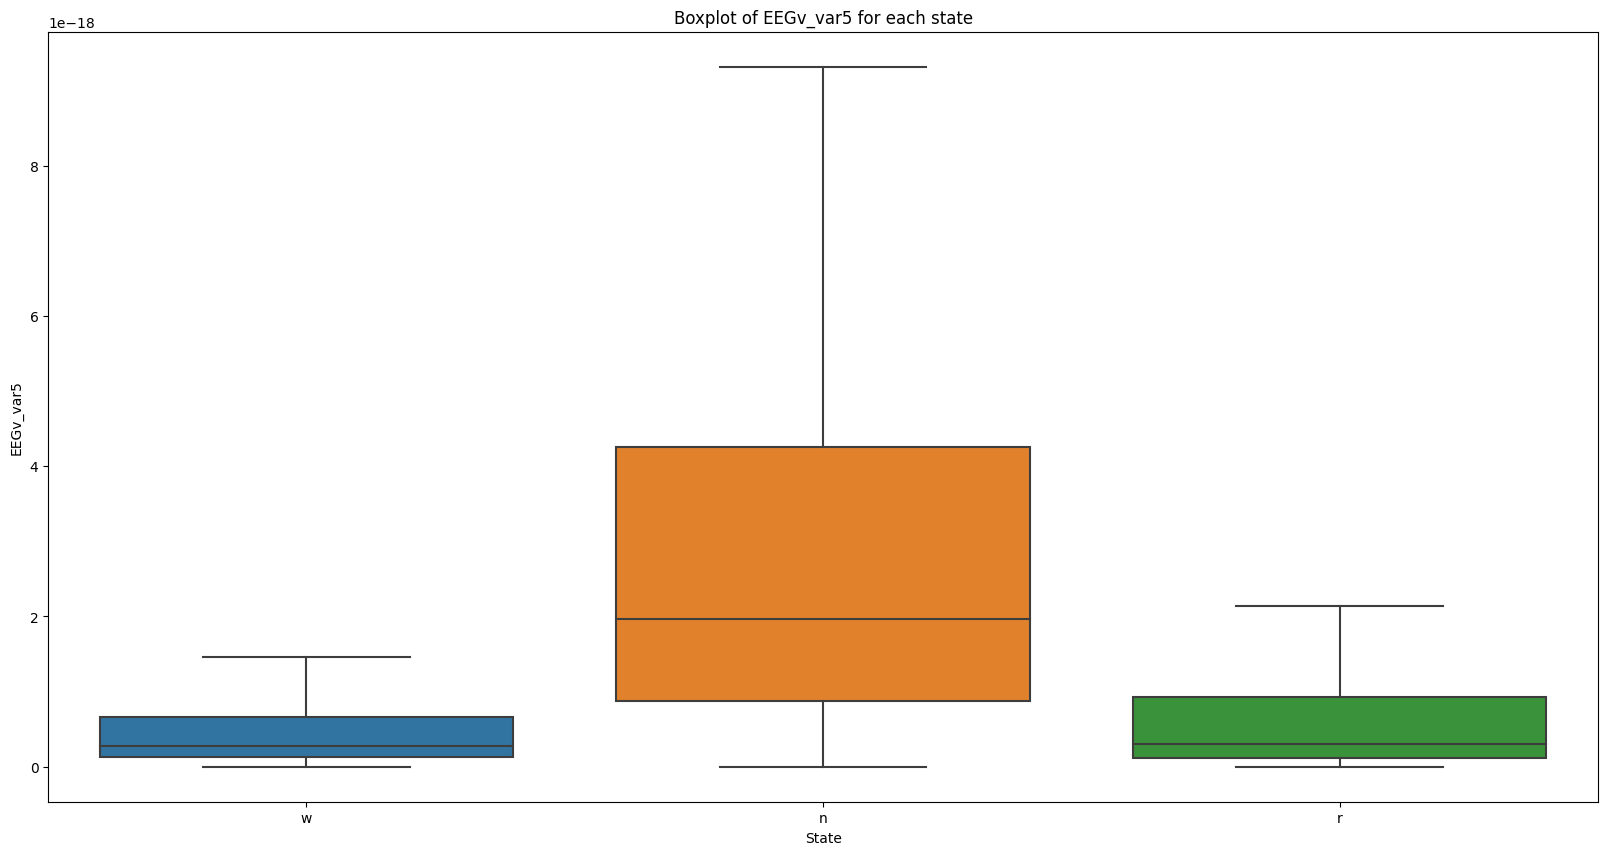

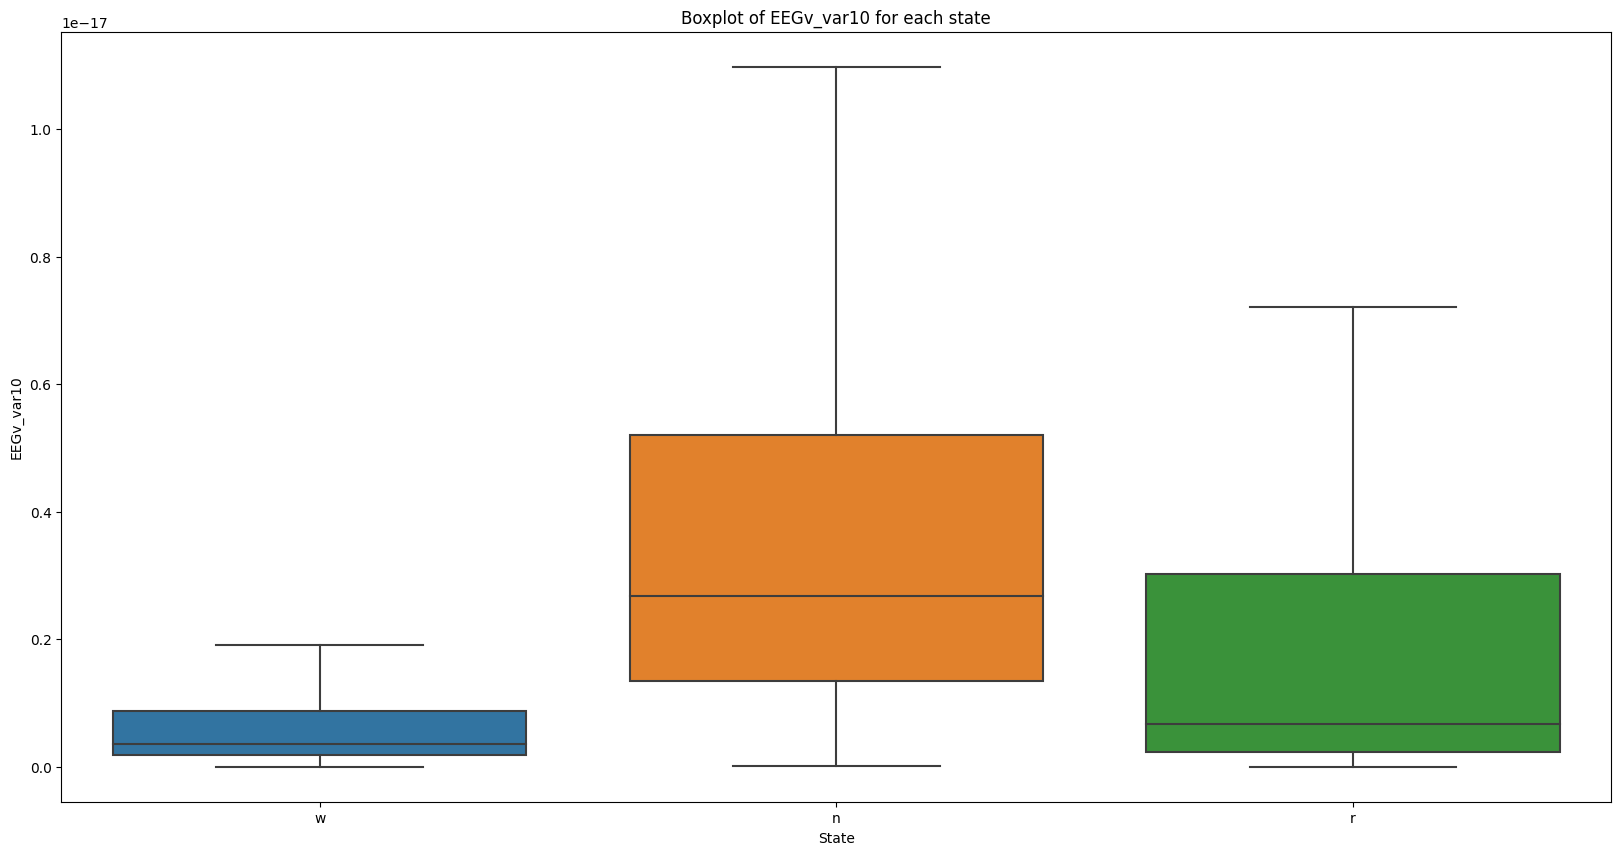

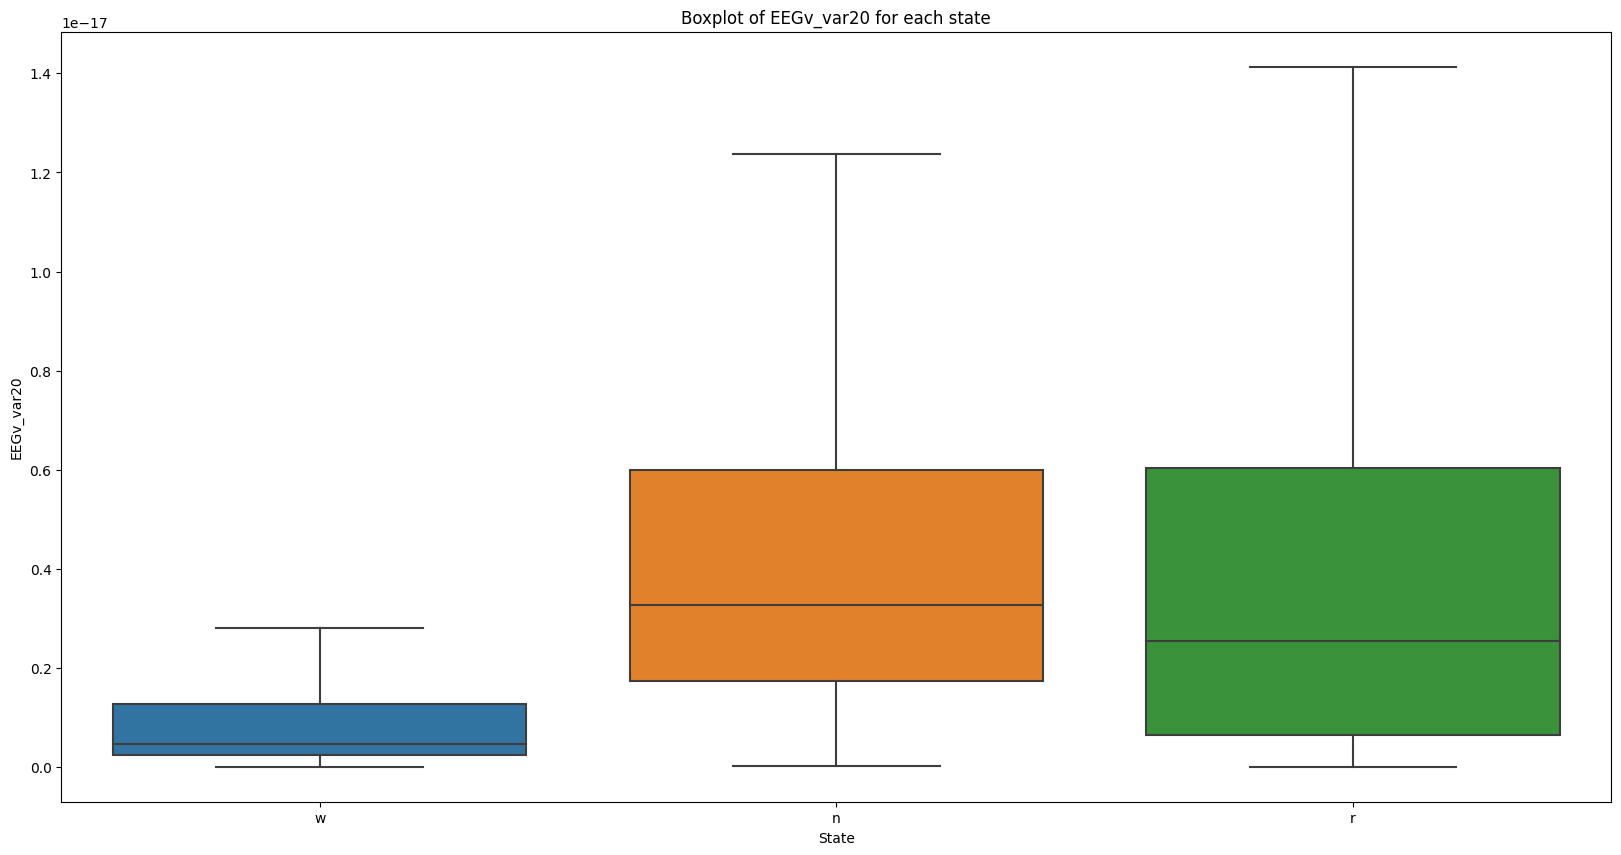

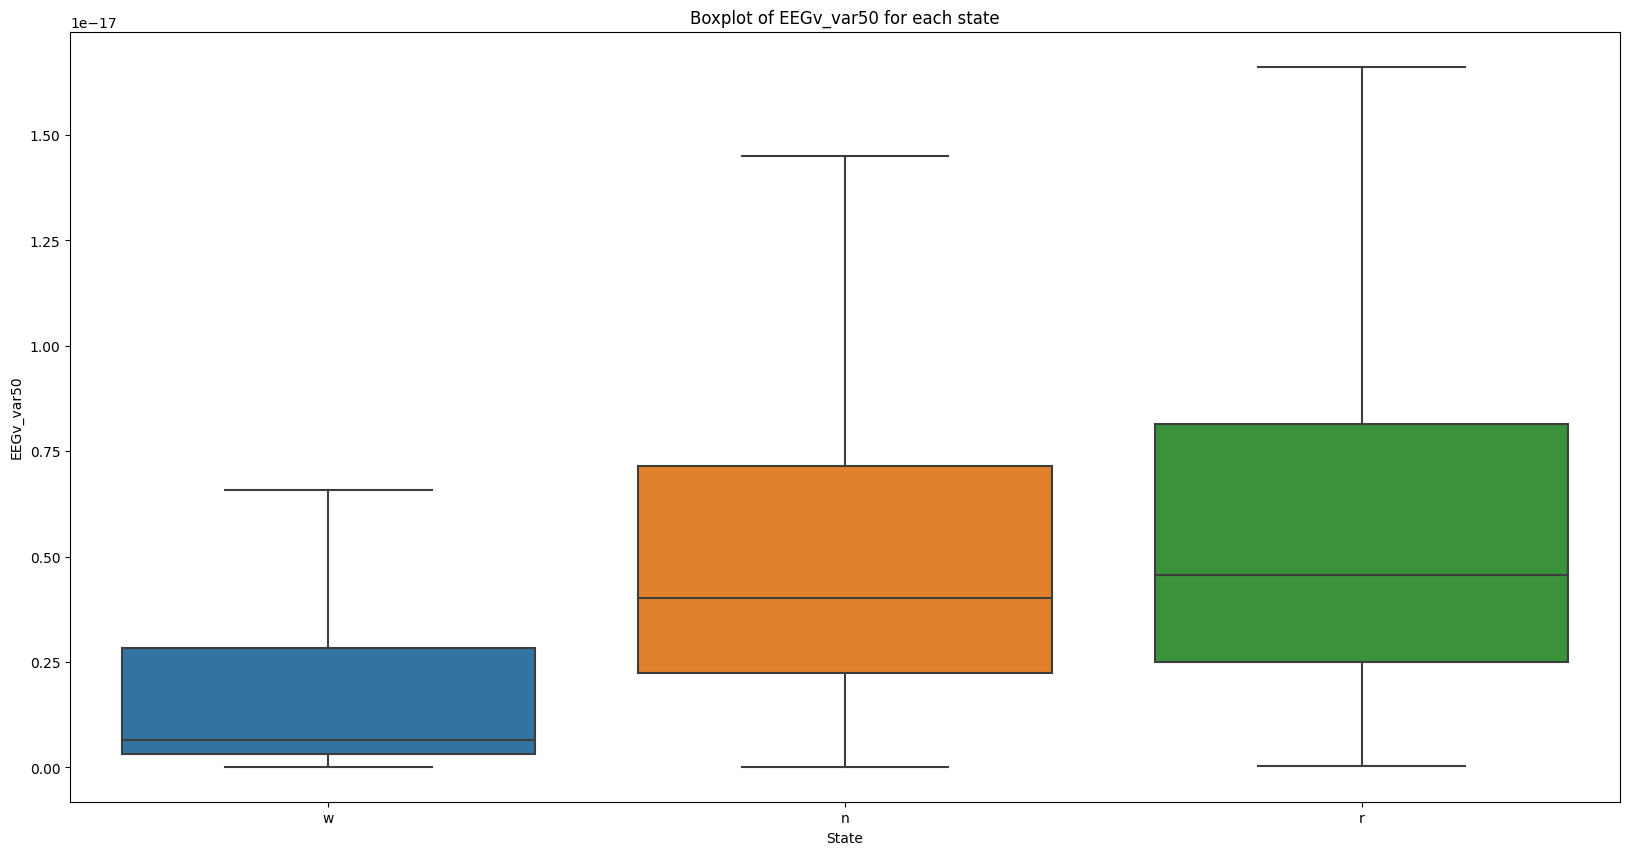

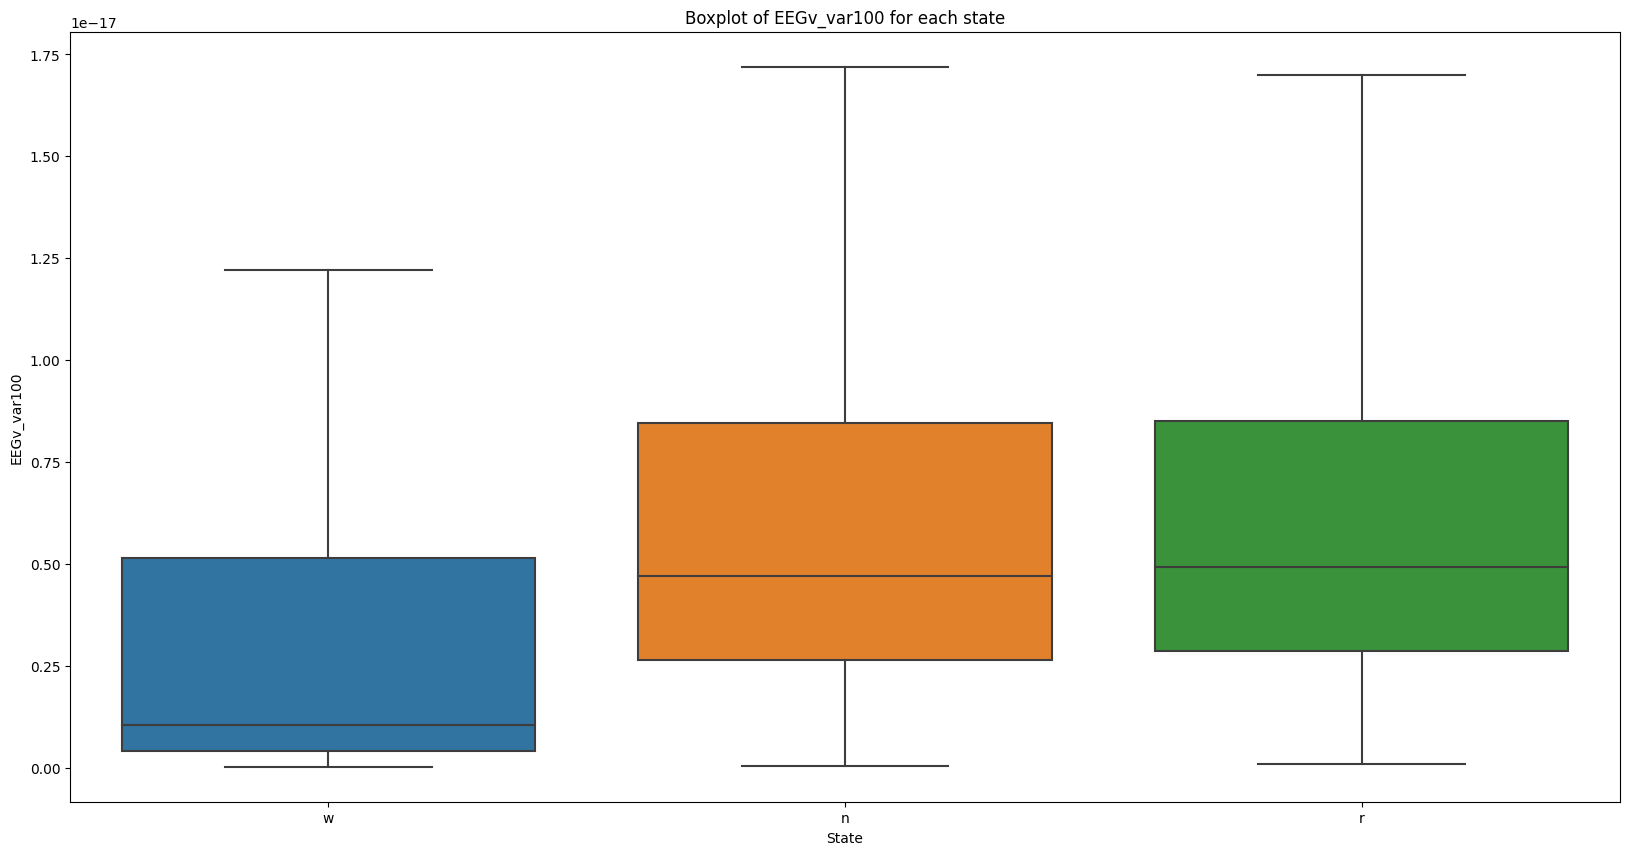

In [17]:
plot_boxplot_without_outlier('EEGv_var2')
plot_boxplot_without_outlier('EEGv_var5')
plot_boxplot_without_outlier('EEGv_var10')
plot_boxplot_without_outlier('EEGv_var20')
plot_boxplot_without_outlier('EEGv_var50')
plot_boxplot_without_outlier('EEGv_var100')

The eegv variance with a window size of 5 seems to be a good feature to study. 

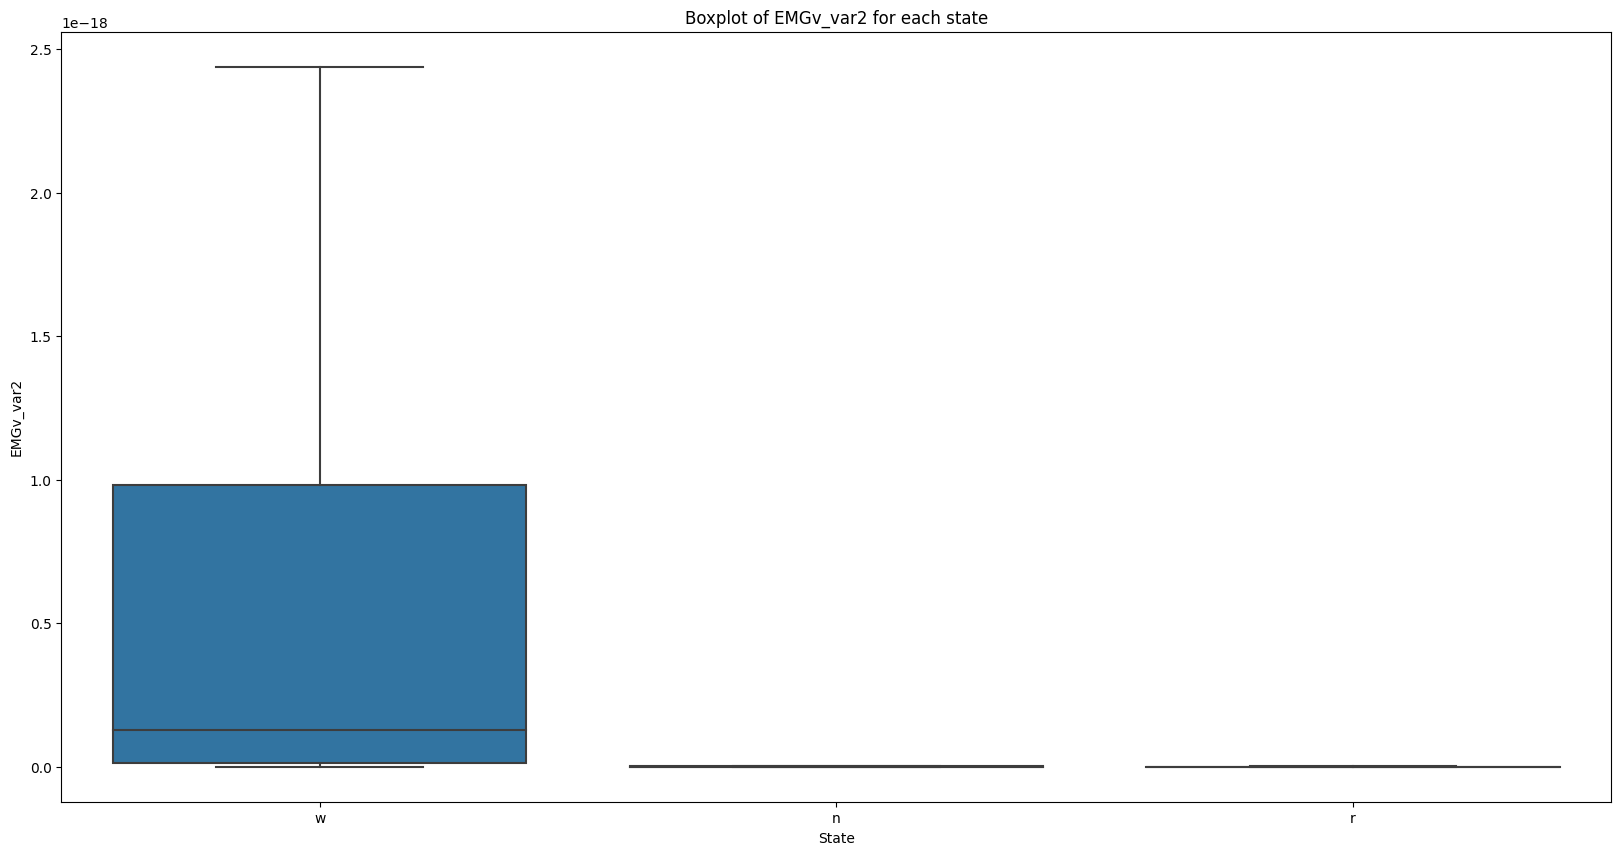

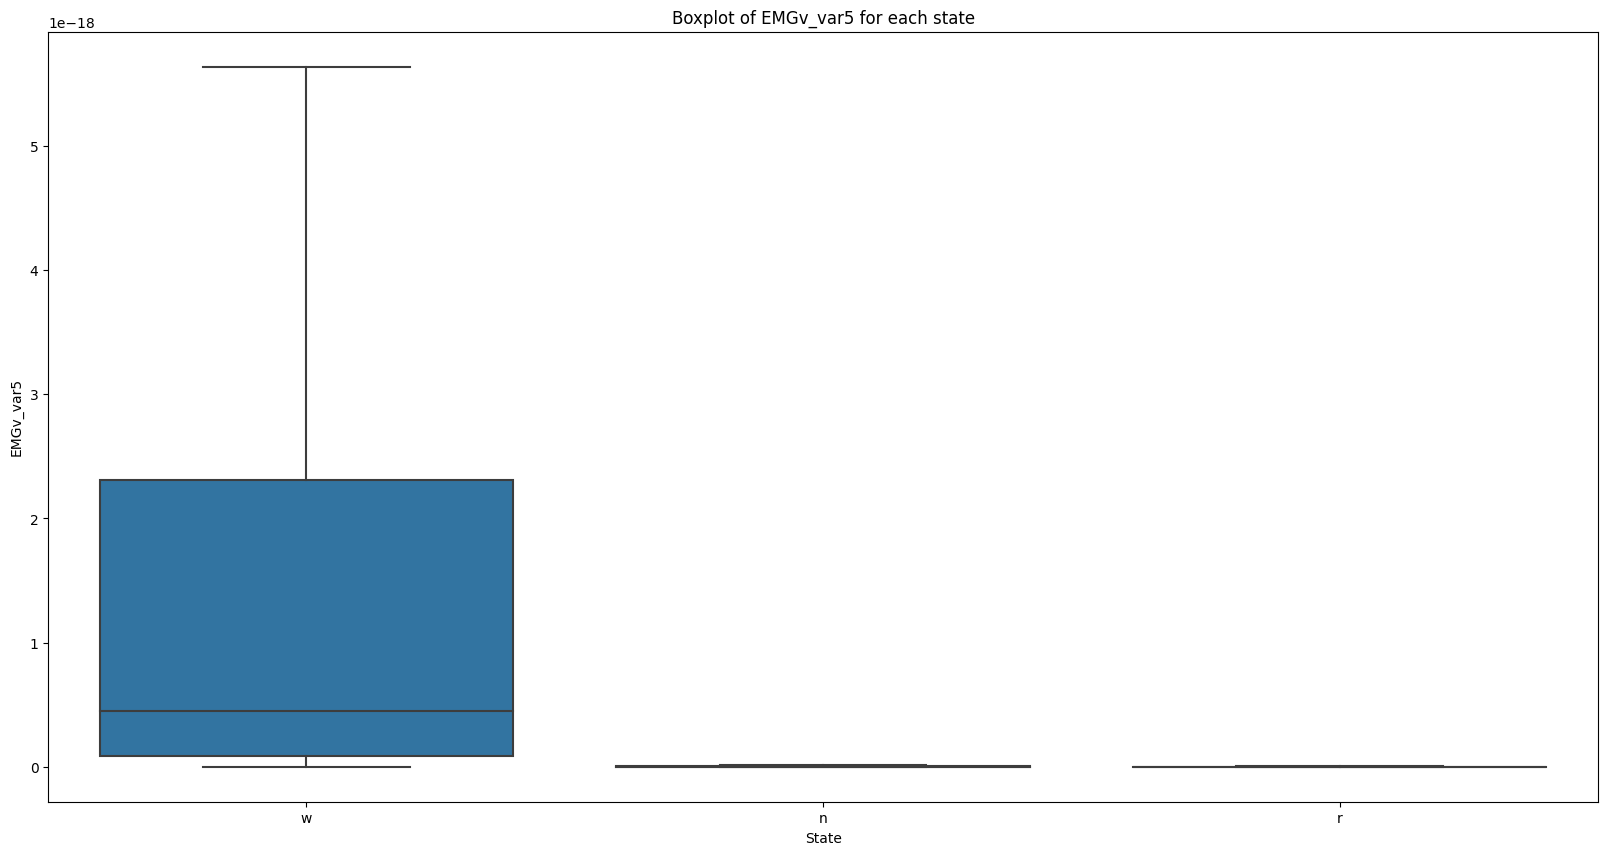

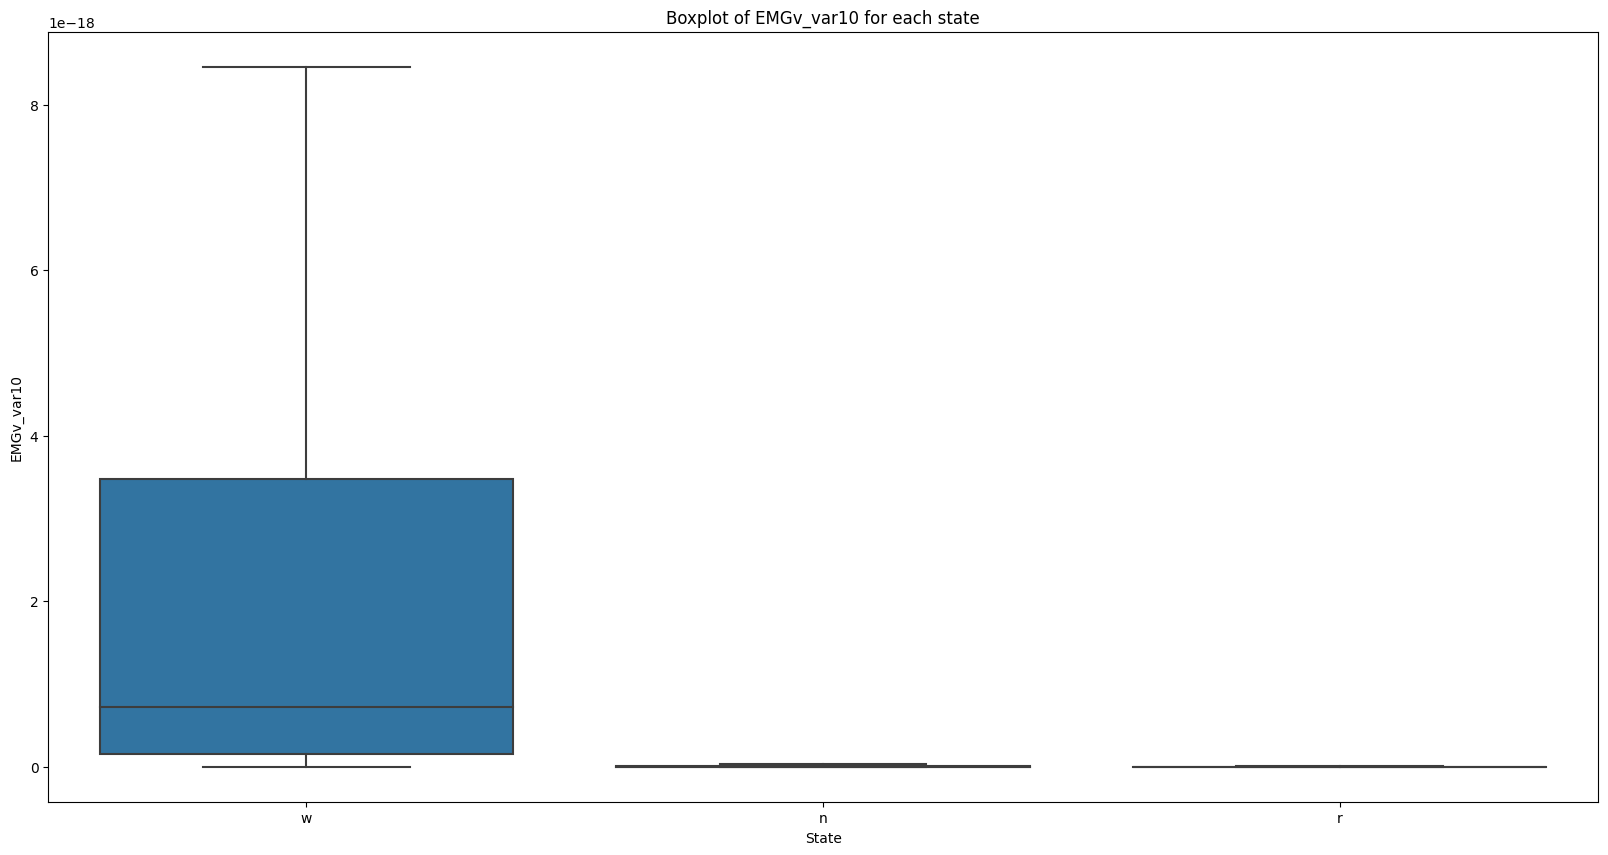

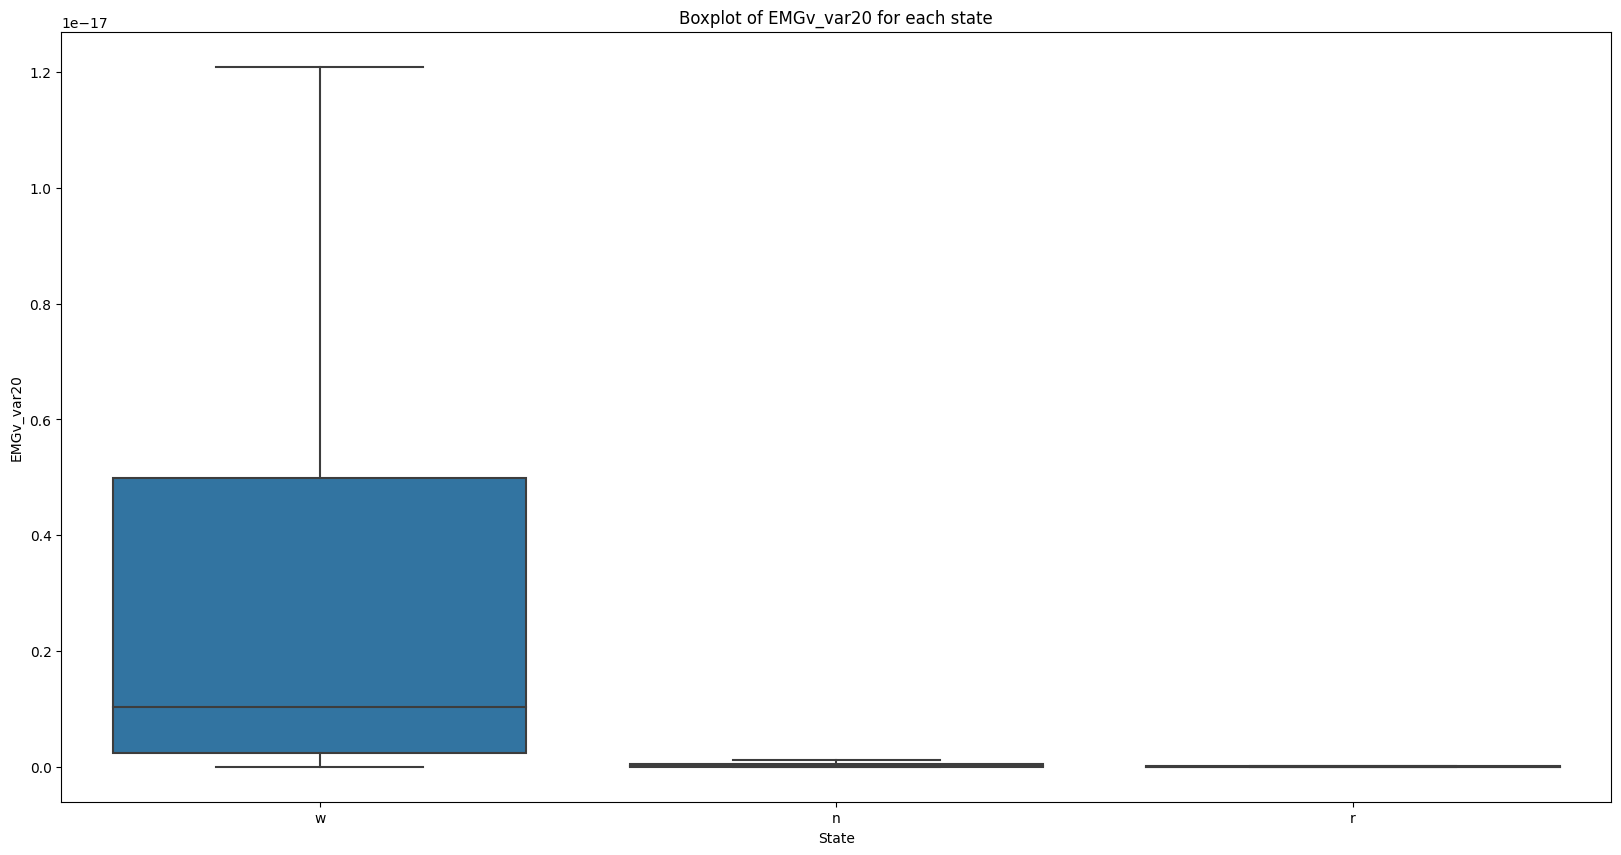

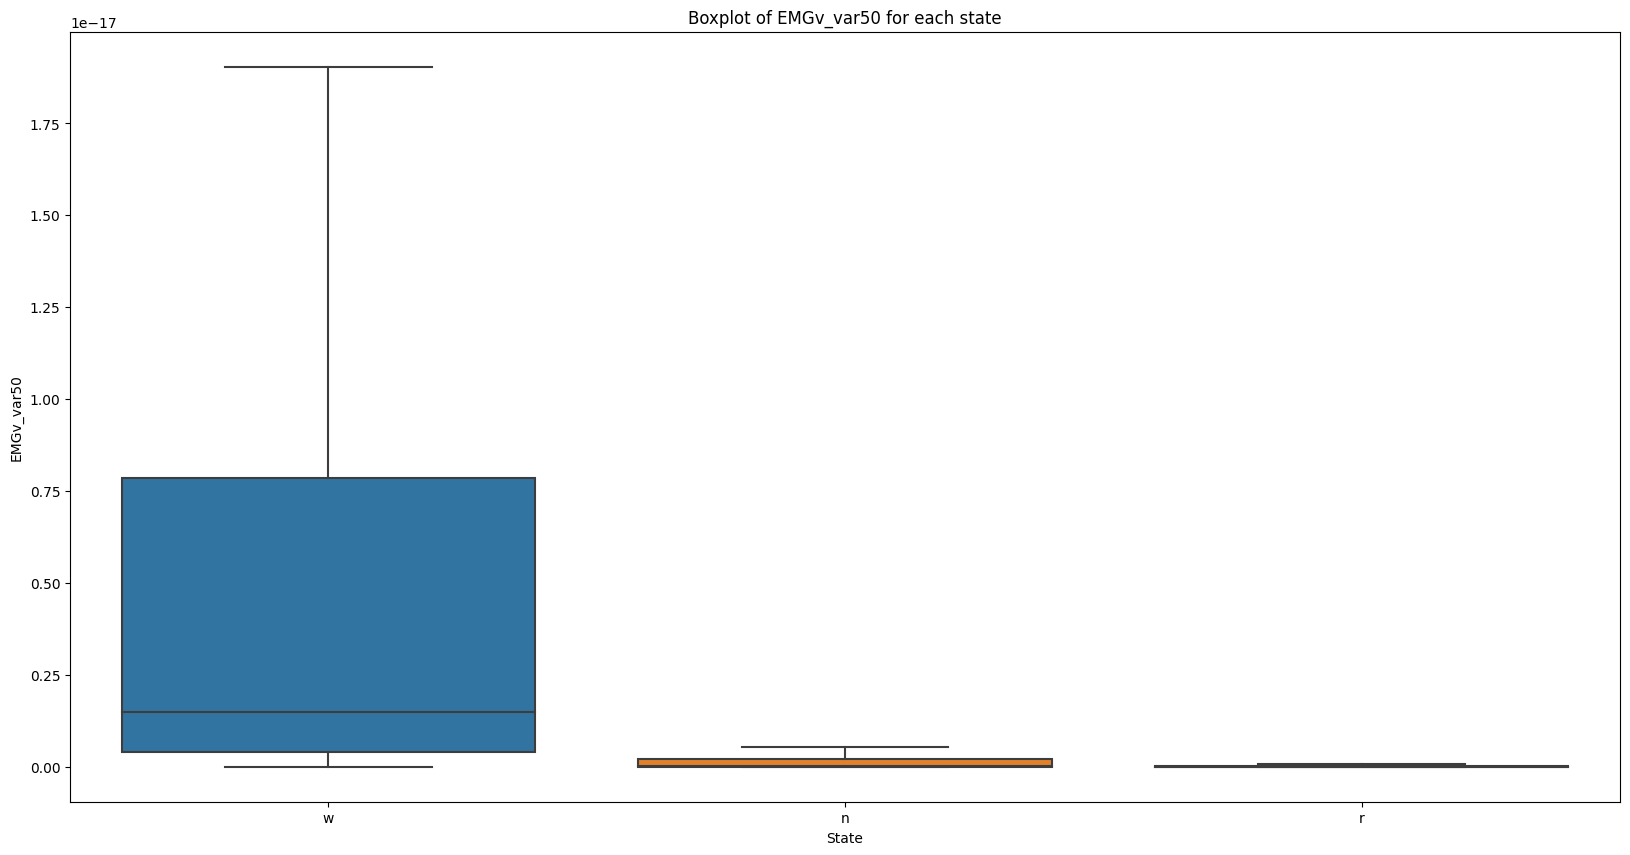

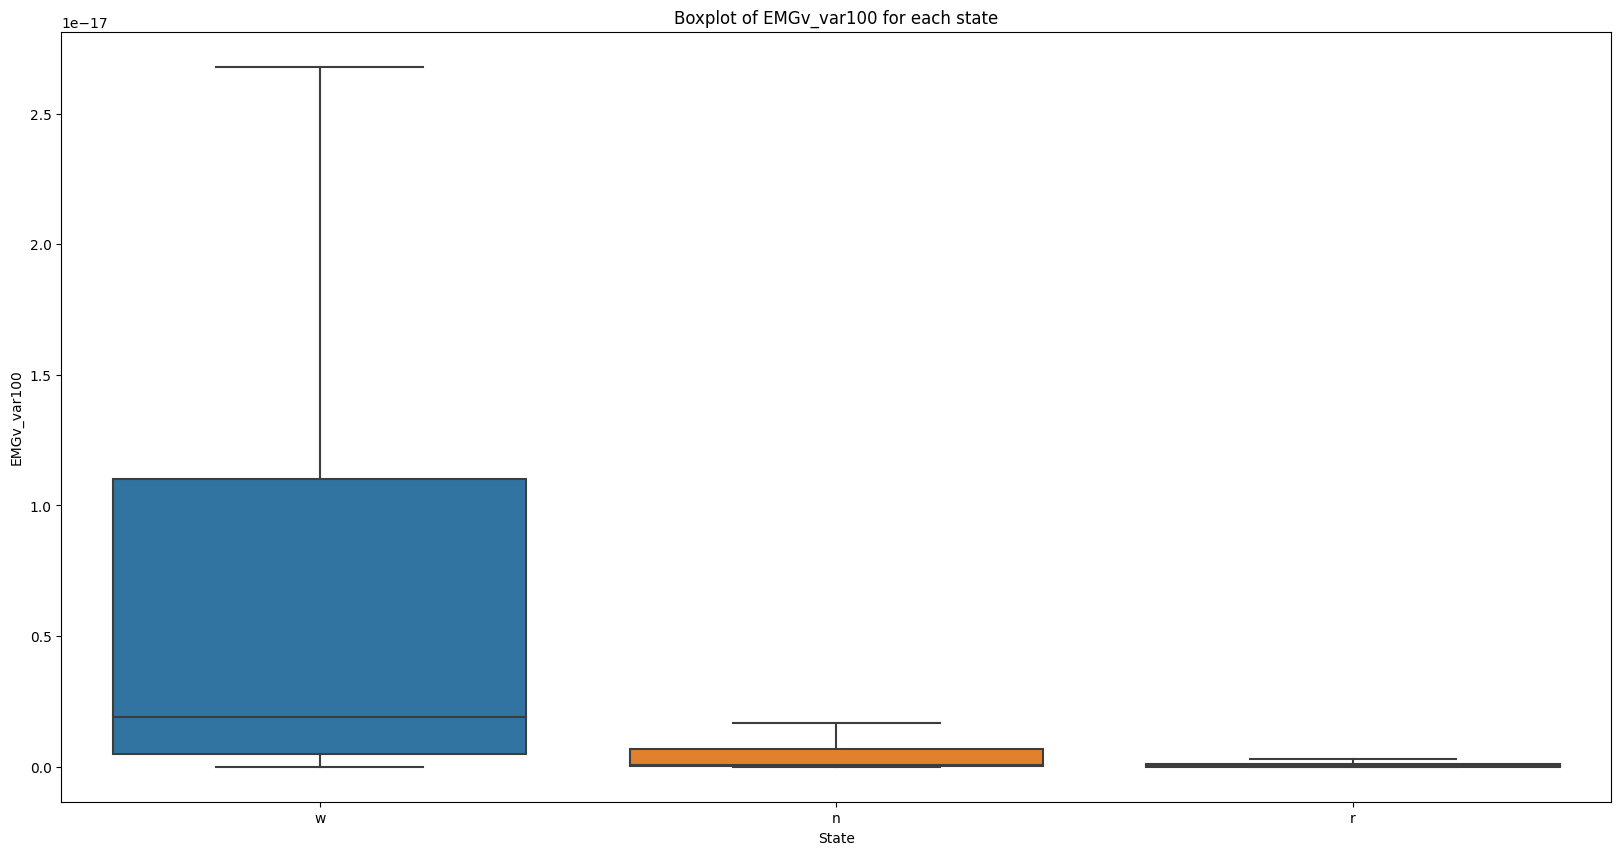

In [18]:
plot_boxplot_without_outlier('EMGv_var2')
plot_boxplot_without_outlier('EMGv_var5')
plot_boxplot_without_outlier('EMGv_var10')
plot_boxplot_without_outlier('EMGv_var20')
plot_boxplot_without_outlier('EMGv_var50')
plot_boxplot_without_outlier('EMGv_var100')

### windows features min and max

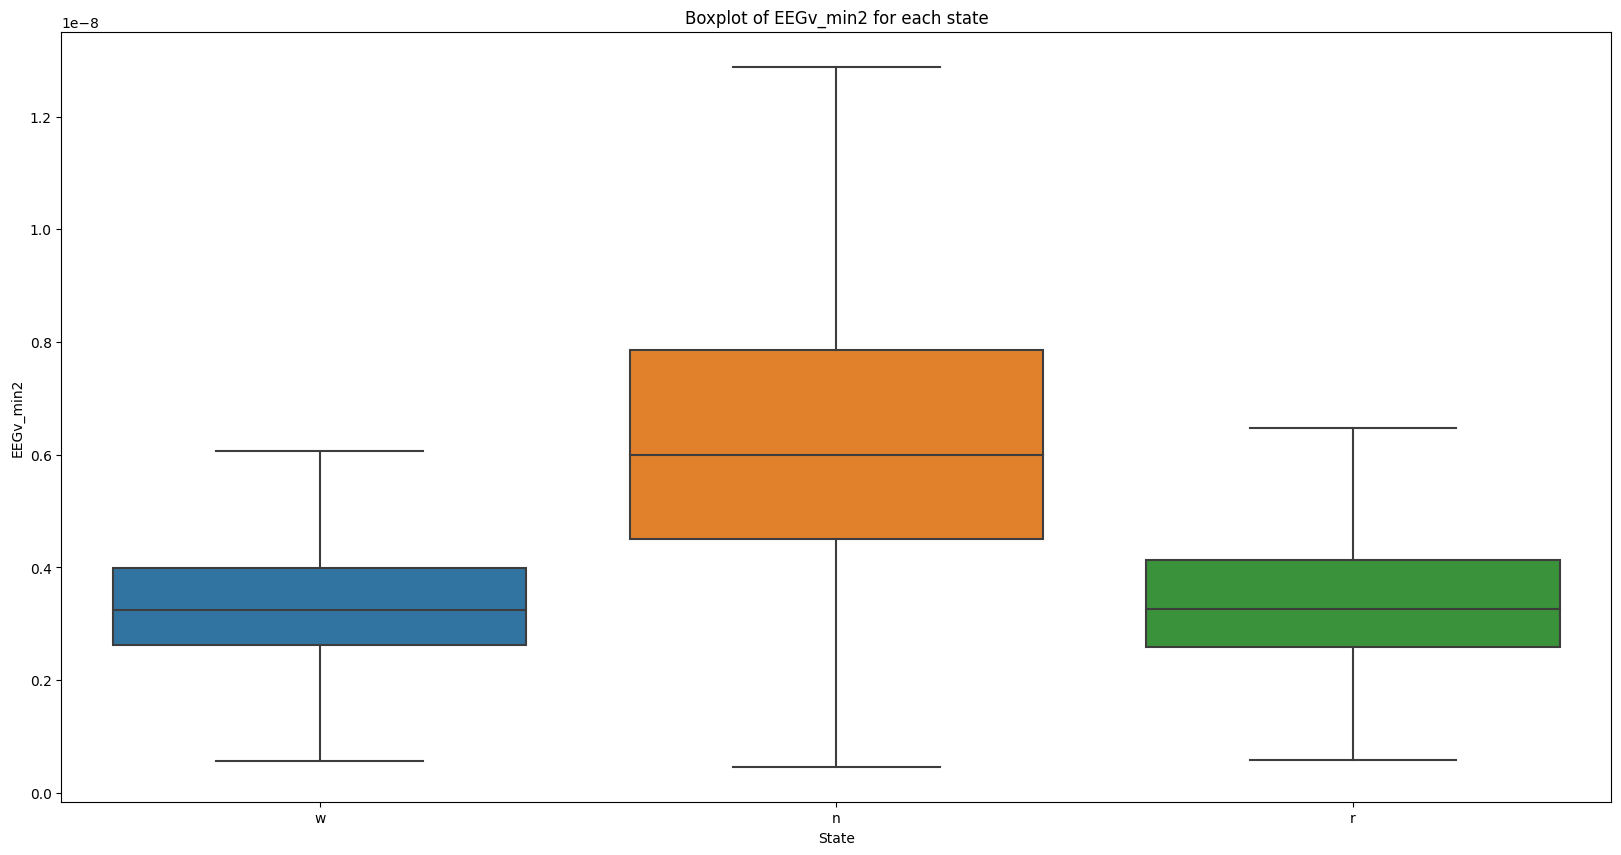

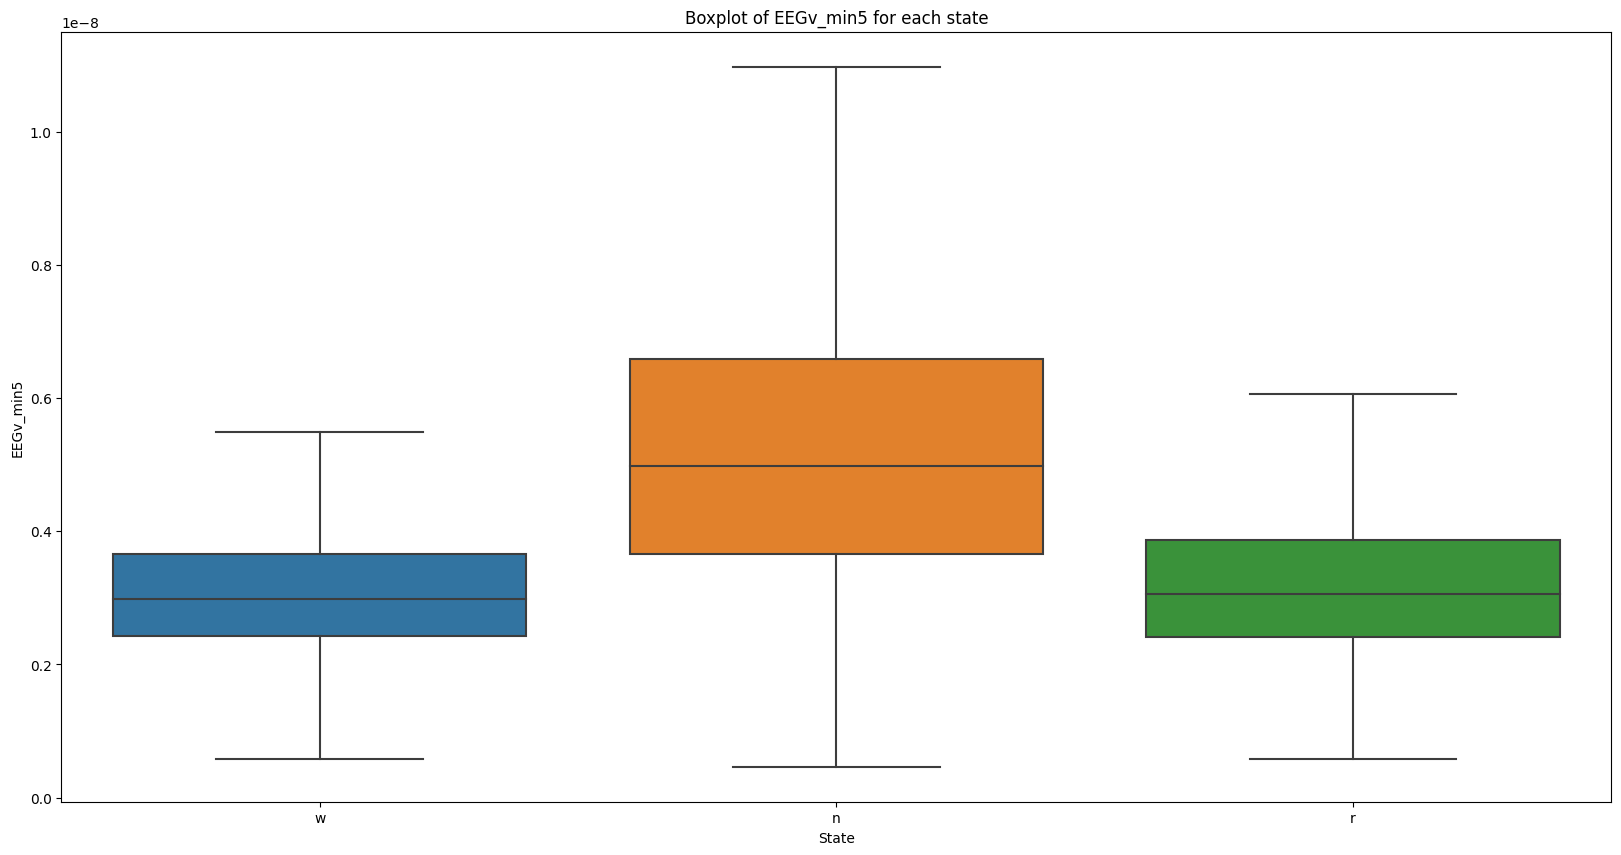

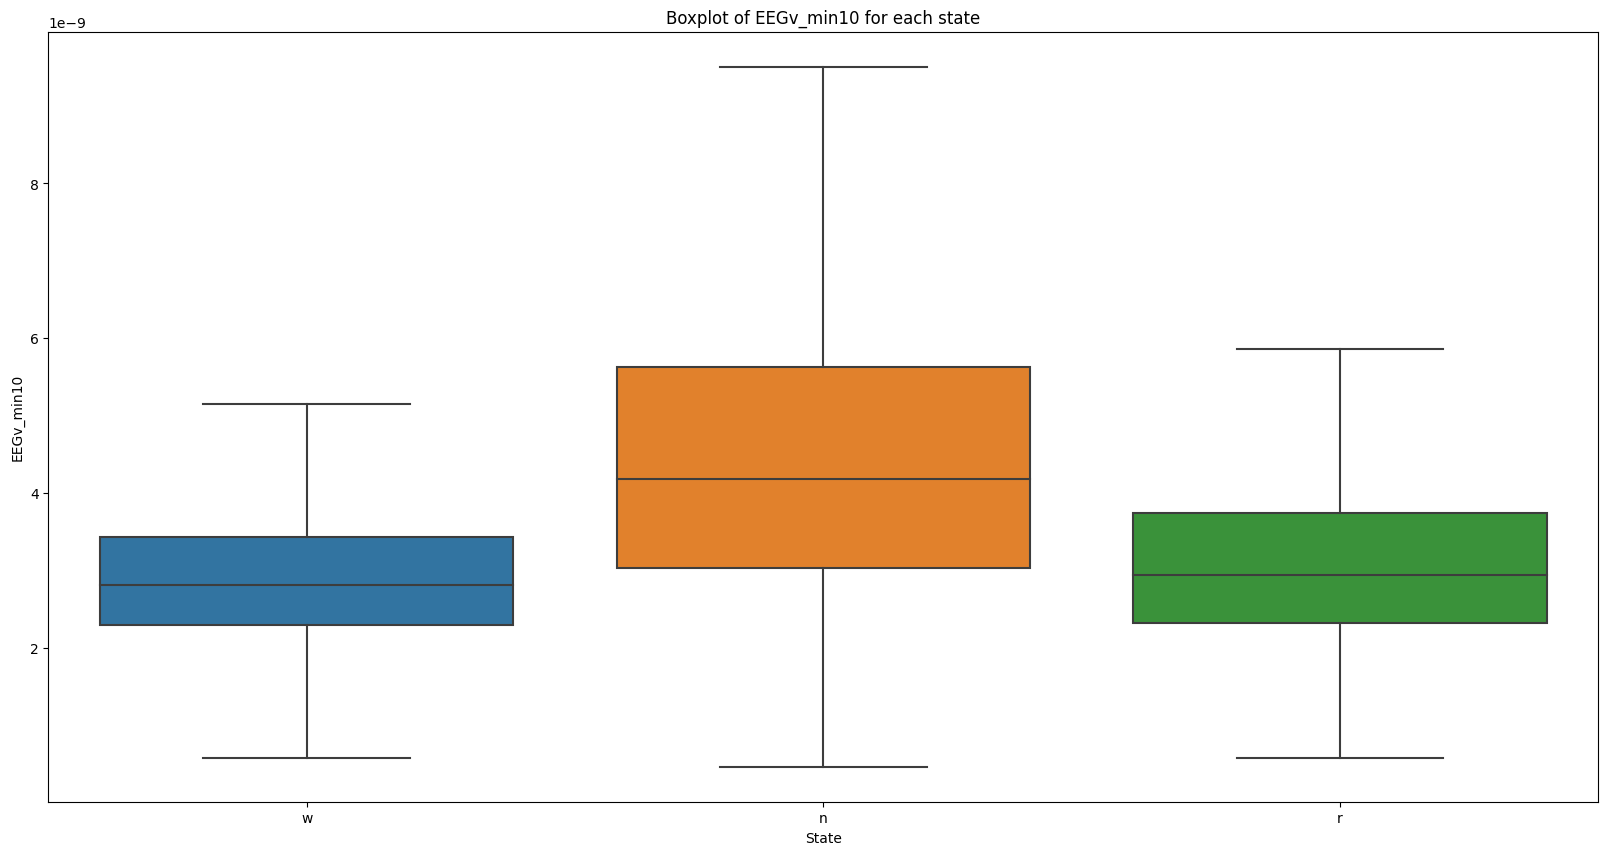

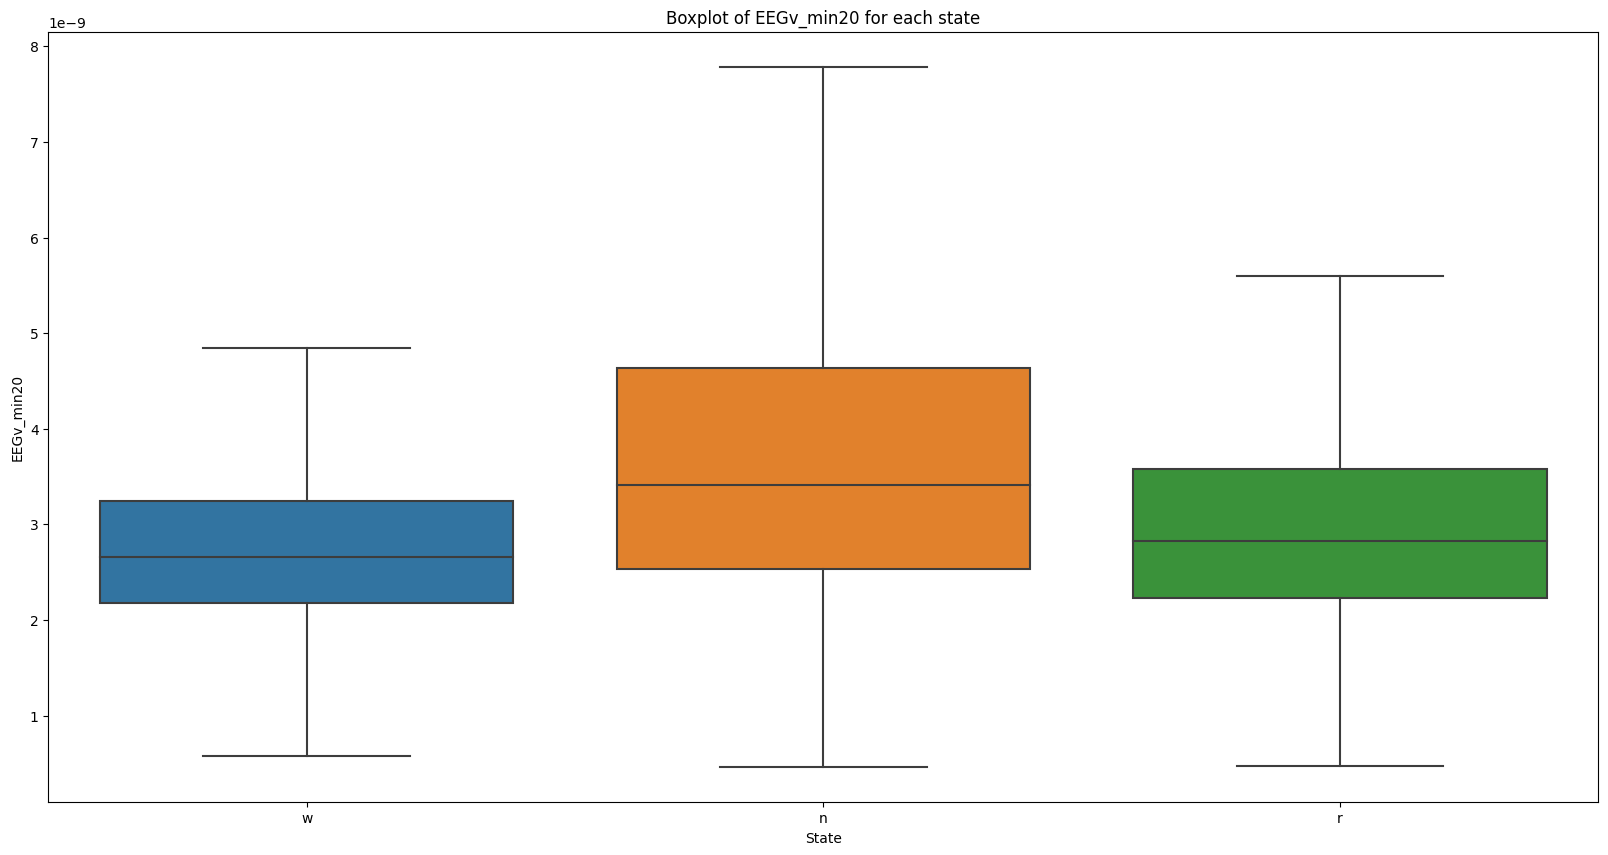

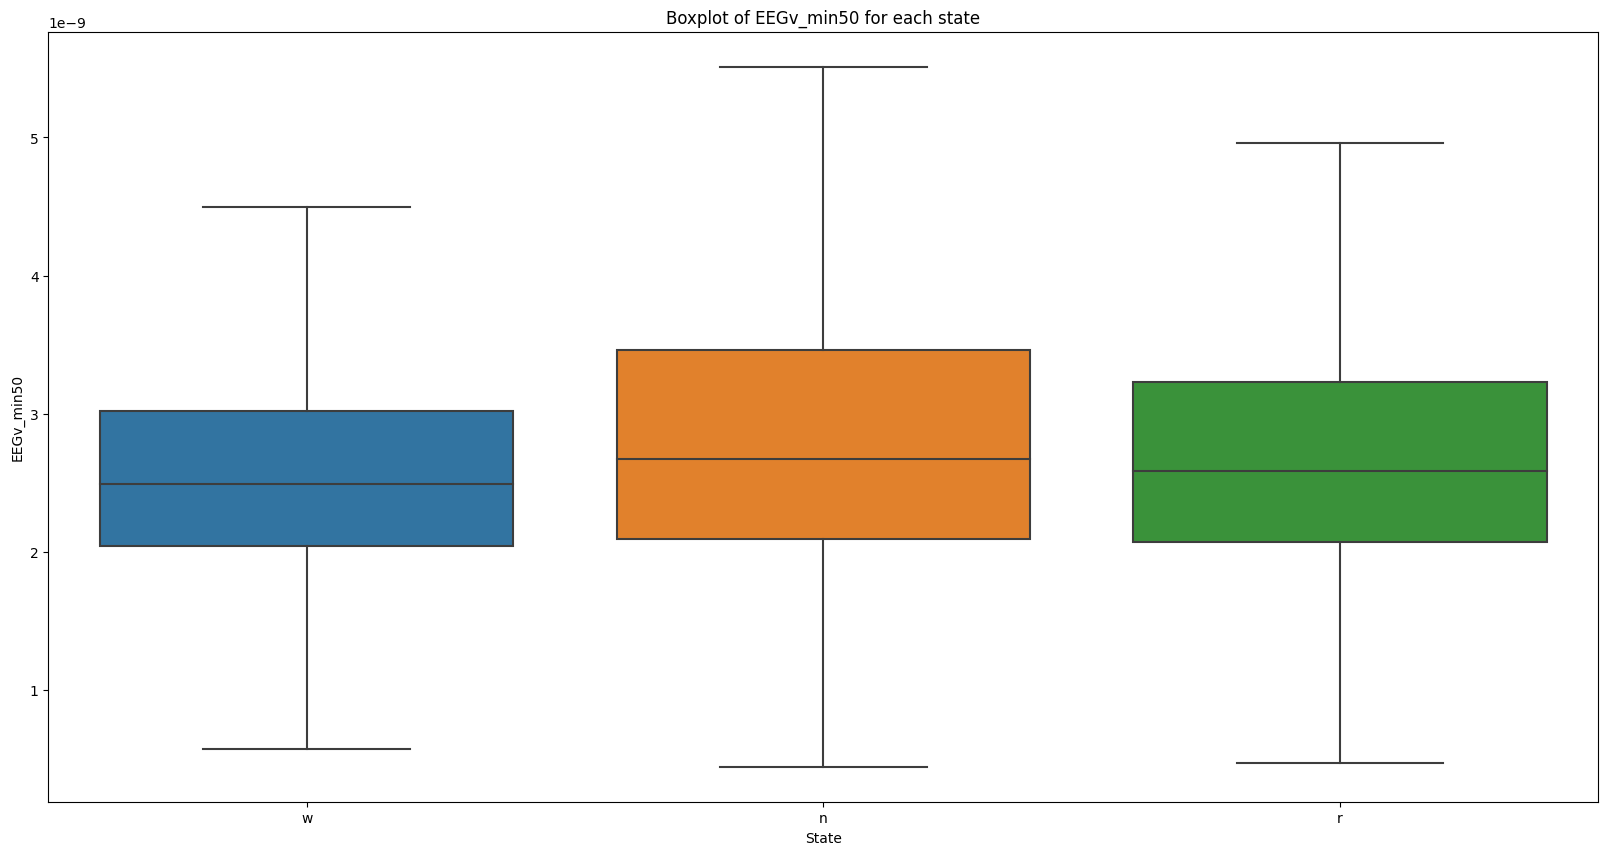

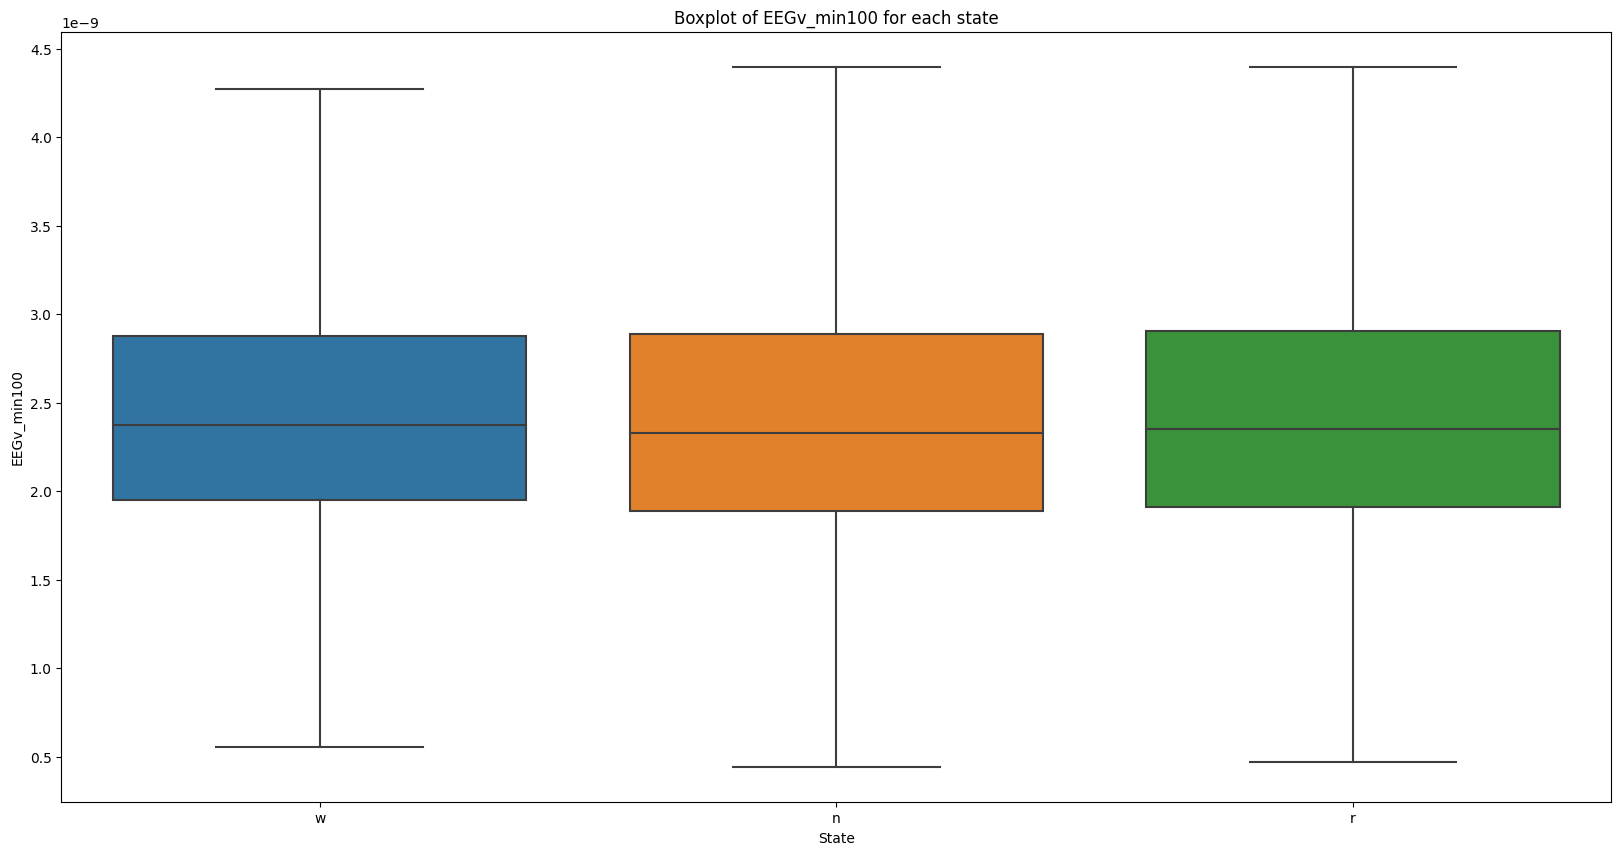

In [19]:
plot_boxplot_without_outlier('EEGv_min2')
plot_boxplot_without_outlier('EEGv_min5')
plot_boxplot_without_outlier('EEGv_min10')
plot_boxplot_without_outlier('EEGv_min20')
plot_boxplot_without_outlier('EEGv_min50')
plot_boxplot_without_outlier('EEGv_min100')

EEGv min 2 is the more interesting

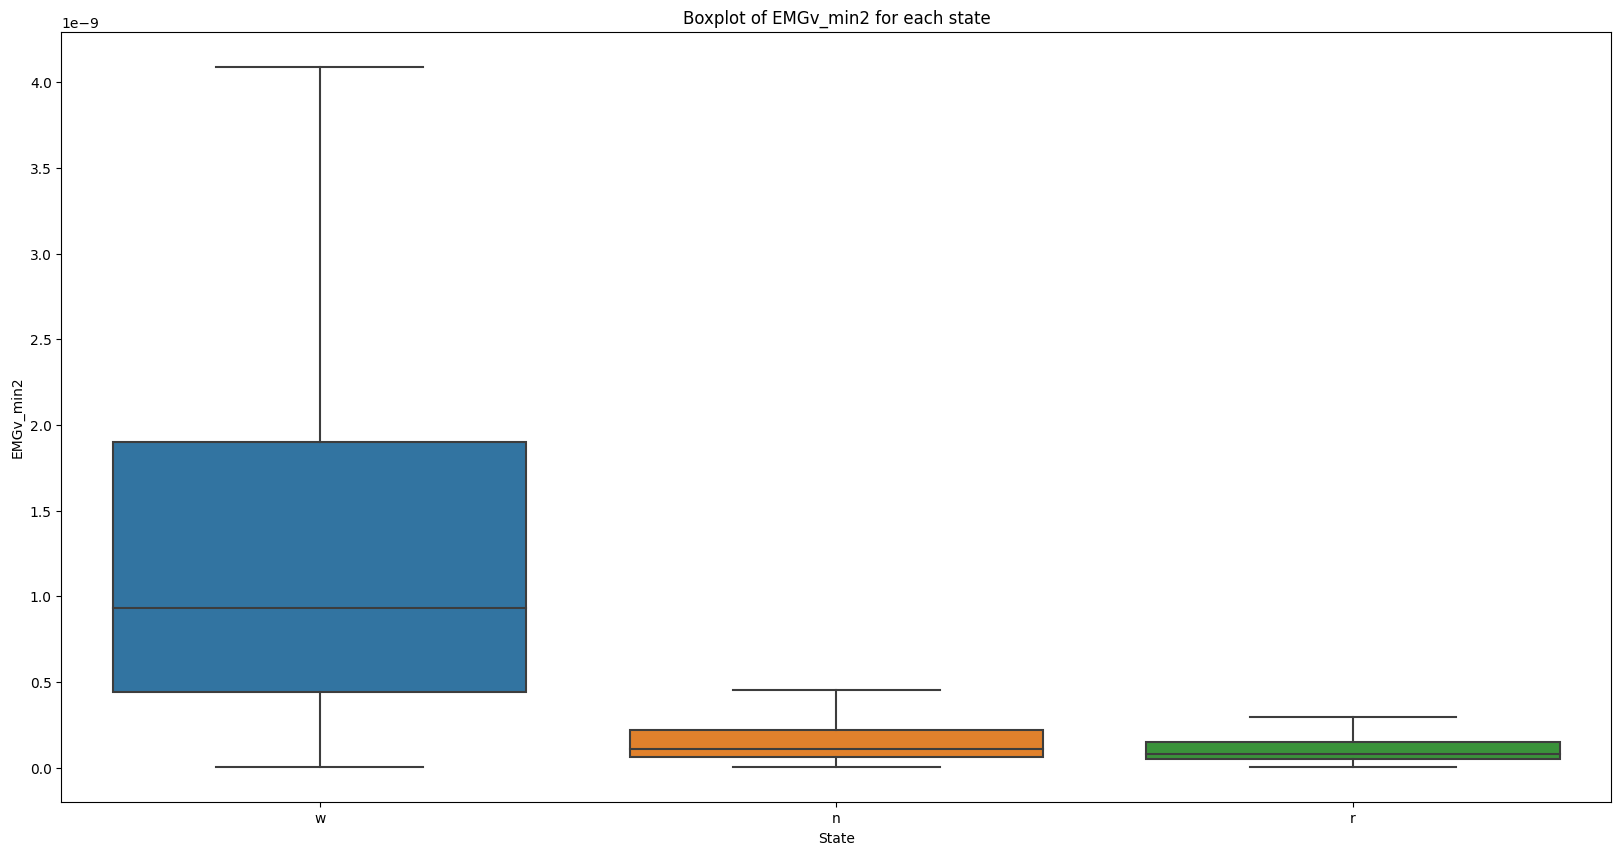

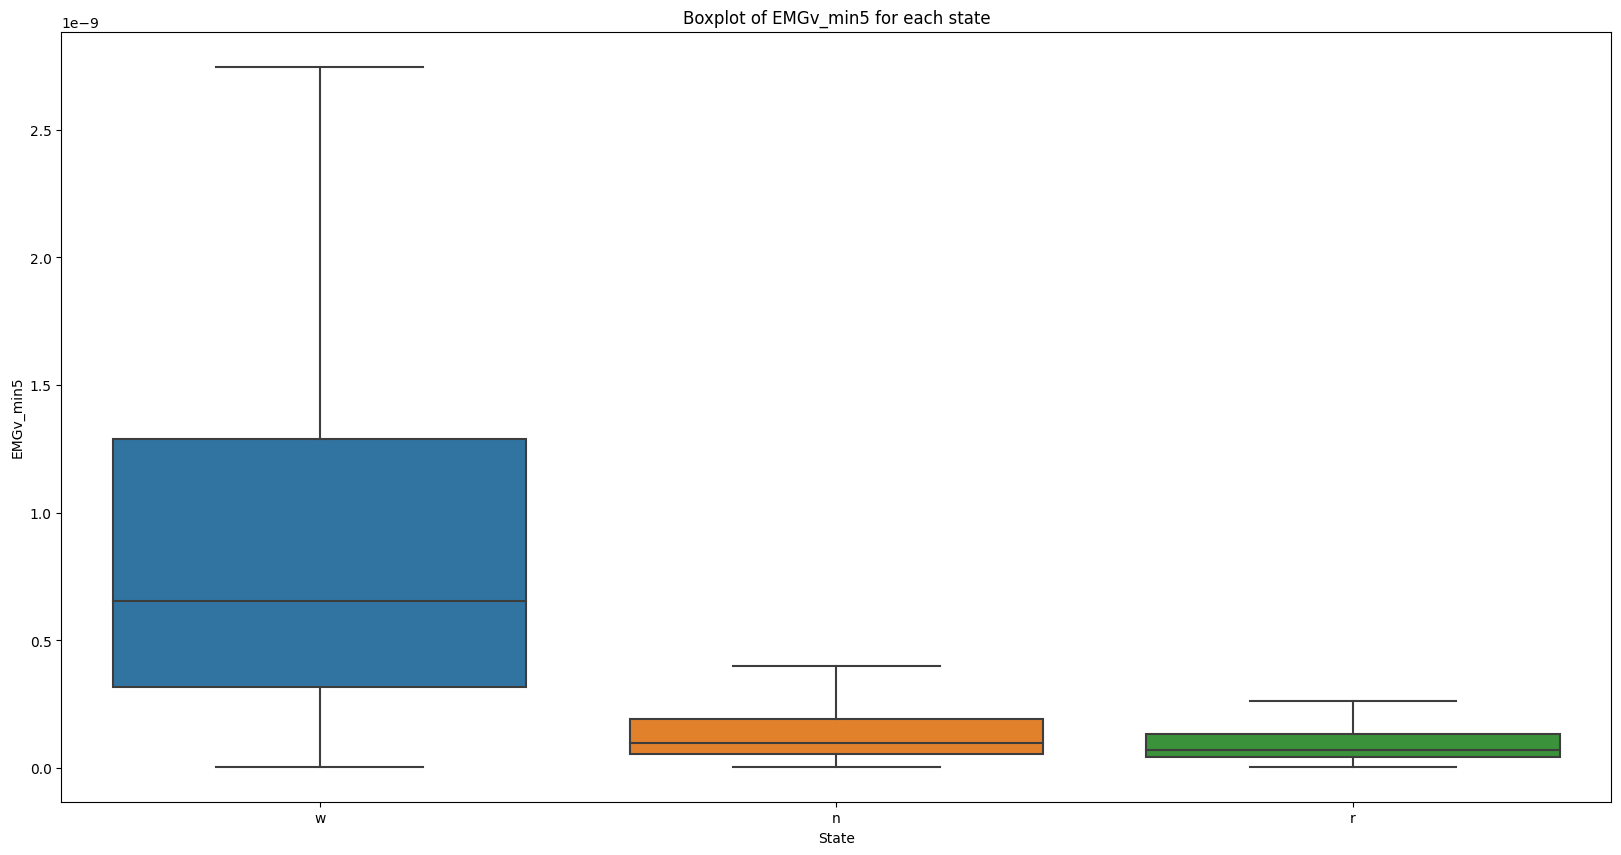

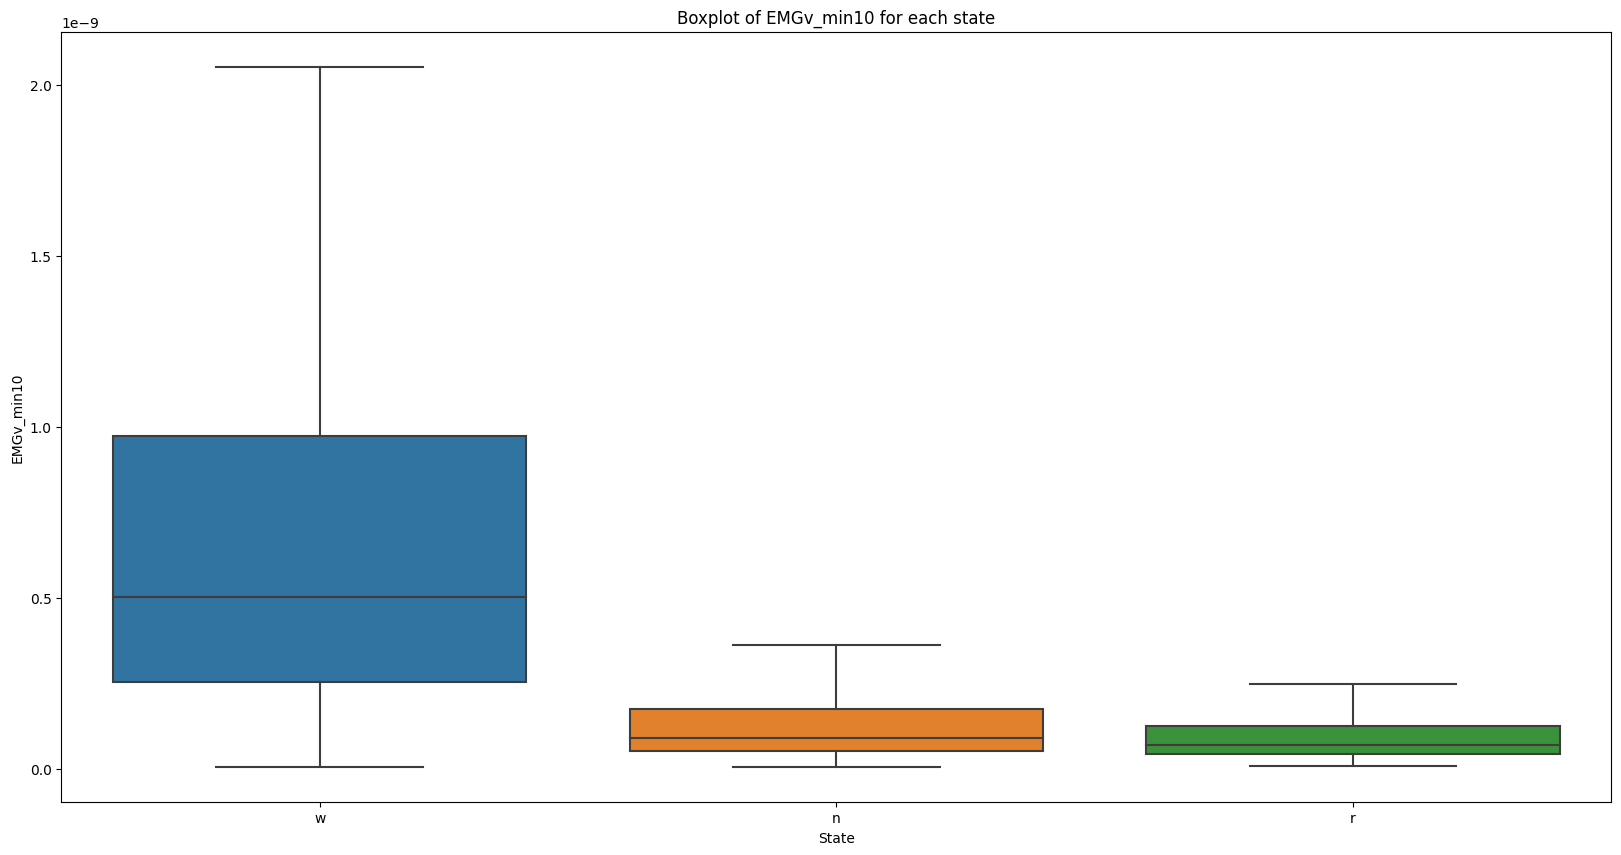

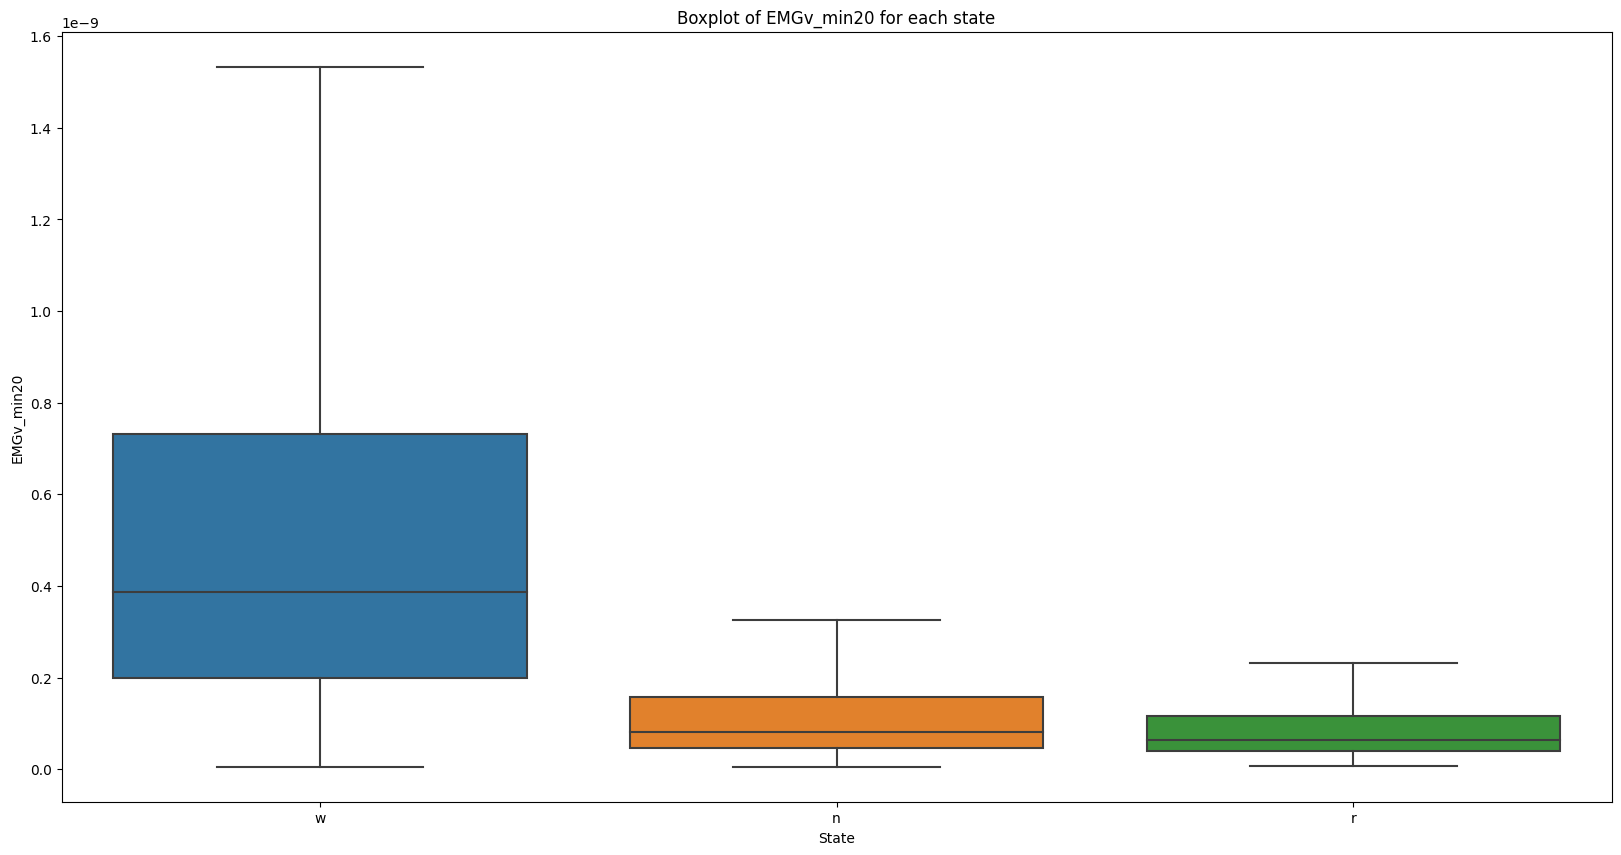

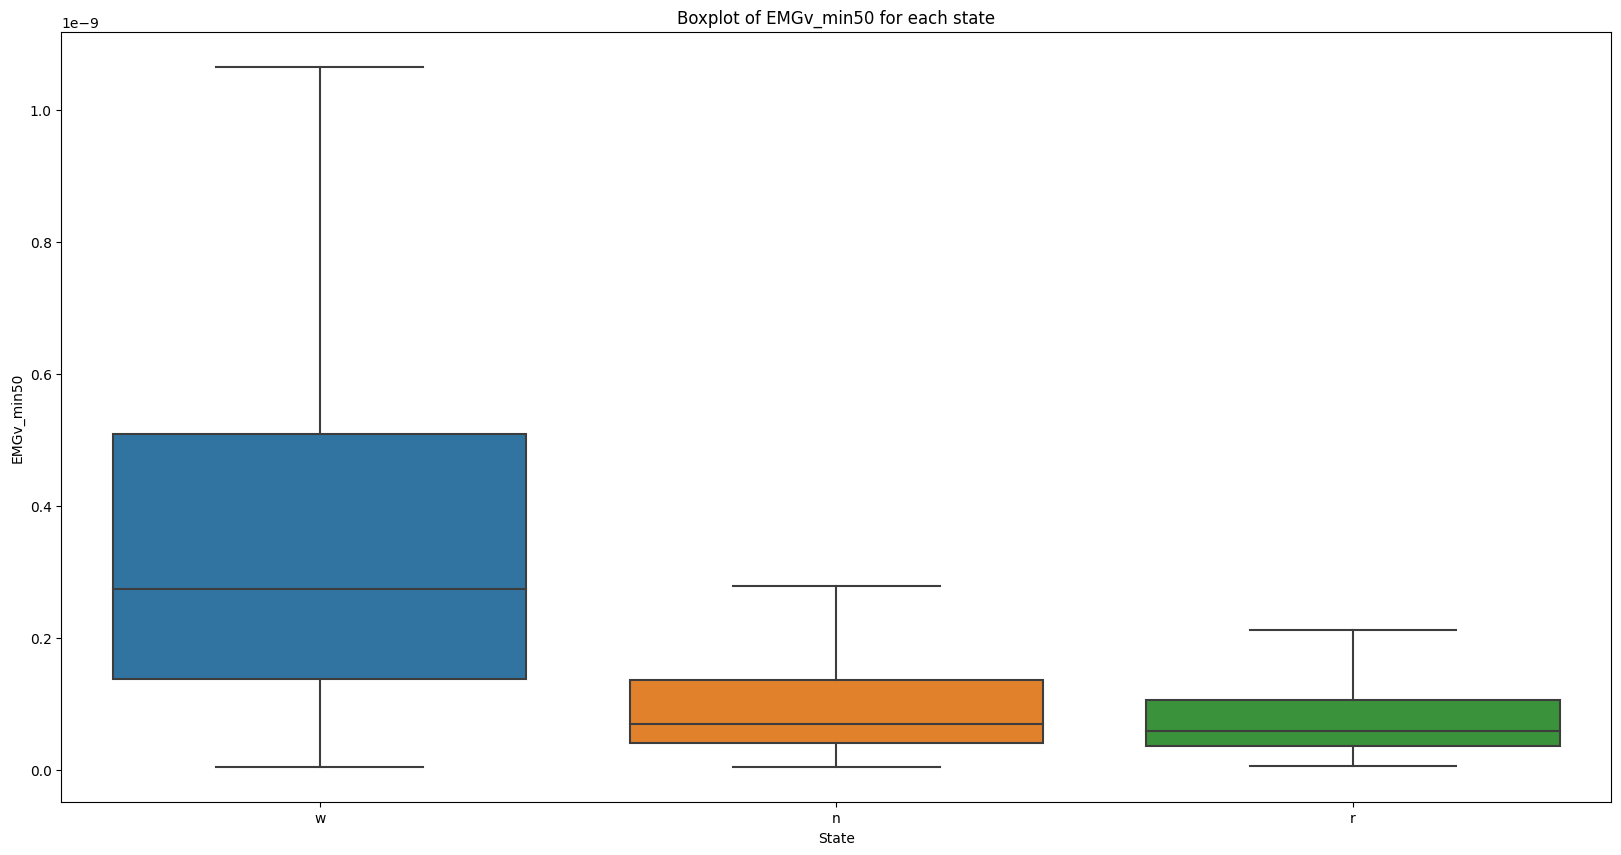

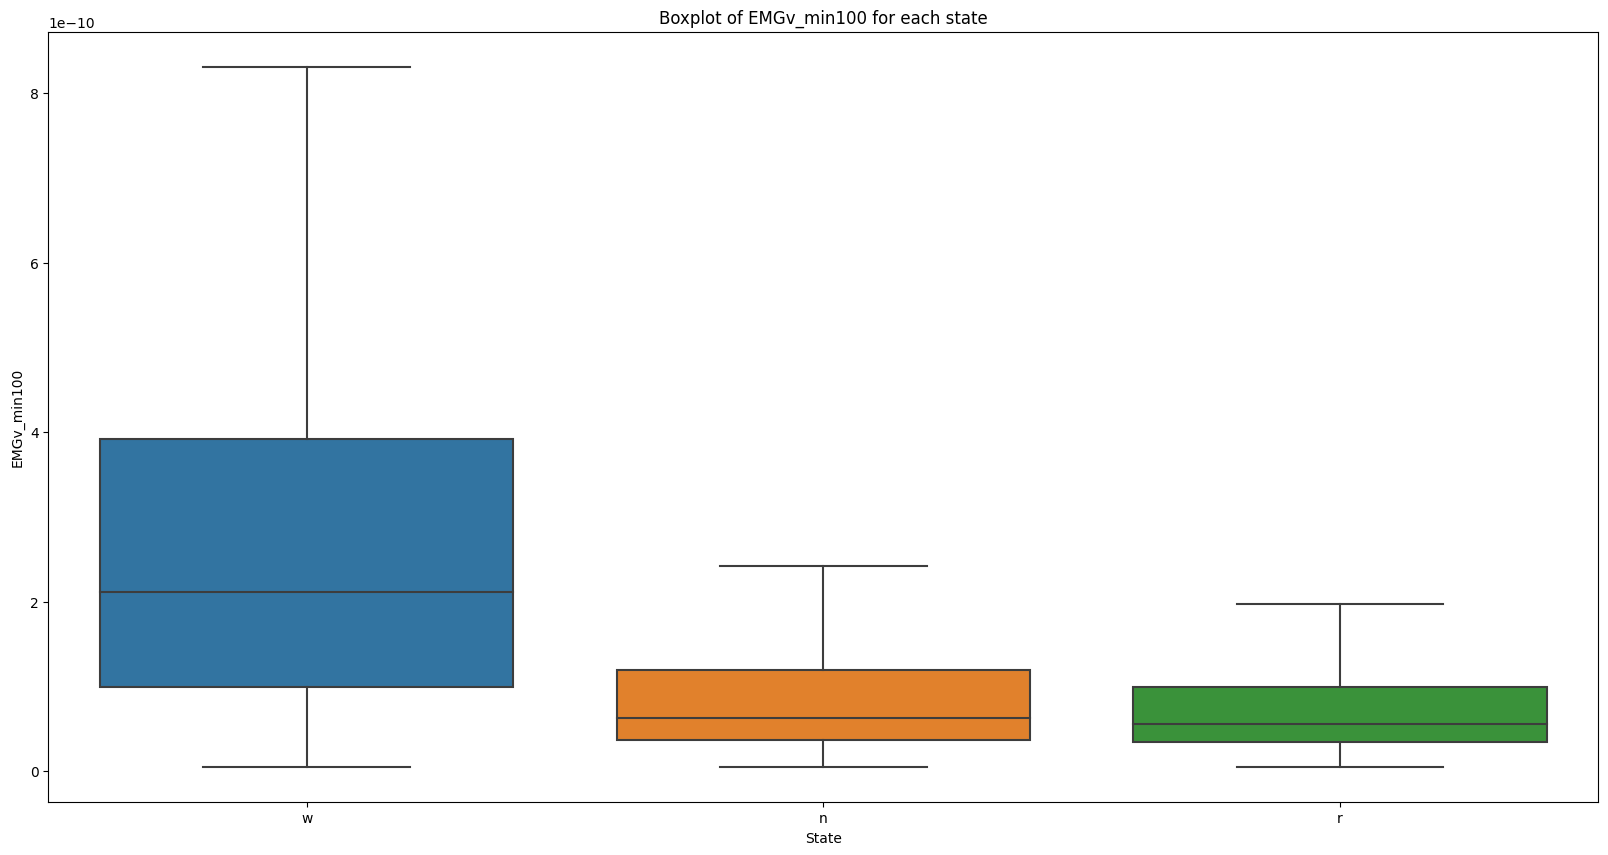

In [20]:
plot_boxplot_without_outlier('EMGv_min2')
plot_boxplot_without_outlier('EMGv_min5')
plot_boxplot_without_outlier('EMGv_min10')
plot_boxplot_without_outlier('EMGv_min20')
plot_boxplot_without_outlier('EMGv_min50')
plot_boxplot_without_outlier('EMGv_min100')

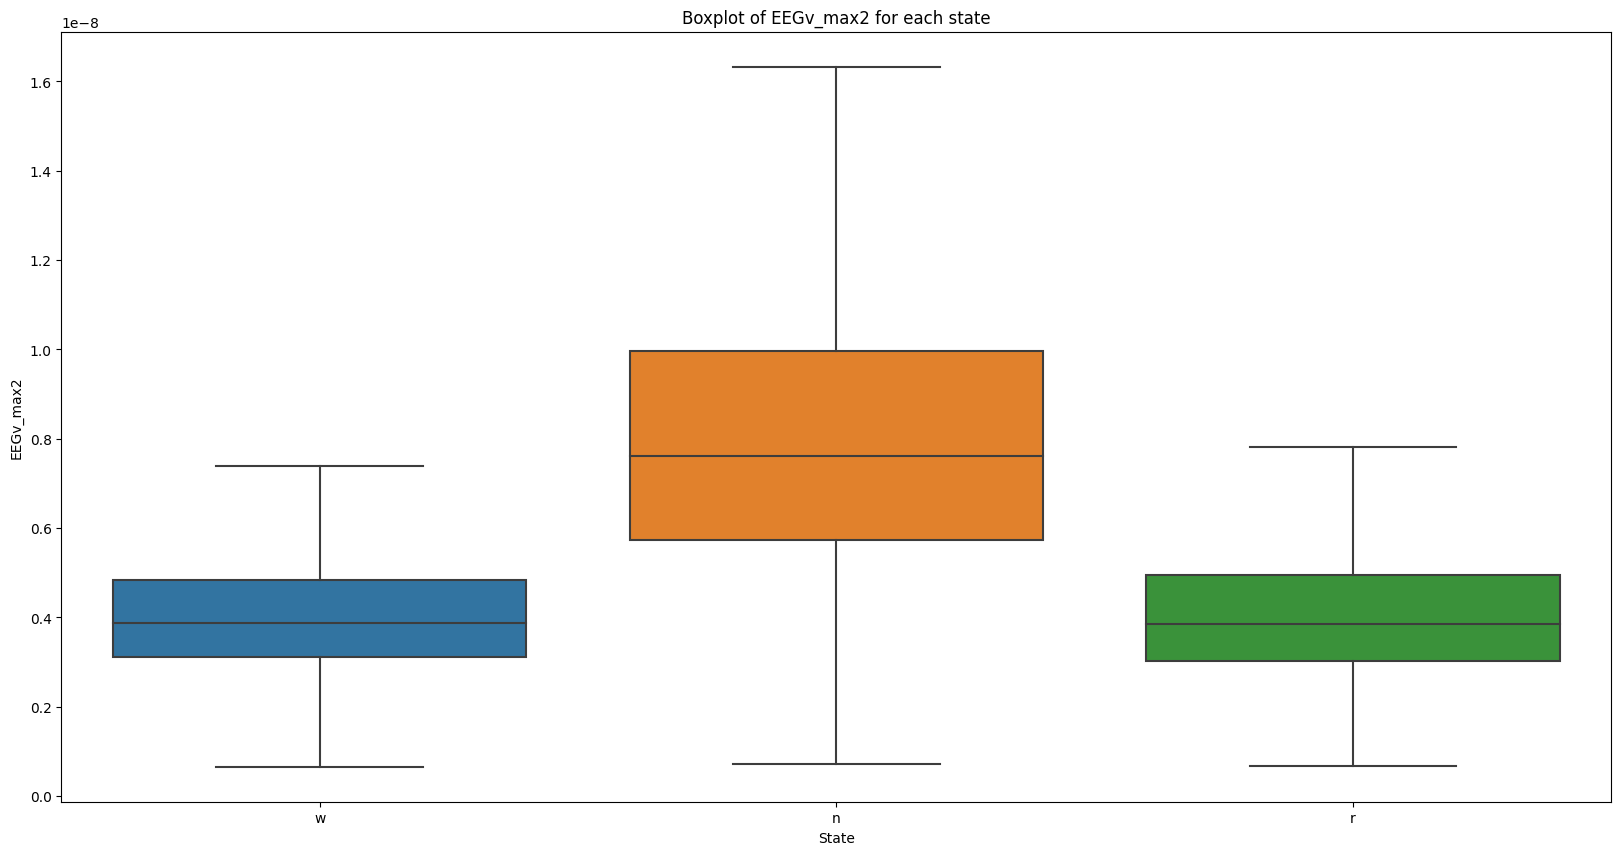

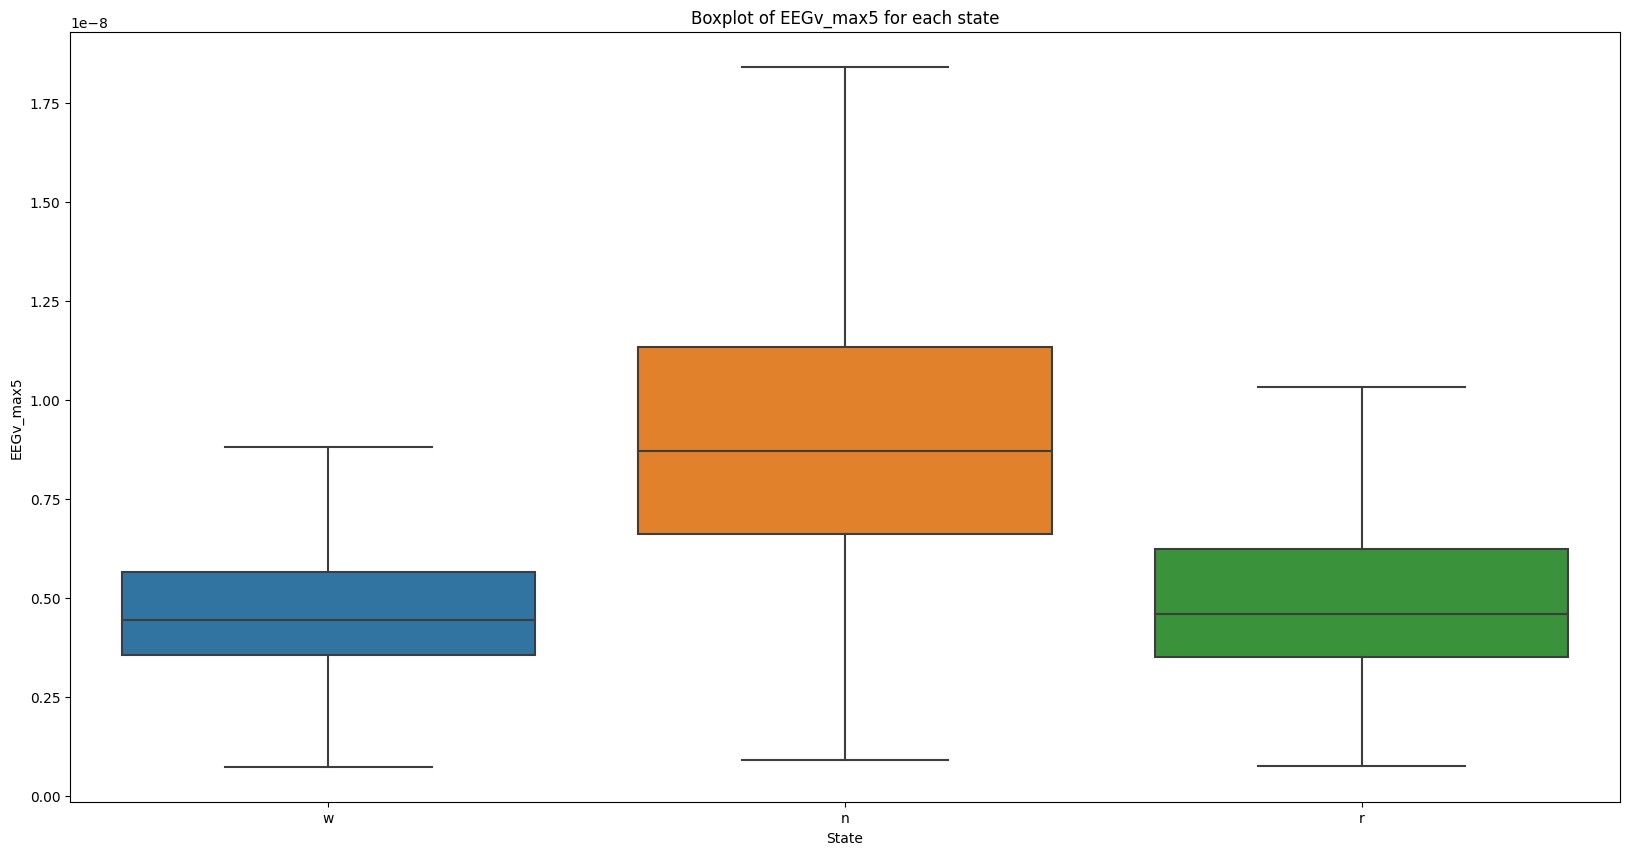

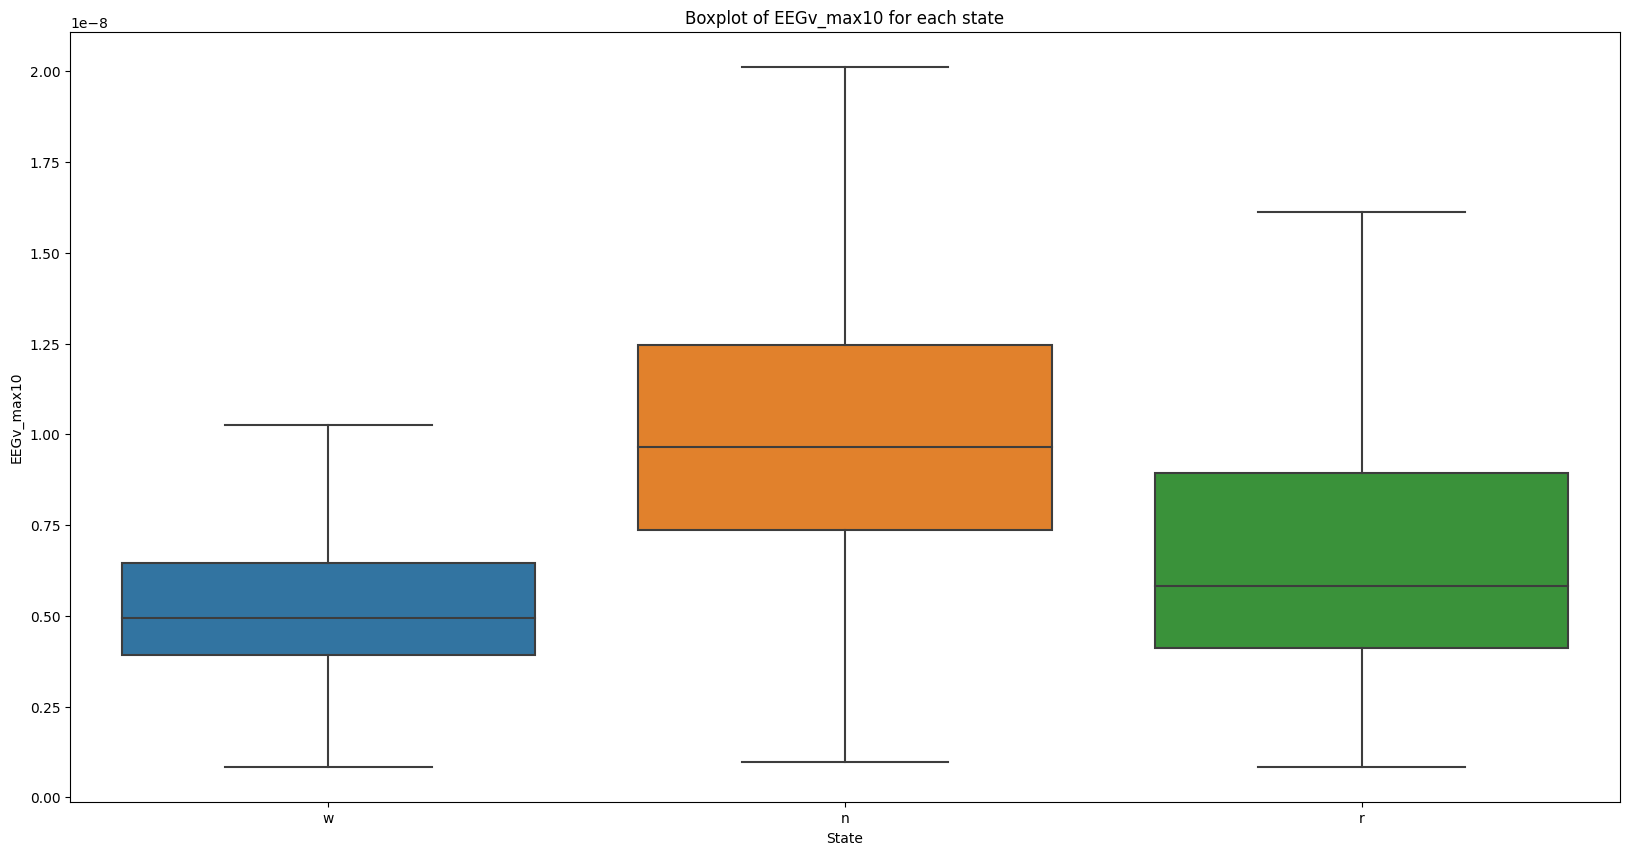

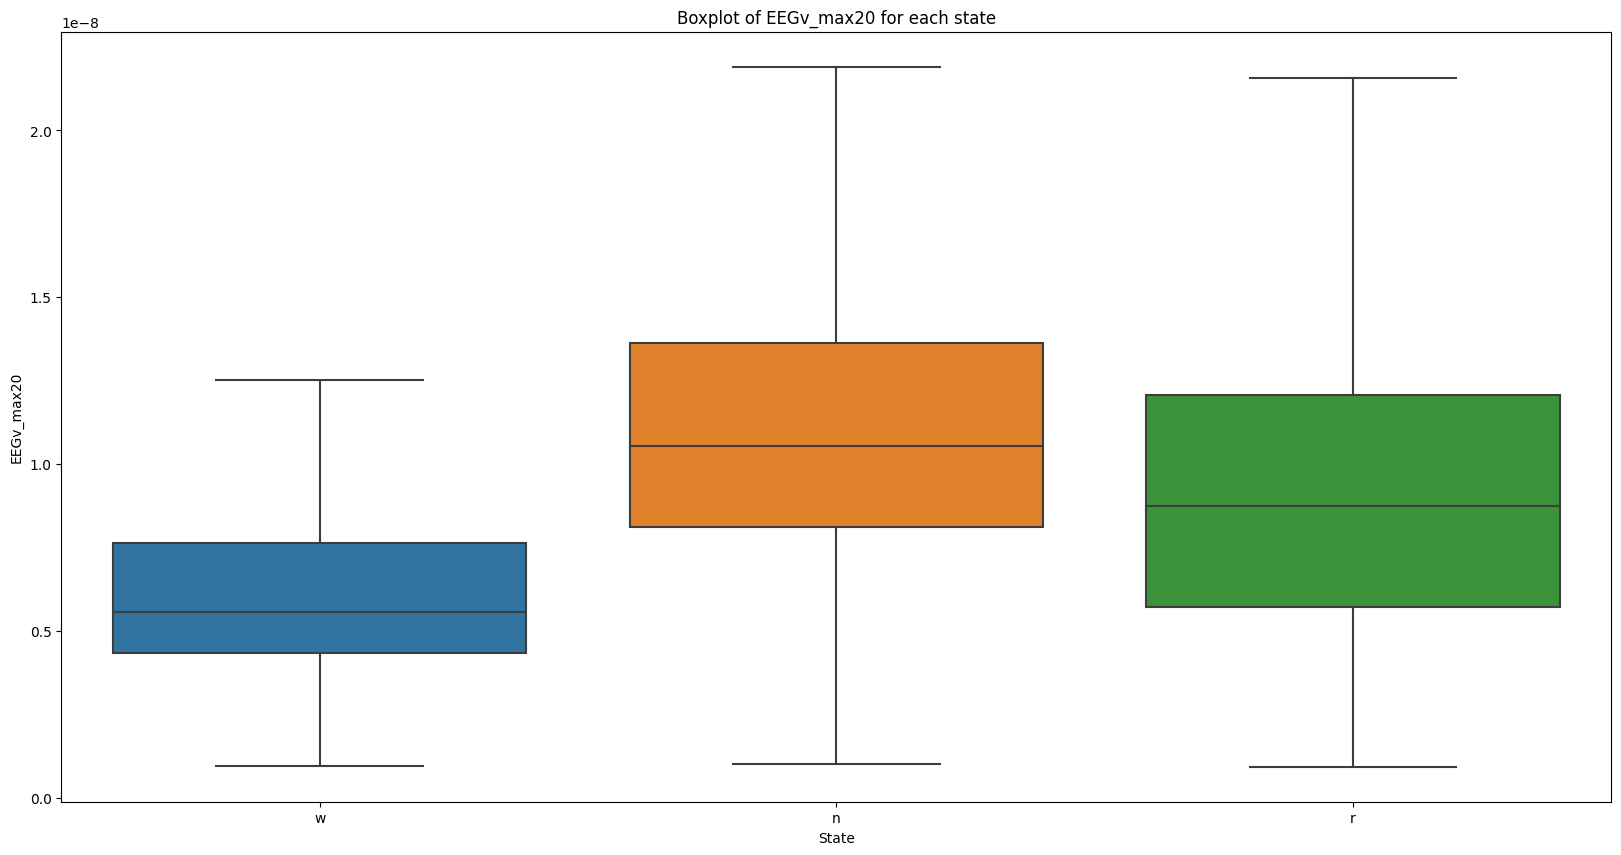

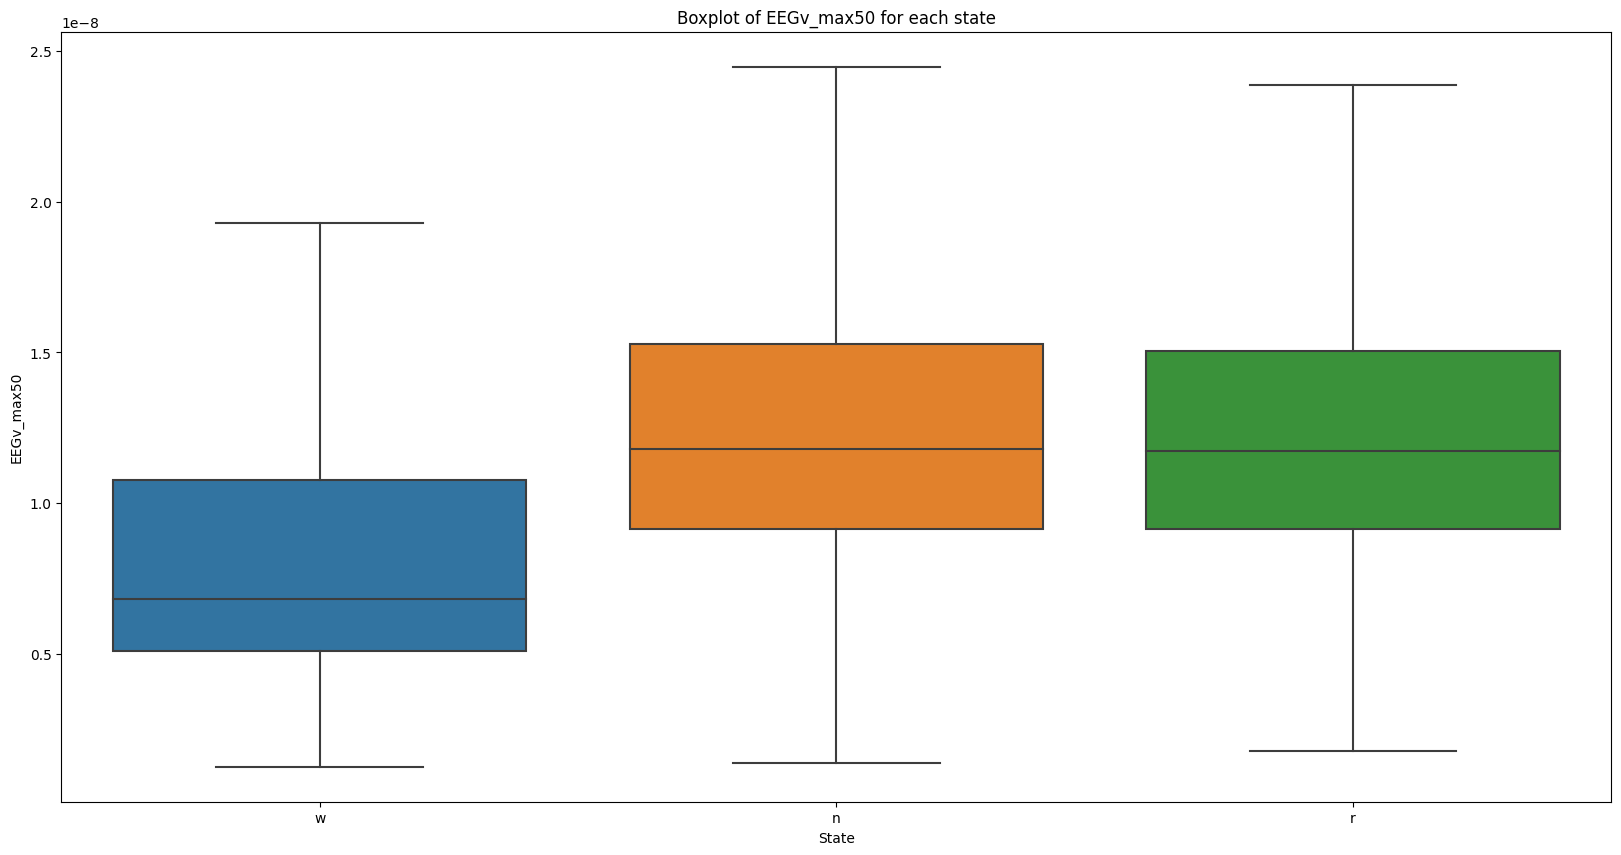

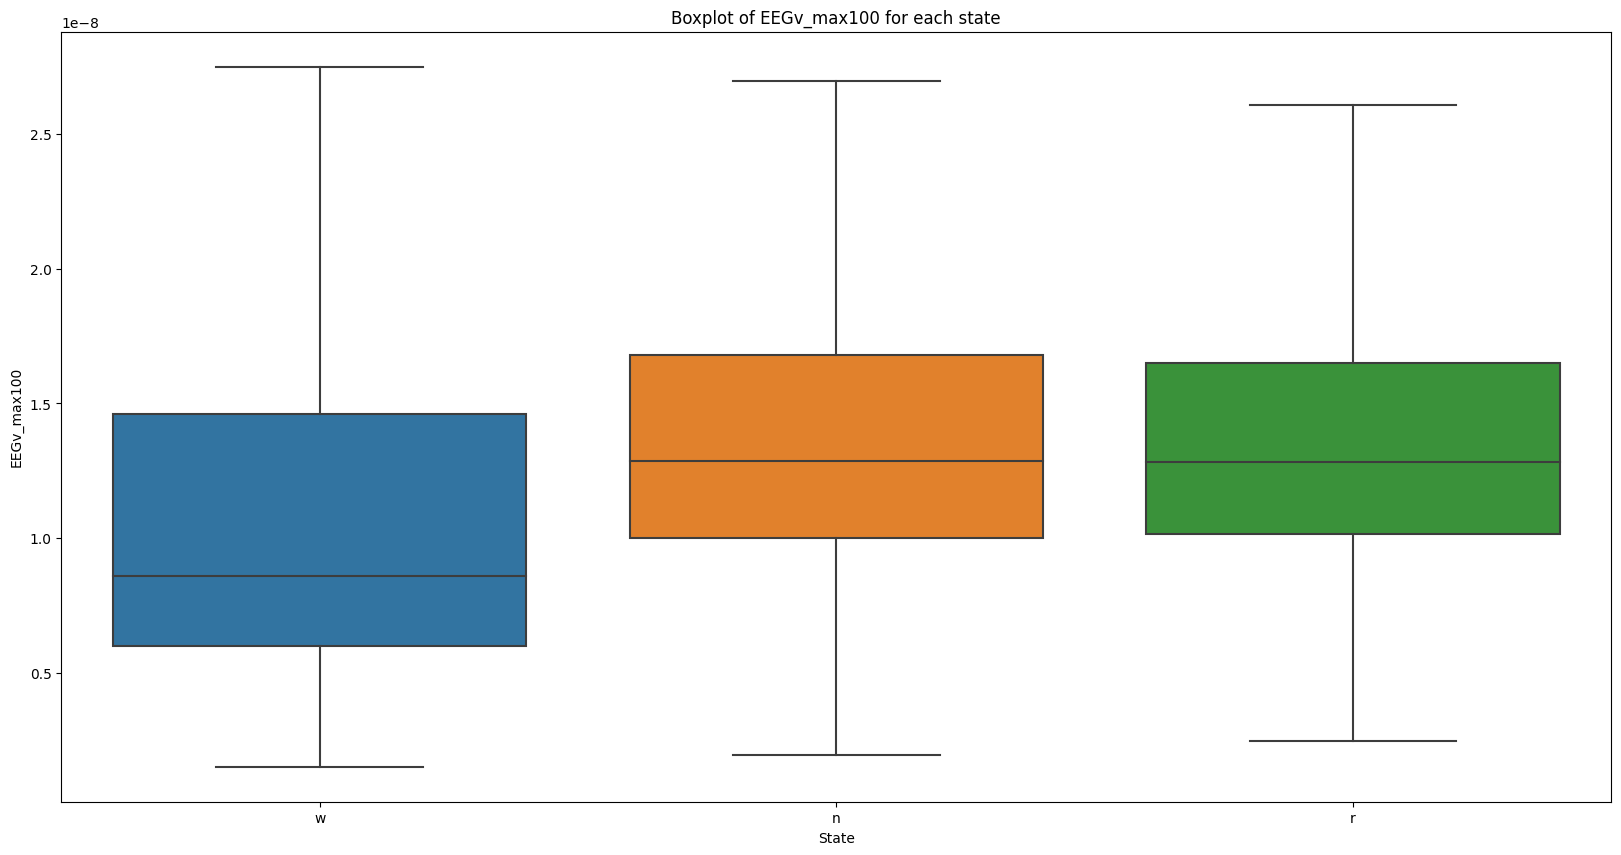

In [21]:
plot_boxplot_without_outlier('EEGv_max2')
plot_boxplot_without_outlier('EEGv_max5')
plot_boxplot_without_outlier('EEGv_max10')
plot_boxplot_without_outlier('EEGv_max20')
plot_boxplot_without_outlier('EEGv_max50')
plot_boxplot_without_outlier('EEGv_max100')

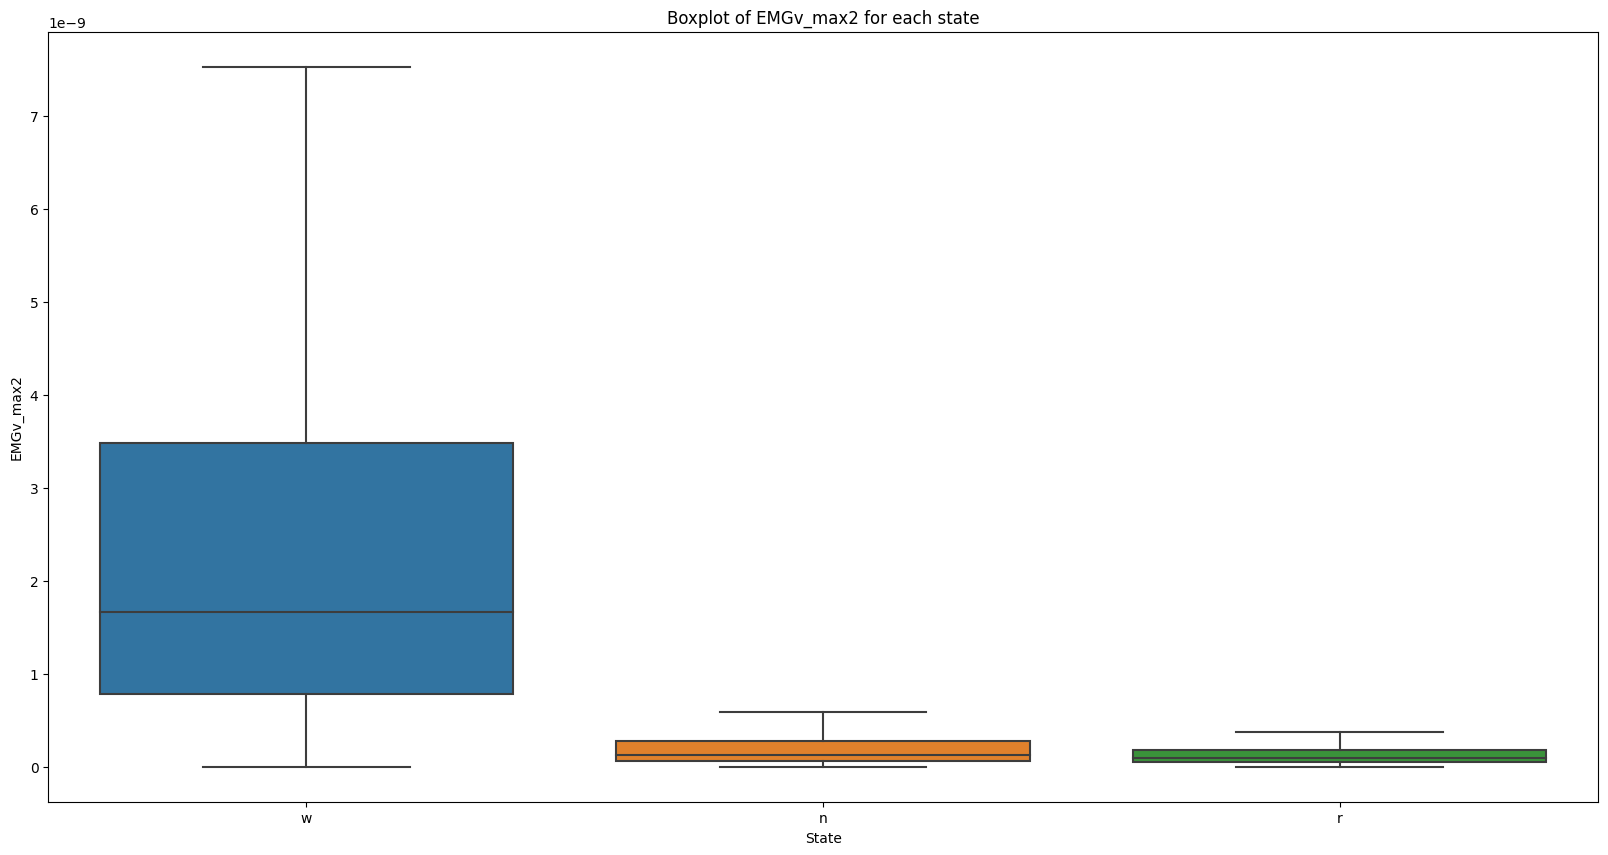

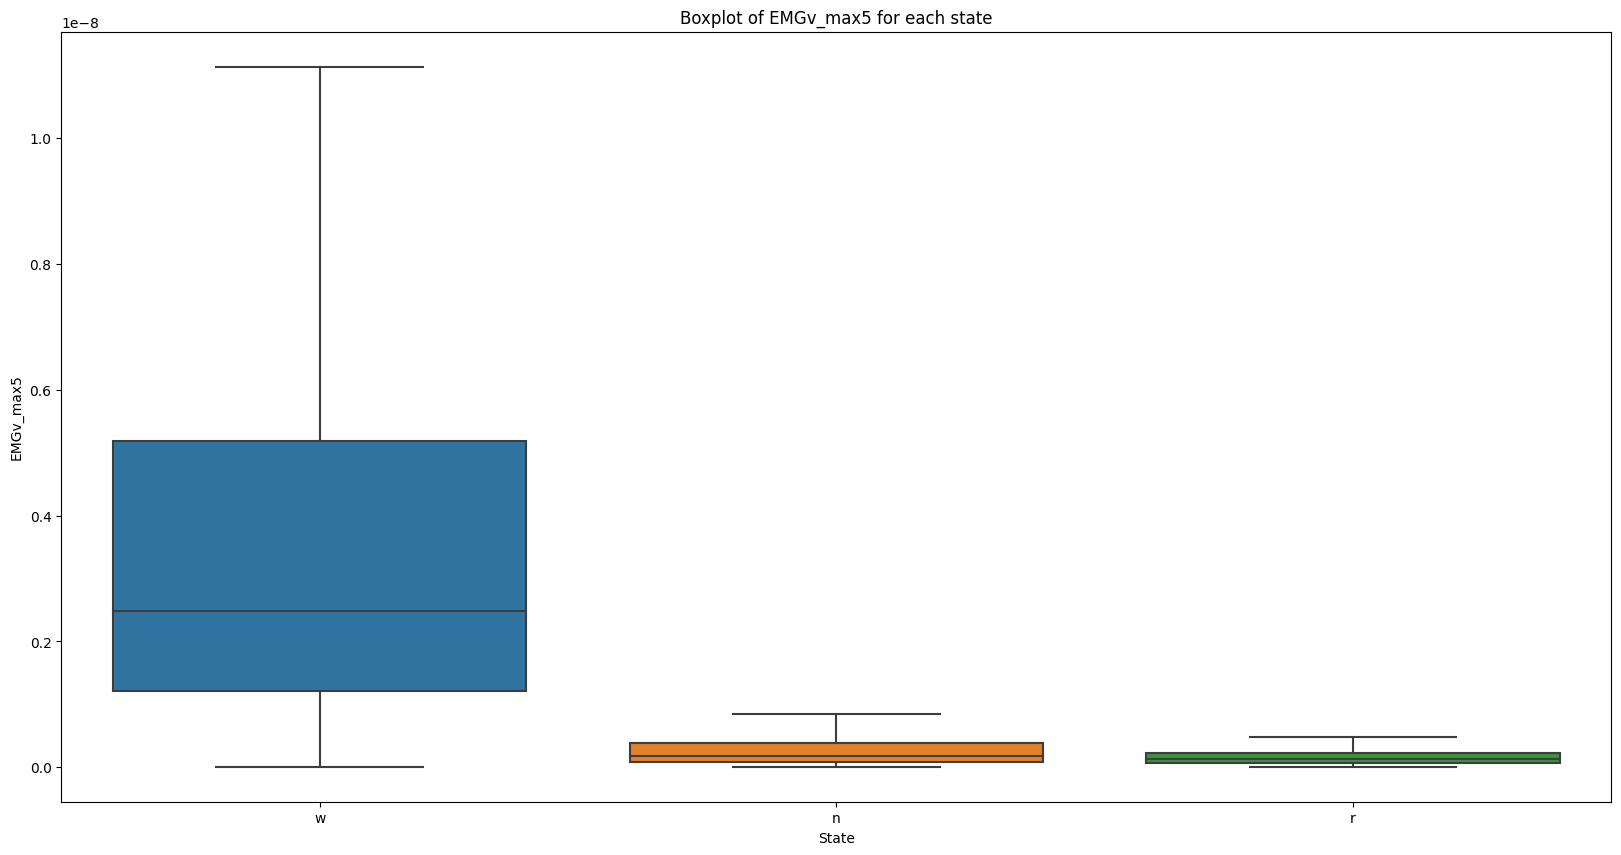

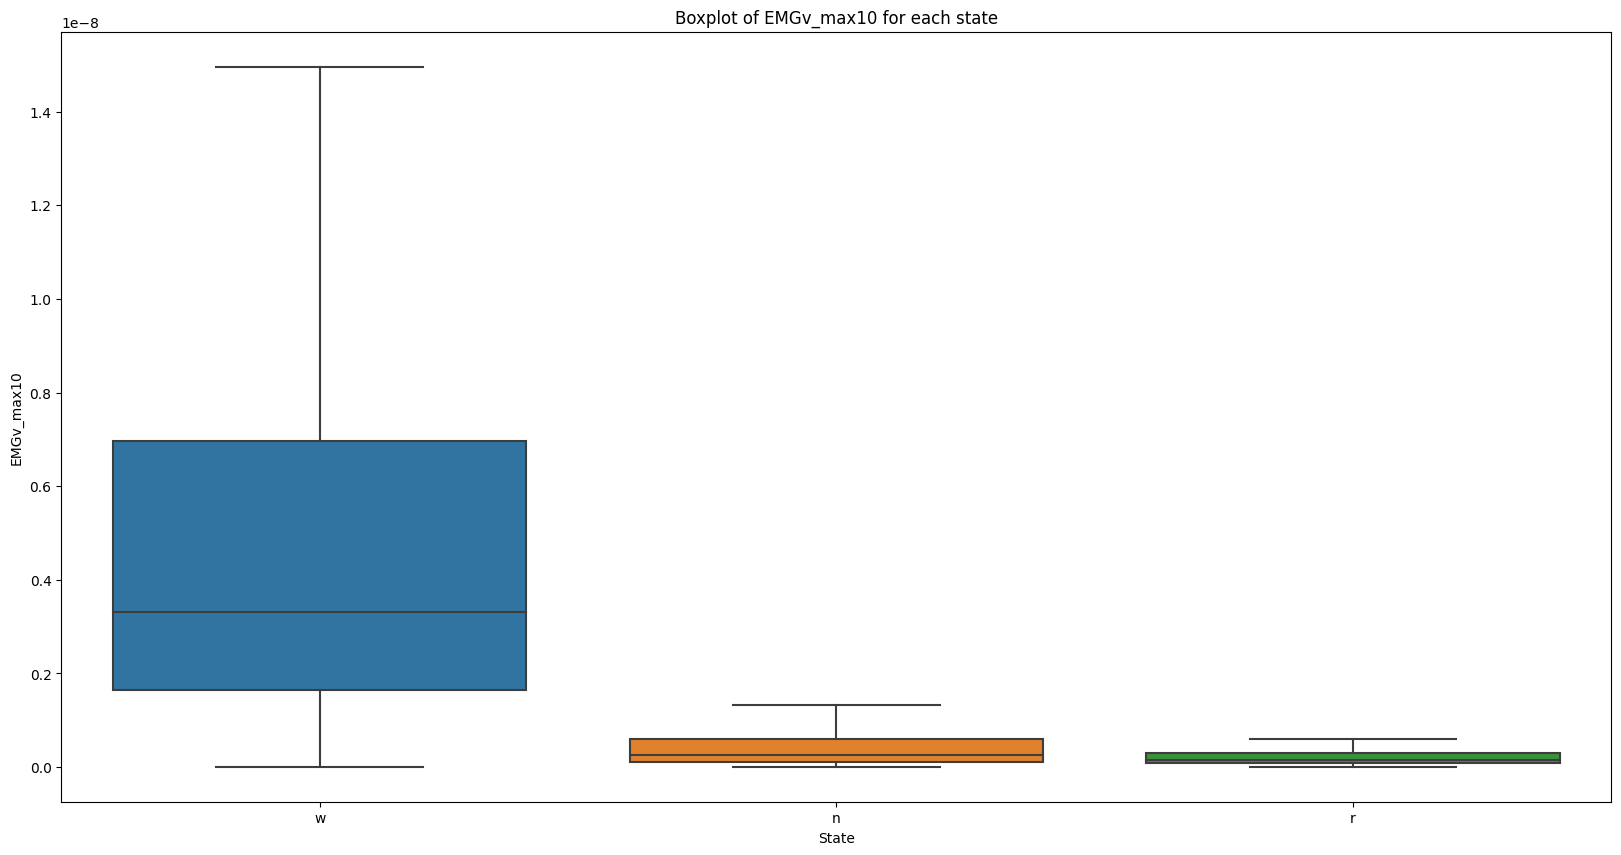

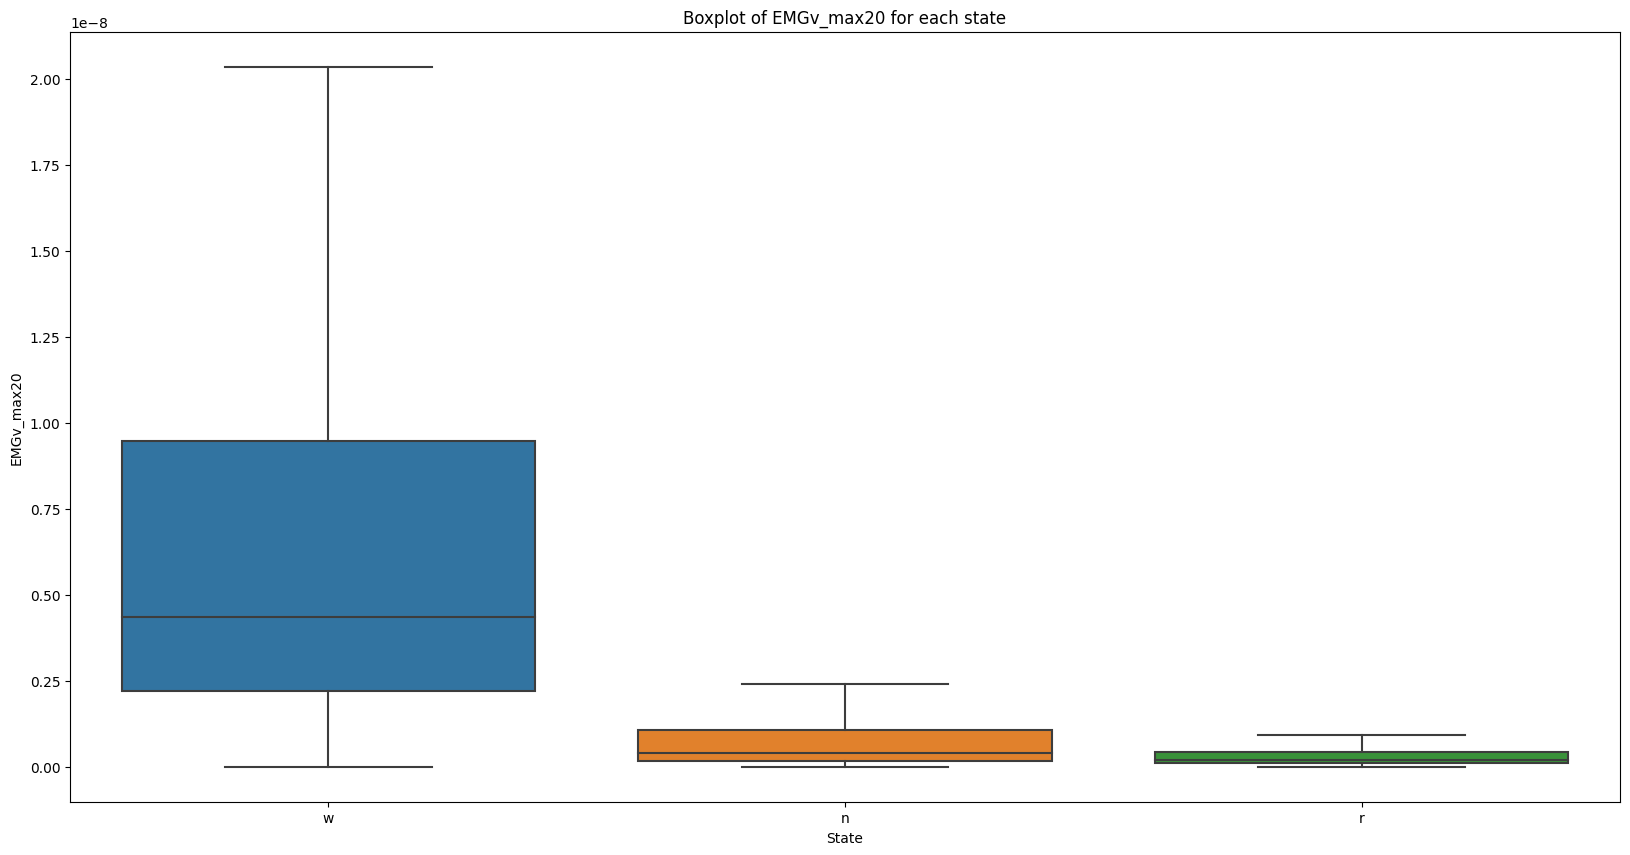

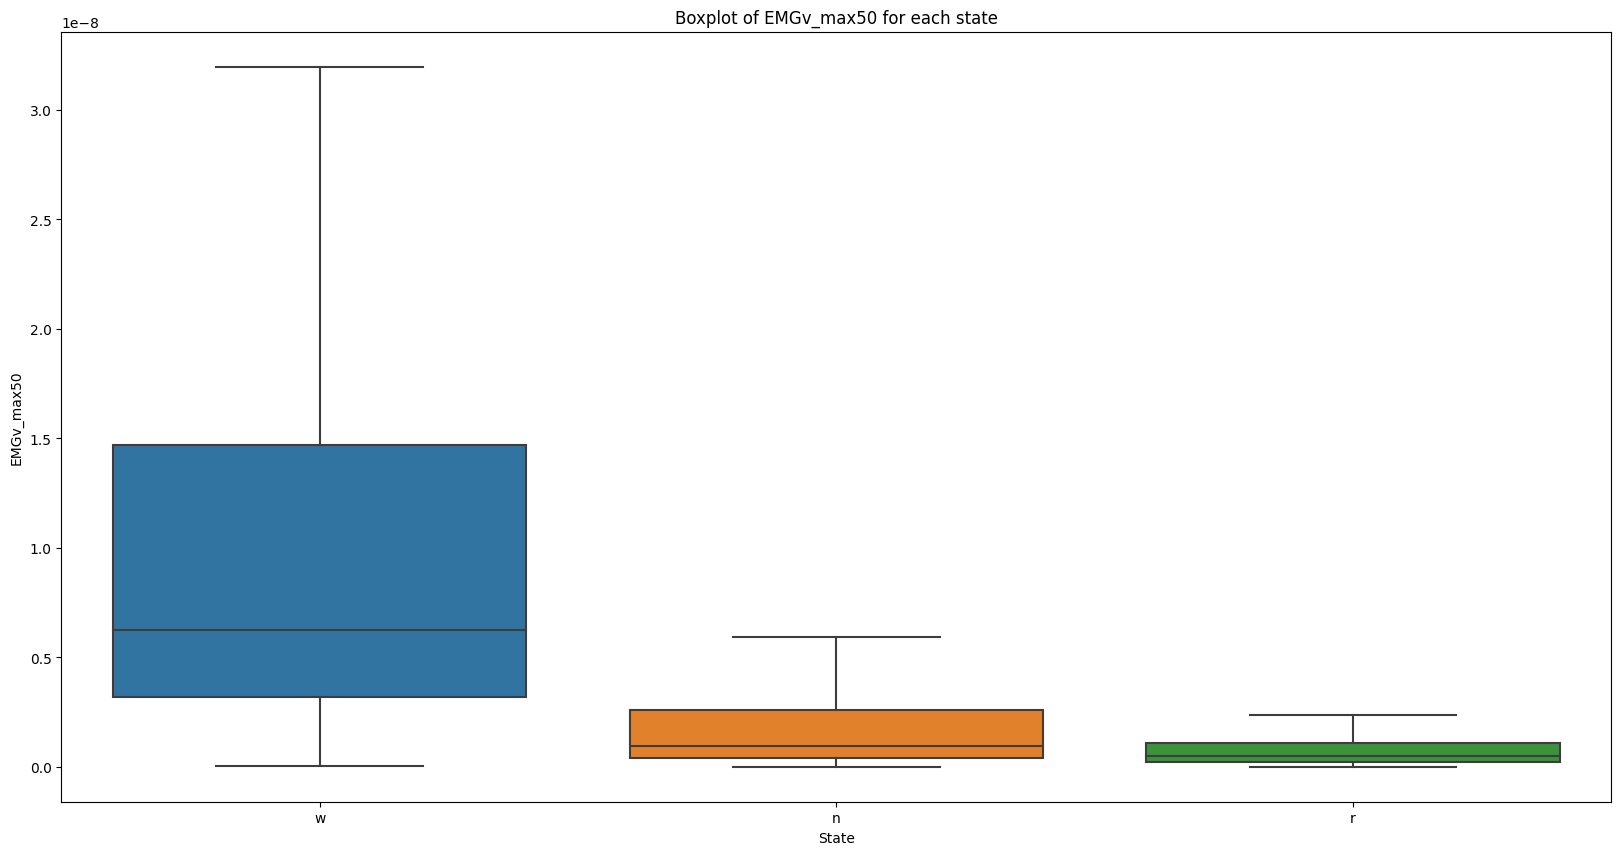

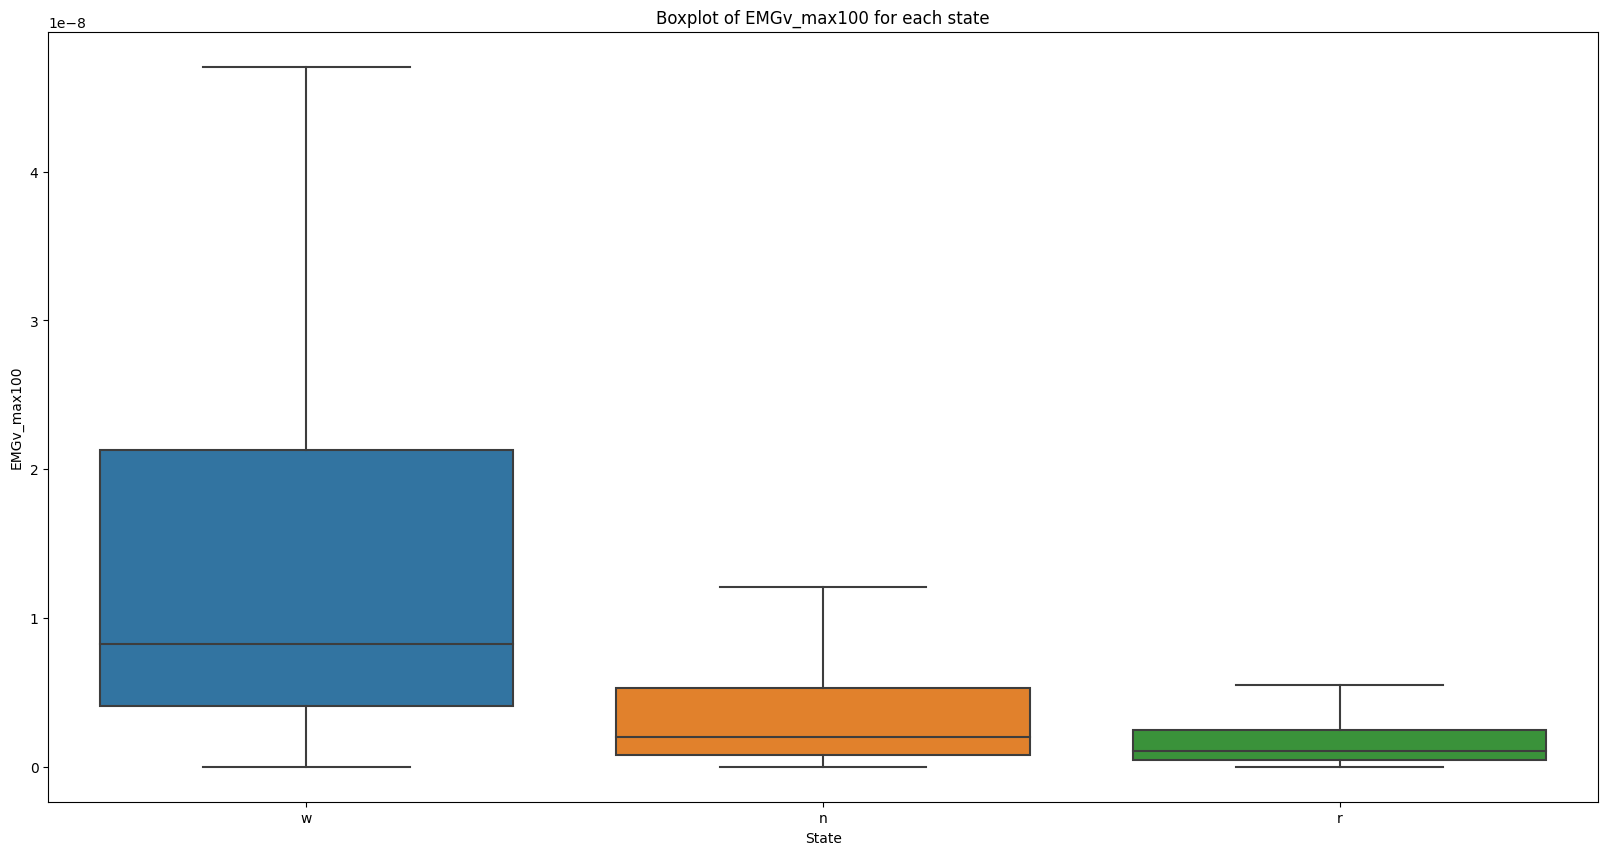

In [22]:
plot_boxplot_without_outlier('EMGv_max2')
plot_boxplot_without_outlier('EMGv_max5')
plot_boxplot_without_outlier('EMGv_max10')
plot_boxplot_without_outlier('EMGv_max20')
plot_boxplot_without_outlier('EMGv_max50')
plot_boxplot_without_outlier('EMGv_max100')

### Non linearity features

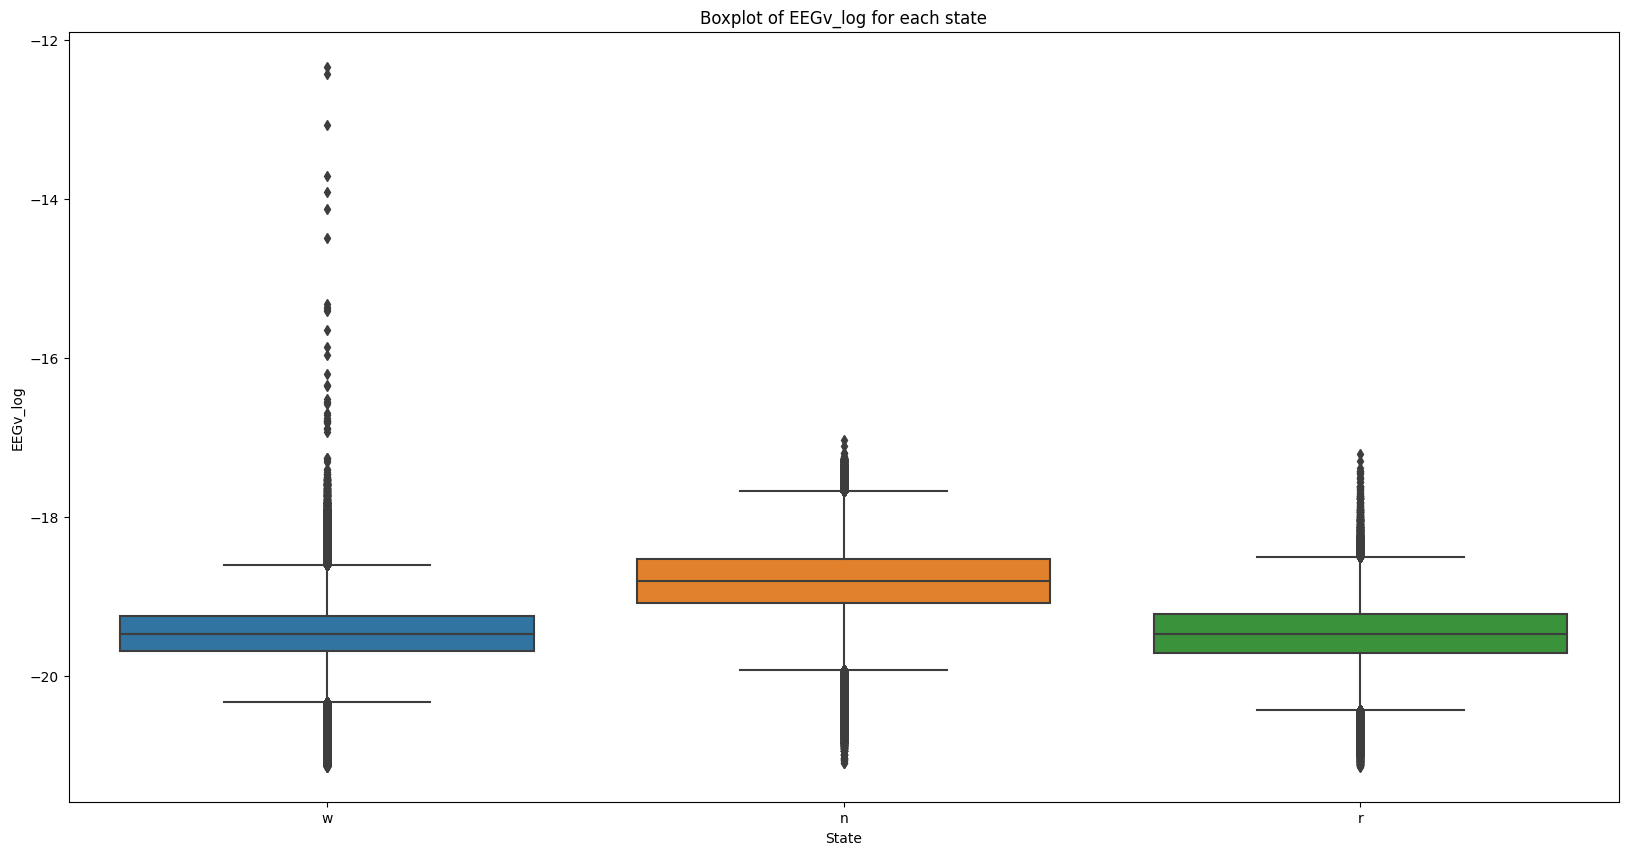

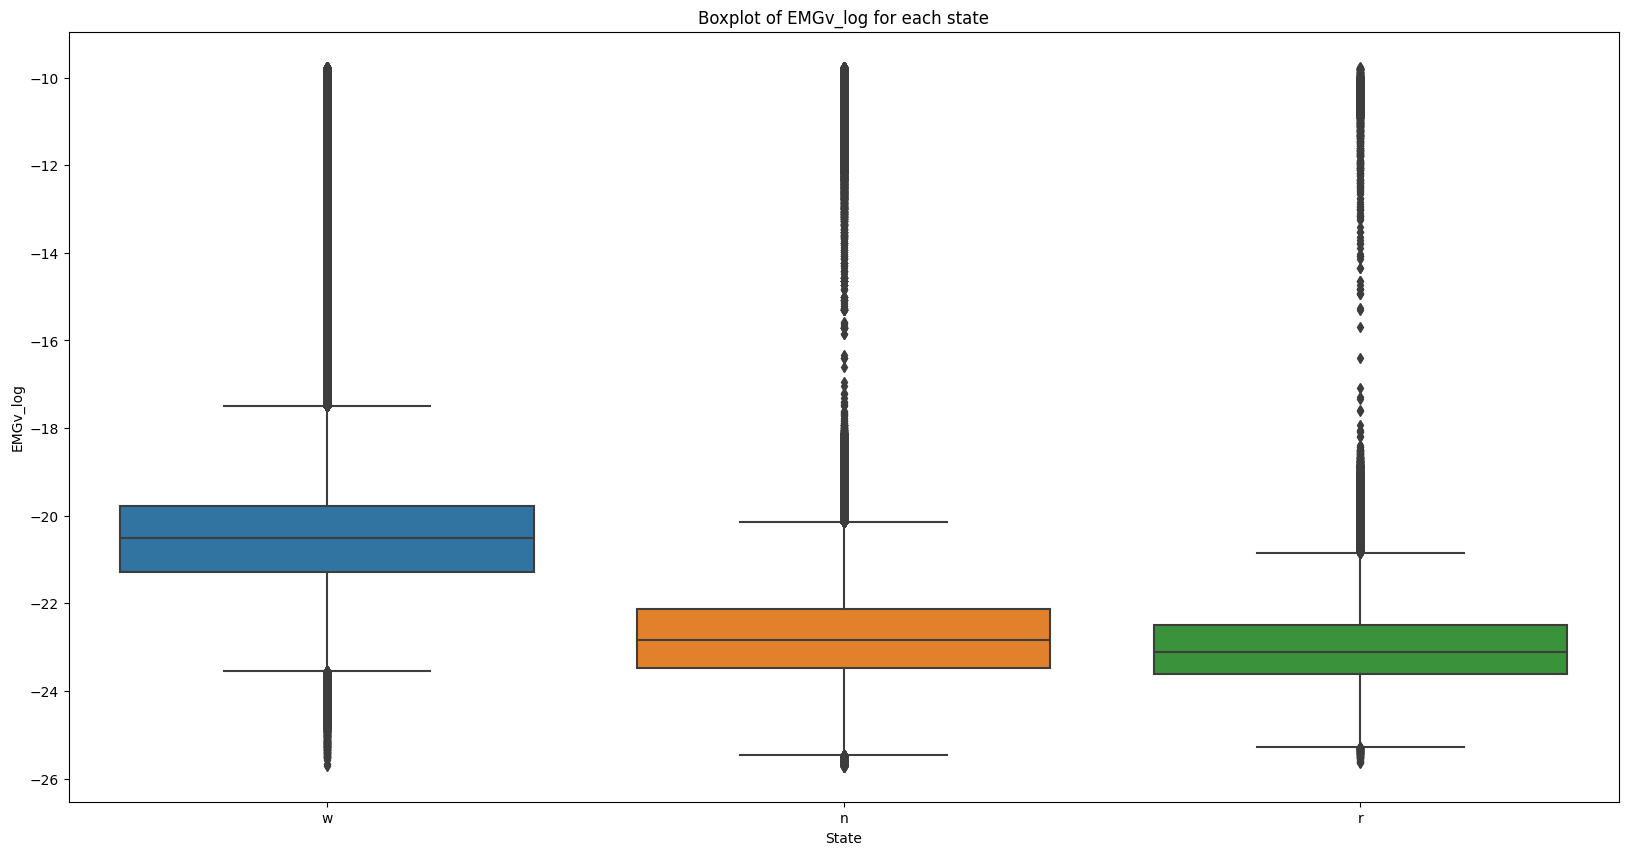

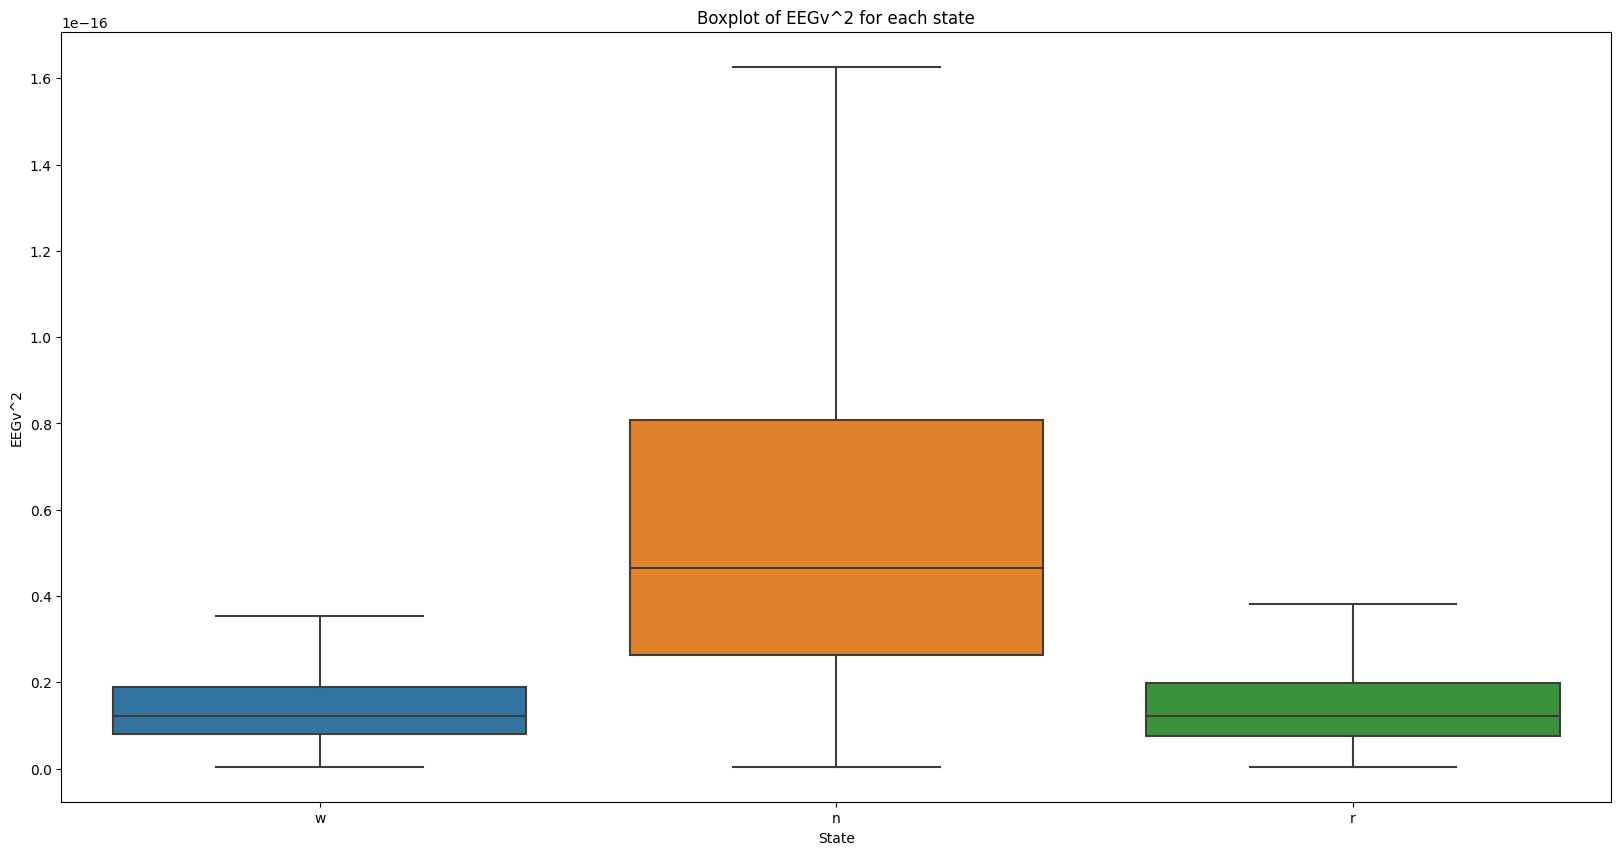

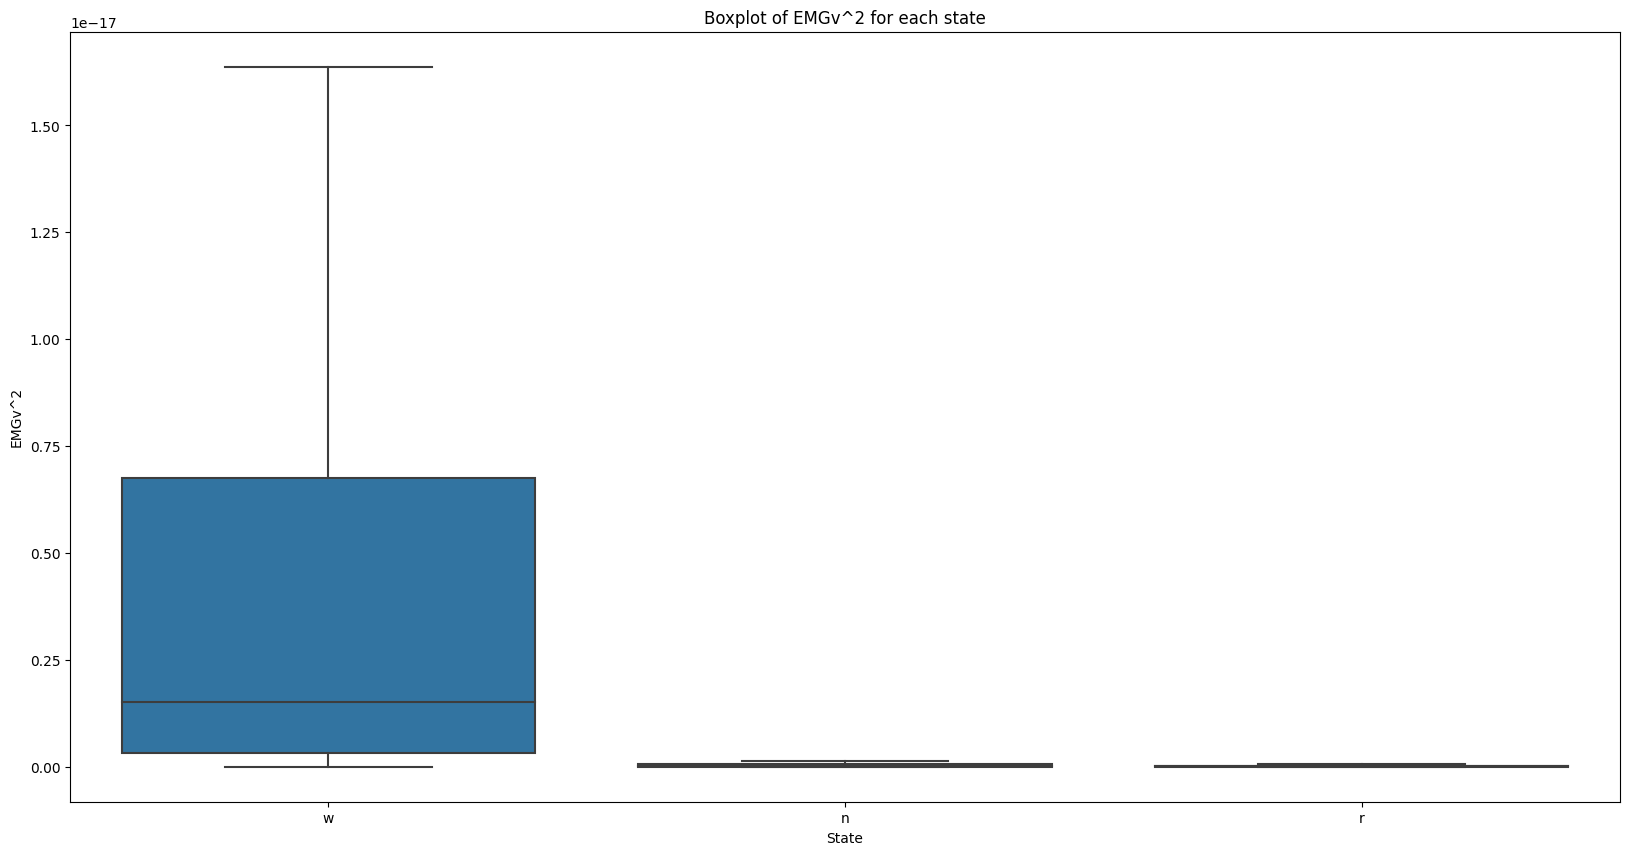

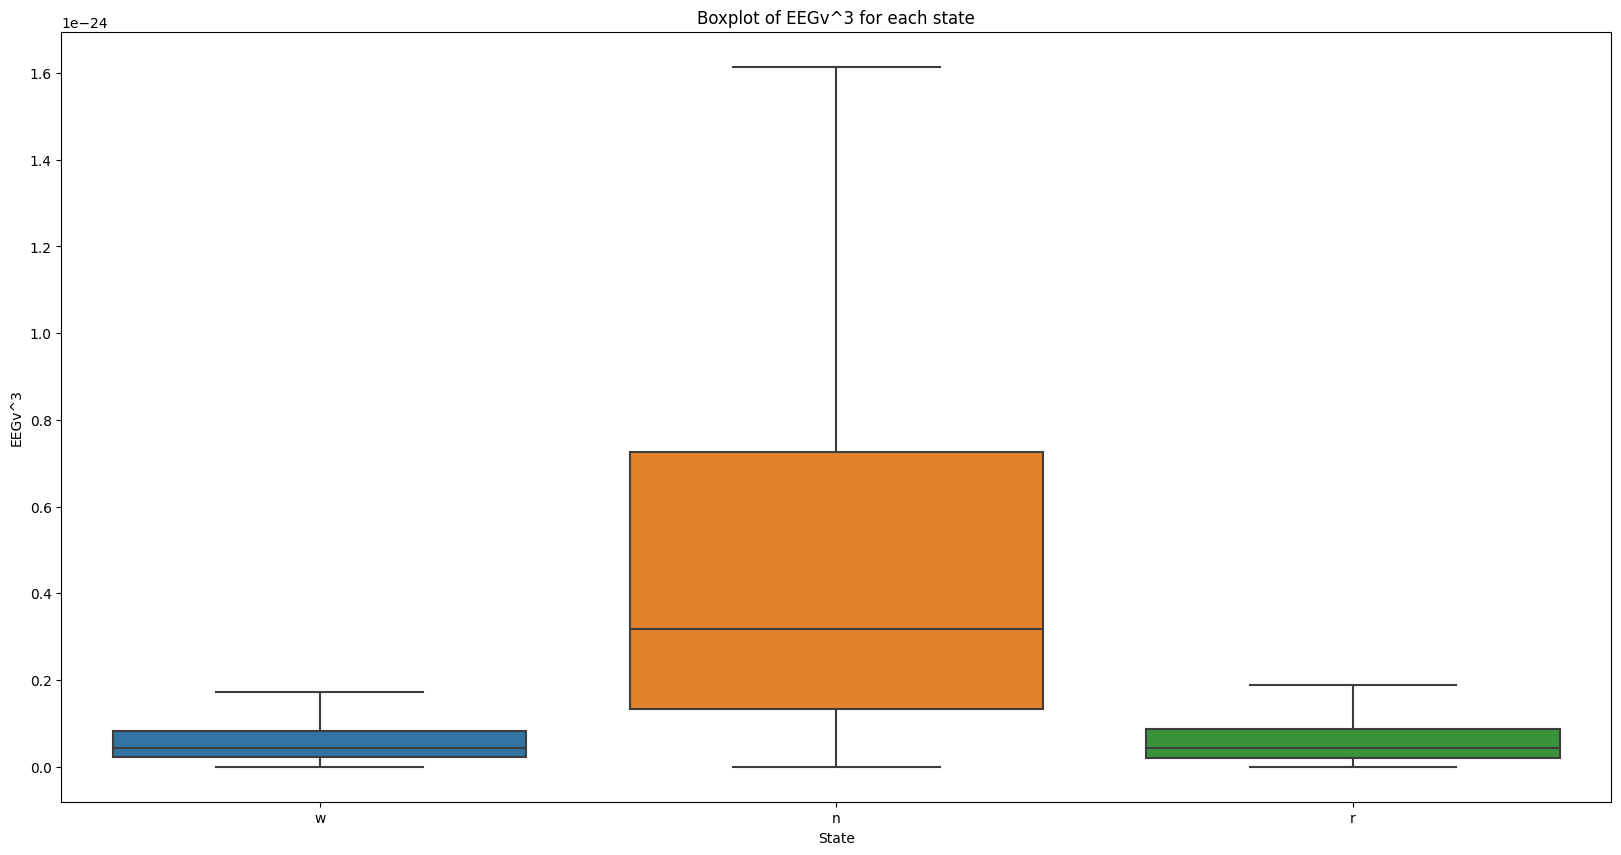

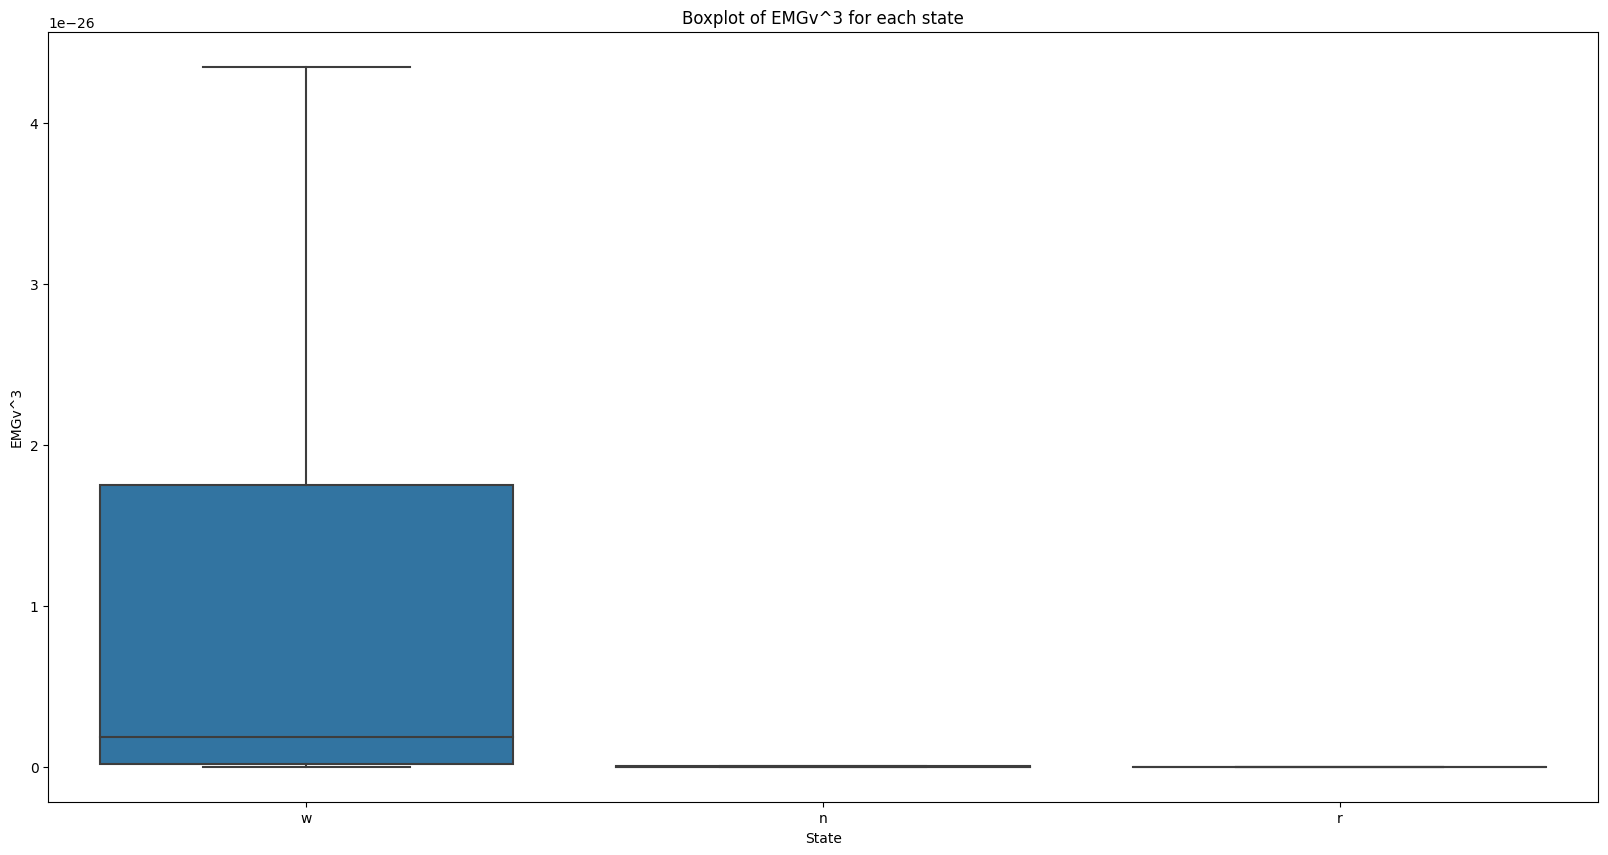

In [23]:
plot_boxplot('EEGv_log')
plot_boxplot('EMGv_log')
plot_boxplot_without_outlier('EEGv^2')
plot_boxplot_without_outlier('EMGv^2')
plot_boxplot_without_outlier('EEGv^3')
plot_boxplot_without_outlier('EMGv^3')

The most interesting features are :
- EEGv
- EMGv
- spectral_entropy
- spectral_rolloff_0.9
- EEGv_mean2, EEGv_median2, EEGv_mean50, EEGv_median50
- EMGv_mean2, EMGv_median2
- EEGv_var5
- EEGv_min2, EEGv_max2
- EMGv_min2, EMGv_max2
- EMGv_log
- EEGv^2
- EMGv^2

In [24]:
egg_features = ['EEGv', 'spectral_entropy', 'spectral_rolloff_0.9', 'EEGv_mean2', 'EEGv_median50', 'EEGv_var5','EEGv_min2', 'EEGv^2' ]

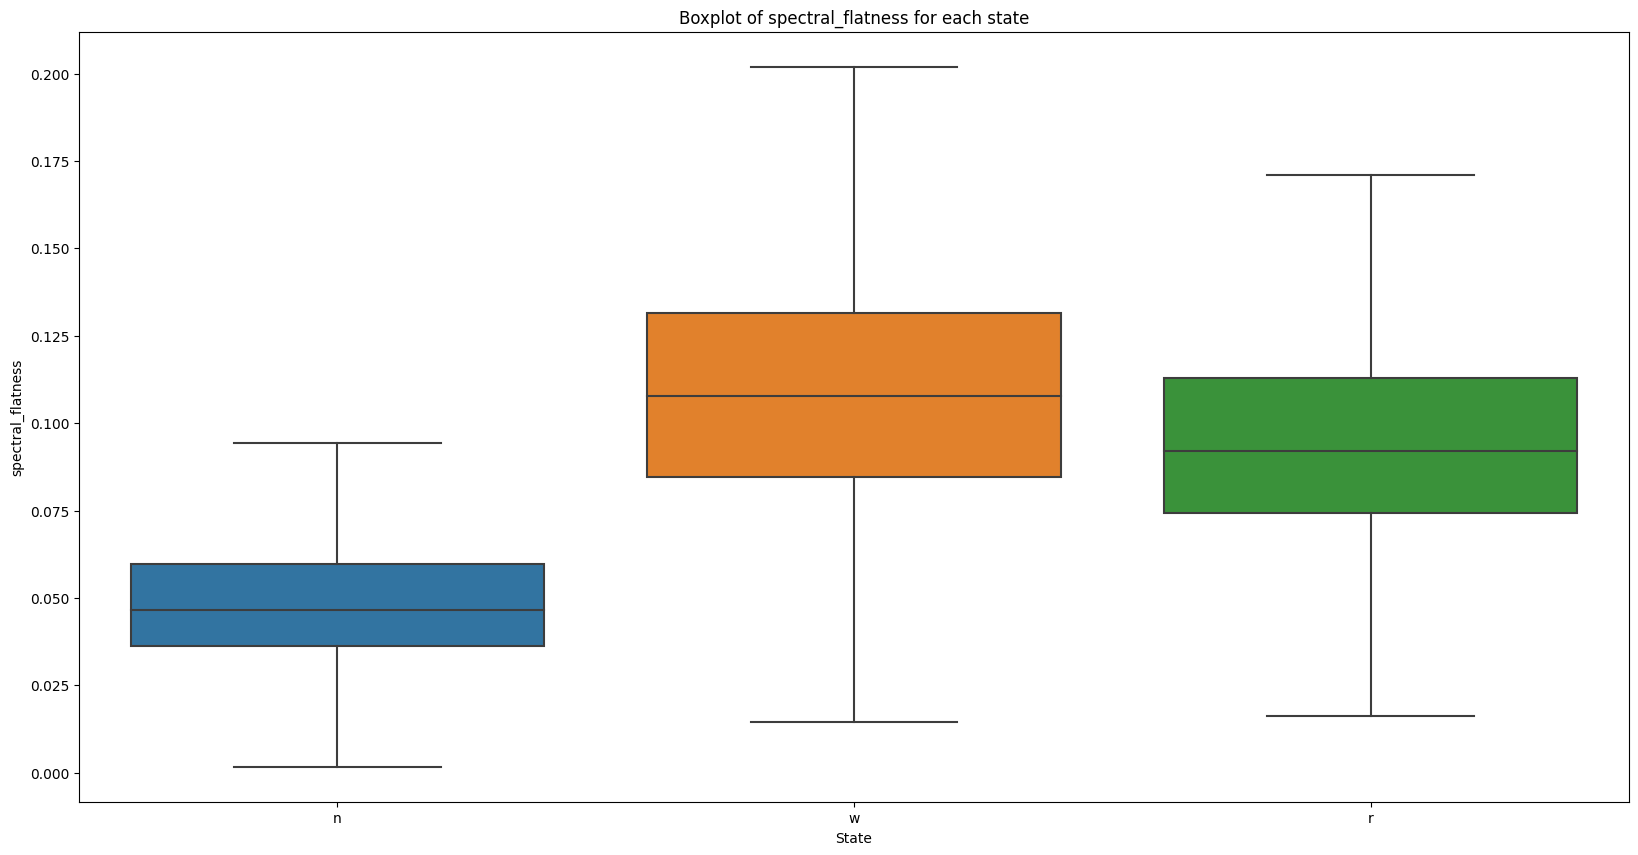

In [6]:
def plot_boxplot_without_outlier(feature):
    # plot the boxplot without outliers but with n as first boxplot
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x='rawState', y=feature, data=df_simple, ax=ax, showfliers=False, order=['n', 'w', 'r'])
    ax.set_title('Boxplot of ' + feature + ' for each state')
    ax.set_xlabel('State')
    ax.set_ylabel(feature)

plot_boxplot_without_outlier('spectral_flatness')

In [ ]:
def plot_boxplot_without_outlier(feature):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x='rawState', y=feature, data=df_simple, ax=ax, showfliers=False)
    ax.set_title('Boxplot of ' + feature + ' for each state')
    ax.set_xlabel('State')
    ax.set_ylabel(feature)